# House Price Prediction

![housesbanner](housesbanner.png "housesbanner")

# **Problem Statement  :**

Housing prices are an important reflection of the economy, and housing price ranges are of great interest for both buyers and sellers . Ask a home buyer to describe their dream house, and they probably won’t begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition’s data-set proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.<br><br>
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

## **Real World/ Business Objectives and Constraints :**
- ### **Objectives:**
    - Predict the sale price for each house.
    - Minimize the difference between predicted and actual rating (RMSE/MSE)
- ### **Constraints:**
    - Some form of interpretability.


### **About the data:**
1. Number of data points in train data:1460
2. Number of features in train data: 81
3. Number of data points in test data: 1459
4. Number of features in test data: 80



### **Data fields**
Here's a brief version of what you'll find in the data description file.

> - SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

### **Machine Learning Objective and Constraints:**
1. Minimize RMSE.
2. Try to provide some interpretability.

In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# plt.style.use('ggplot')

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

def matplot_setting():
    from matplotlib import rcParams, cycler
    rcParams['figure.figsize'] = 10,5
    rcParams['axes.spines.top'] = False
    rcParams['axes.spines.right'] = False
    rcParams['lines.linewidth'] = 2.5
    # rcParams['axes.prop_cycle'] = cycler(color=['#424242'])
    rcParams['xtick.labelsize'] = 'large'
    rcParams['ytick.labelsize'] = 'large'

    rcParams['legend.fontsize'] = 10
    rcParams['axes.labelsize'] = 'x-large'
    rcParams['axes.titlesize'] = 'x-large'
    rcParams['legend.fontsize'] = 'large'
    
matplot_setting()

In [178]:
from sklearn import metrics, linear_model
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV
from scipy import stats
# from scipy.stats import shapiro
# from statsmodels.graphics.gofplots import qqplot

In [220]:
filepath='https://raw.githubusercontent.com/udaypratapyati/insaid/master/GCD/Projects/HousePricePrediction/train.csv'
df = pd.read_csv(filepath)
# df = pd.DataFrame(house)

In [180]:
df.shape

(1460, 81)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

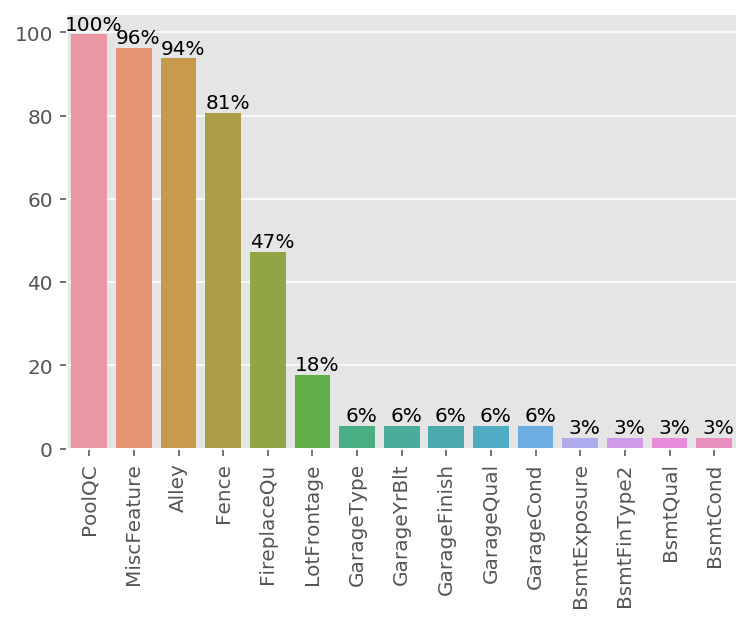

In [221]:
# plot missing values in percentage
def null_value_plot():
    nval=15
    graph = sns.barplot(y=list(df.isnull().sum().nlargest(nval)/len(df)*100), x=list(df.isnull().sum().nlargest(nval).index))
    plt.xticks(rotation=90)

    for p in graph.patches:
        graph.annotate("{:.0f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2. +.1, p.get_height()),
                       ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
       
null_value_plot()

**As we can see there are lots of null values present in the dataset, we will drop columns having more than 80% of null values.**

In [222]:
nval = 5 # droping FireplaceQu as well
null_80percent = (df.isnull().sum().nlargest(nval)/len(df)*100).index[:5]
null_80percent

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], dtype='object')

In [223]:
# Dropping those variables with more than 40% null values
df.drop(null_80percent, axis=1, inplace=True)
df.shape

(1460, 76)

In [185]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 76 columns]

In [224]:
# drop Id col
df.drop('Id', axis=1, inplace=True)

Droping ID column as this is unique for each record

### Before proceeding with any further analysis, let have a look at the available data at hand first.

__Create separate lists of categorical and numerical features__

In [187]:
# lets firs create seperate lists of categorical and numeric columns
cat_vars = []
num_vars = []
for col in df.columns.drop("SalePrice"):
    if df[col].dtypes == 'O':
        cat_vars.append(col)
    else:
        num_vars.append(col)

#lets check the lists created.
print("List of Numeric Columns:",num_vars)
print("\n")
print("List of Categorical Columns:",cat_vars)

List of Numeric Columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


List of Categorical Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageF

__Lets check for any outliers in the data__

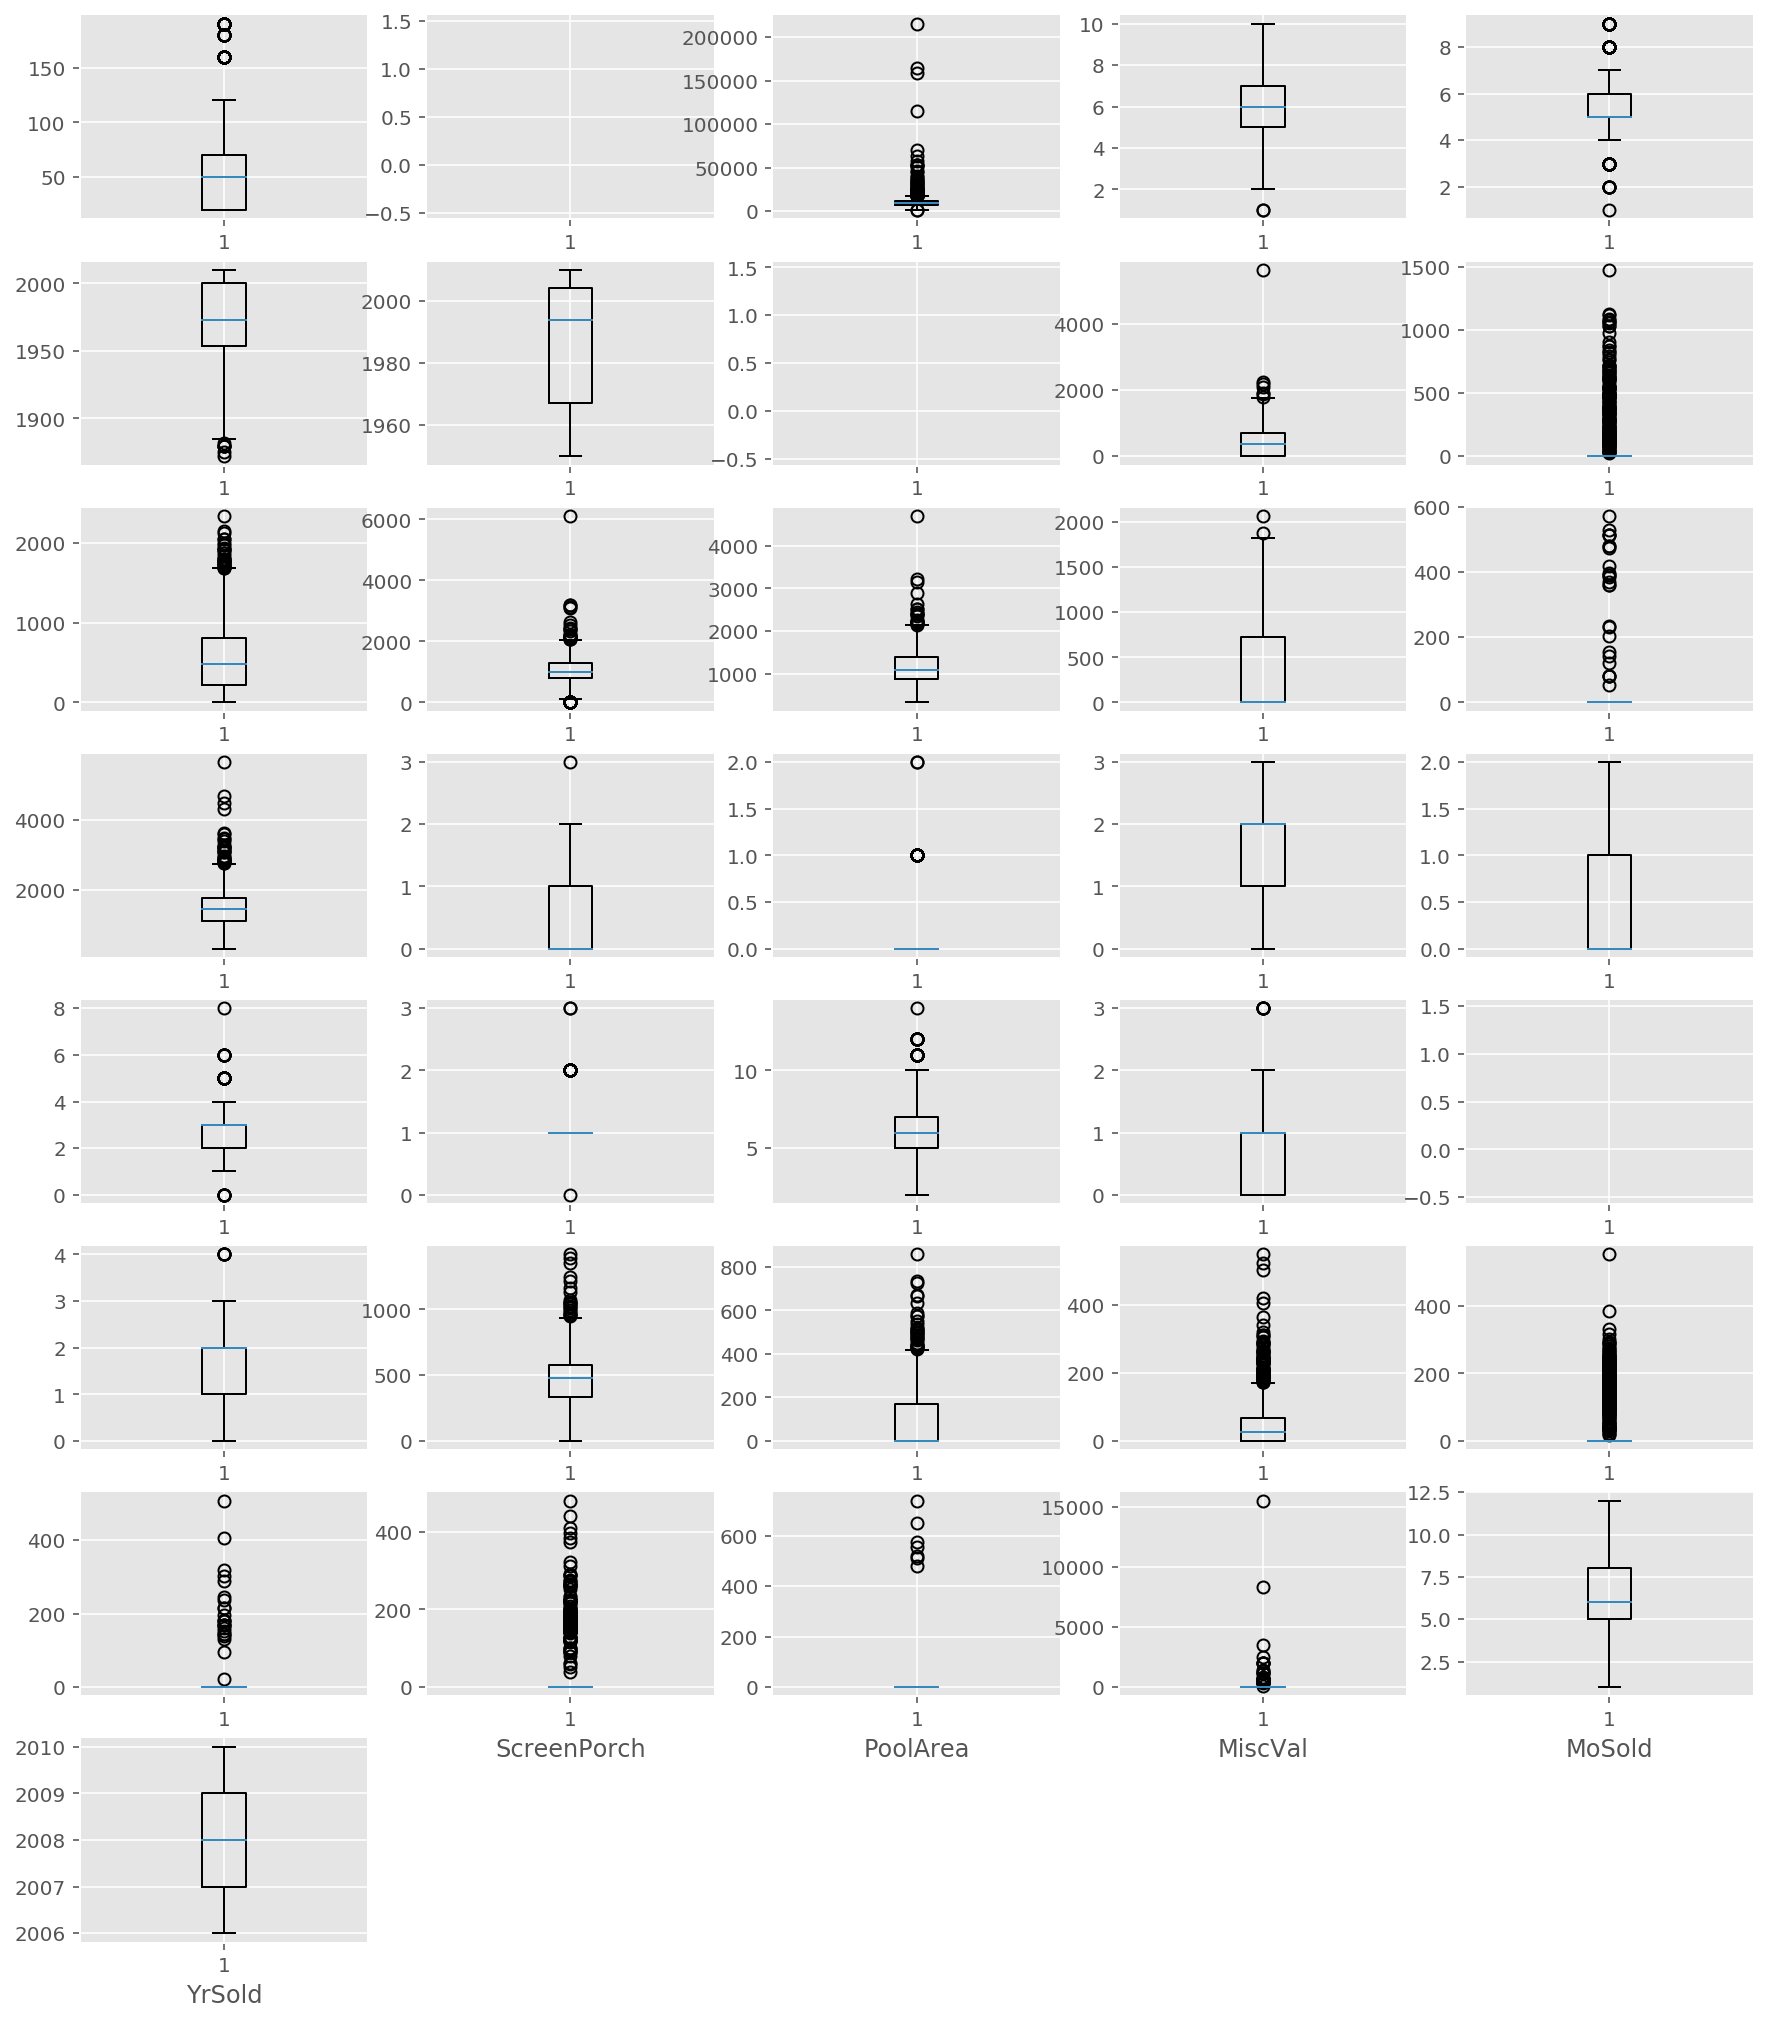

In [188]:
# lets create boxplots to detect outliars detection 
def plot_outliers():
    plt.figure(figsize=(15,20))
    idx=1
    # print(len(num_vars))
    for _,col in enumerate(num_vars):
        plt.subplot(len(num_vars)/4,5,idx)
        plt.boxplot(df[col])
        plt.xlabel(col)
        idx+=1

    name='Outliers'      
    plt.savefig('images/{}.png'.format(name))  
    
plot_outliers()    

There are some outliars present which need to be treated

### **There are some Date Variables in the dataset when we performed df.head()<br>Let's check again**

In [189]:
# making list of date variables
yr_vars = []
for col in df.columns:
    if "Yr" in col or "Year" in col:
        yr_vars.append(col)

yr_vars = set(yr_vars)
yr_vars

{'GarageYrBlt', 'YearBuilt', 'YearRemodAdd', 'YrSold'}

**Let's check relation of these fields with the target variable**

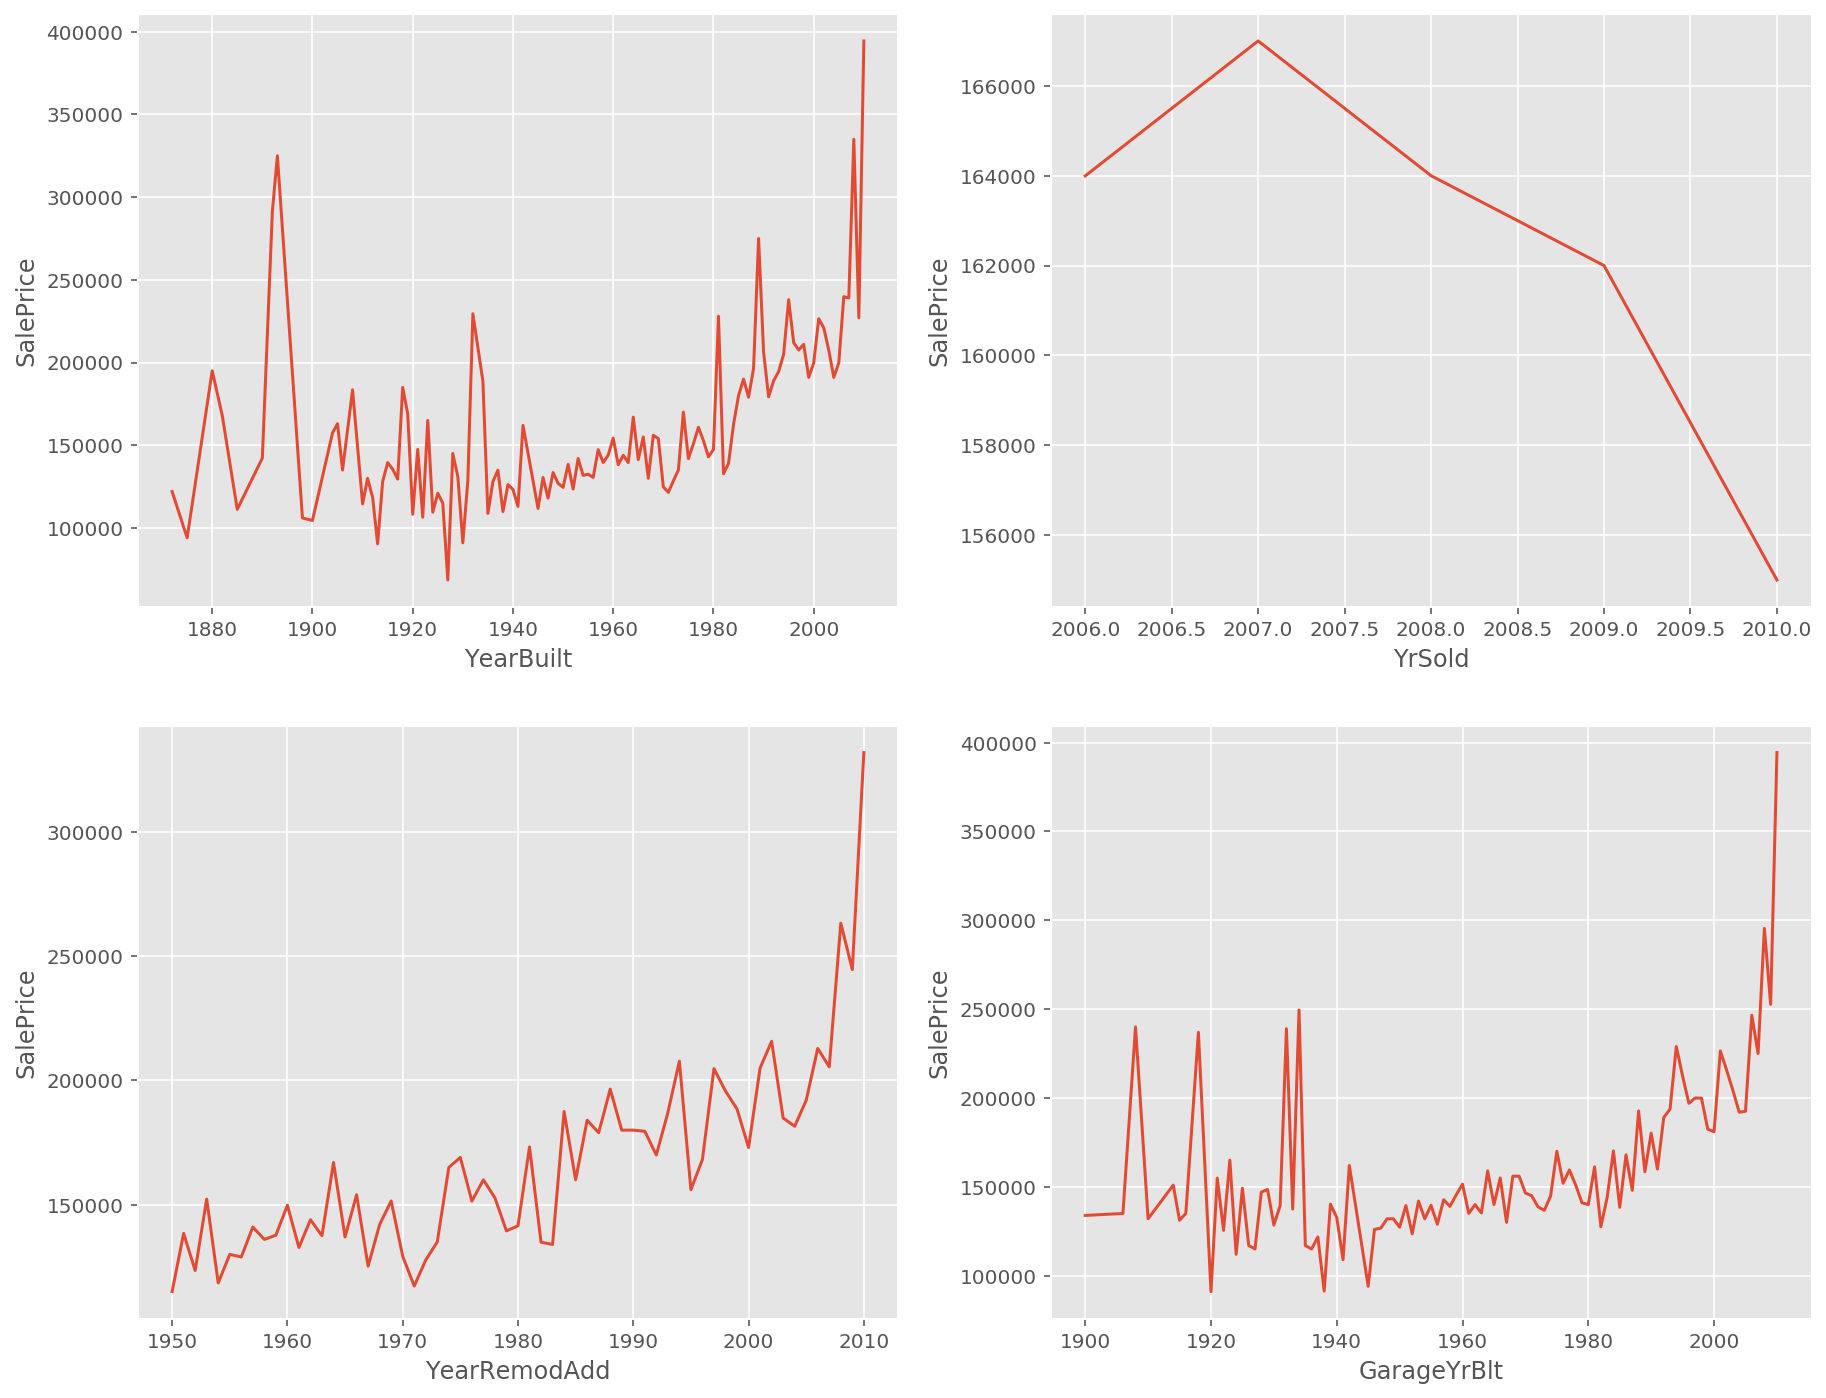

In [190]:
plt.figure(figsize = (15,12))
for idx,col in enumerate(yr_vars):
    plt.subplot(2,2,idx+1)
    plt.plot(df.groupby(col)["SalePrice"].median())
    plt.xlabel(col)
    plt.ylabel("SalePrice")
    
name='Date variable relationship'      
plt.savefig('images/{}.png'.format(name))     

- Make a note of the trend of sale price with the field "YrSold", it shows a decreasing trend which seems unreal in real state scenario, price is expected to increase as the time passes by, but here it shows opposite.

### Check variation in the feature values

In [191]:
# Let's further seperate the numeric features into continous and discrete numeric features
num_cont = []
num_disc = []
for col in num_vars:
    if df[col].nunique() > 25: # if variable has more than 25 different values, we consider it as continous variable
        num_cont.append(col)
    else:
        num_disc.append(col)

In [192]:
print("Len : {}\n{}".format(len(num_cont), num_cont))
print("*"*50)
print("Len : {}\n{}".format(len(num_disc), num_disc))
print("*"*50)
print("Len : {}\n{}".format(len(cat_vars), cat_vars))
print('house shape',df.shape)

Len : 18
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch']
**************************************************
Len : 18
['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
**************************************************
Len : 38
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'Cent

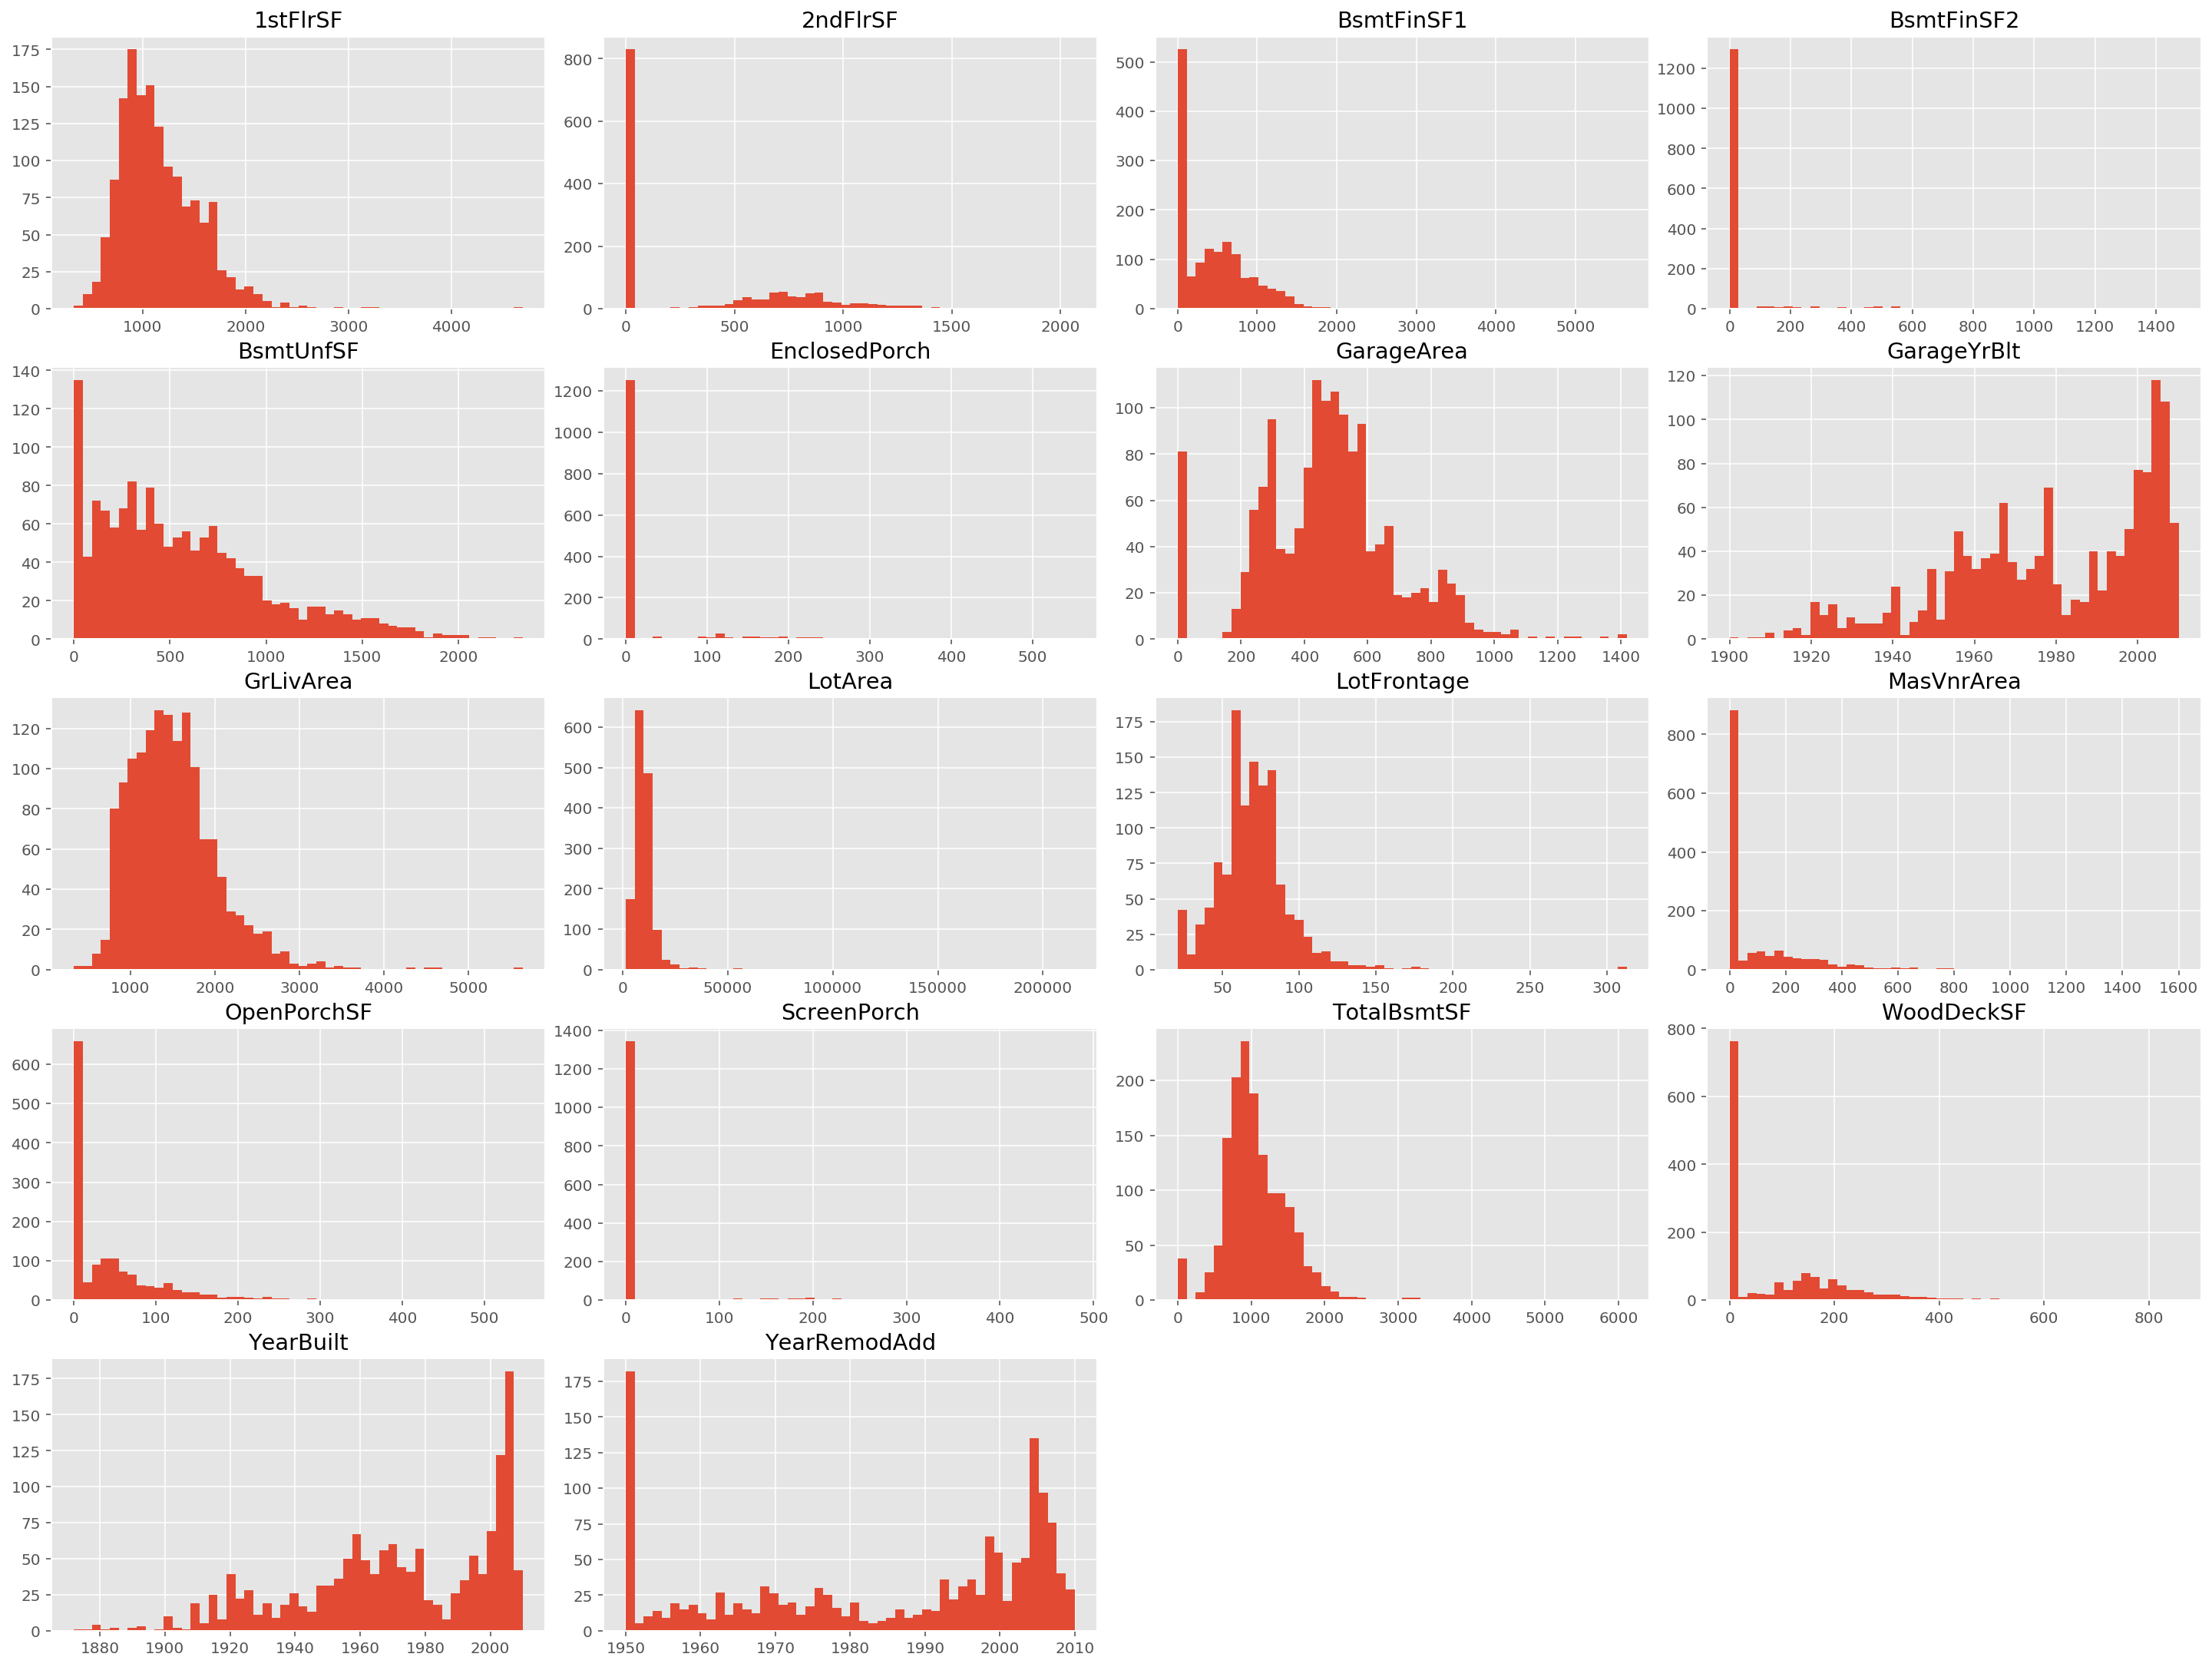

In [193]:
# lets check for the variance in the different continous numeric columns present in the dataset
df.hist(num_cont,bins=50, figsize=(20,15))
plt.tight_layout(pad=0.4)
# plt.show()
name='Variance of numerical data'      
plt.savefig('images/{}.png'.format(name))

In [18]:
# lets check the variance in numbers
# for col in num_cont:
#     print(house[col].value_counts())
#     print("\n")

**Following variables seems to have low variance:**
* MasVnArea
* BsmtFinSF2
* 2ndFlrSF
* EnclosedPorch
* ScreenPorch
* WoodDeckSF

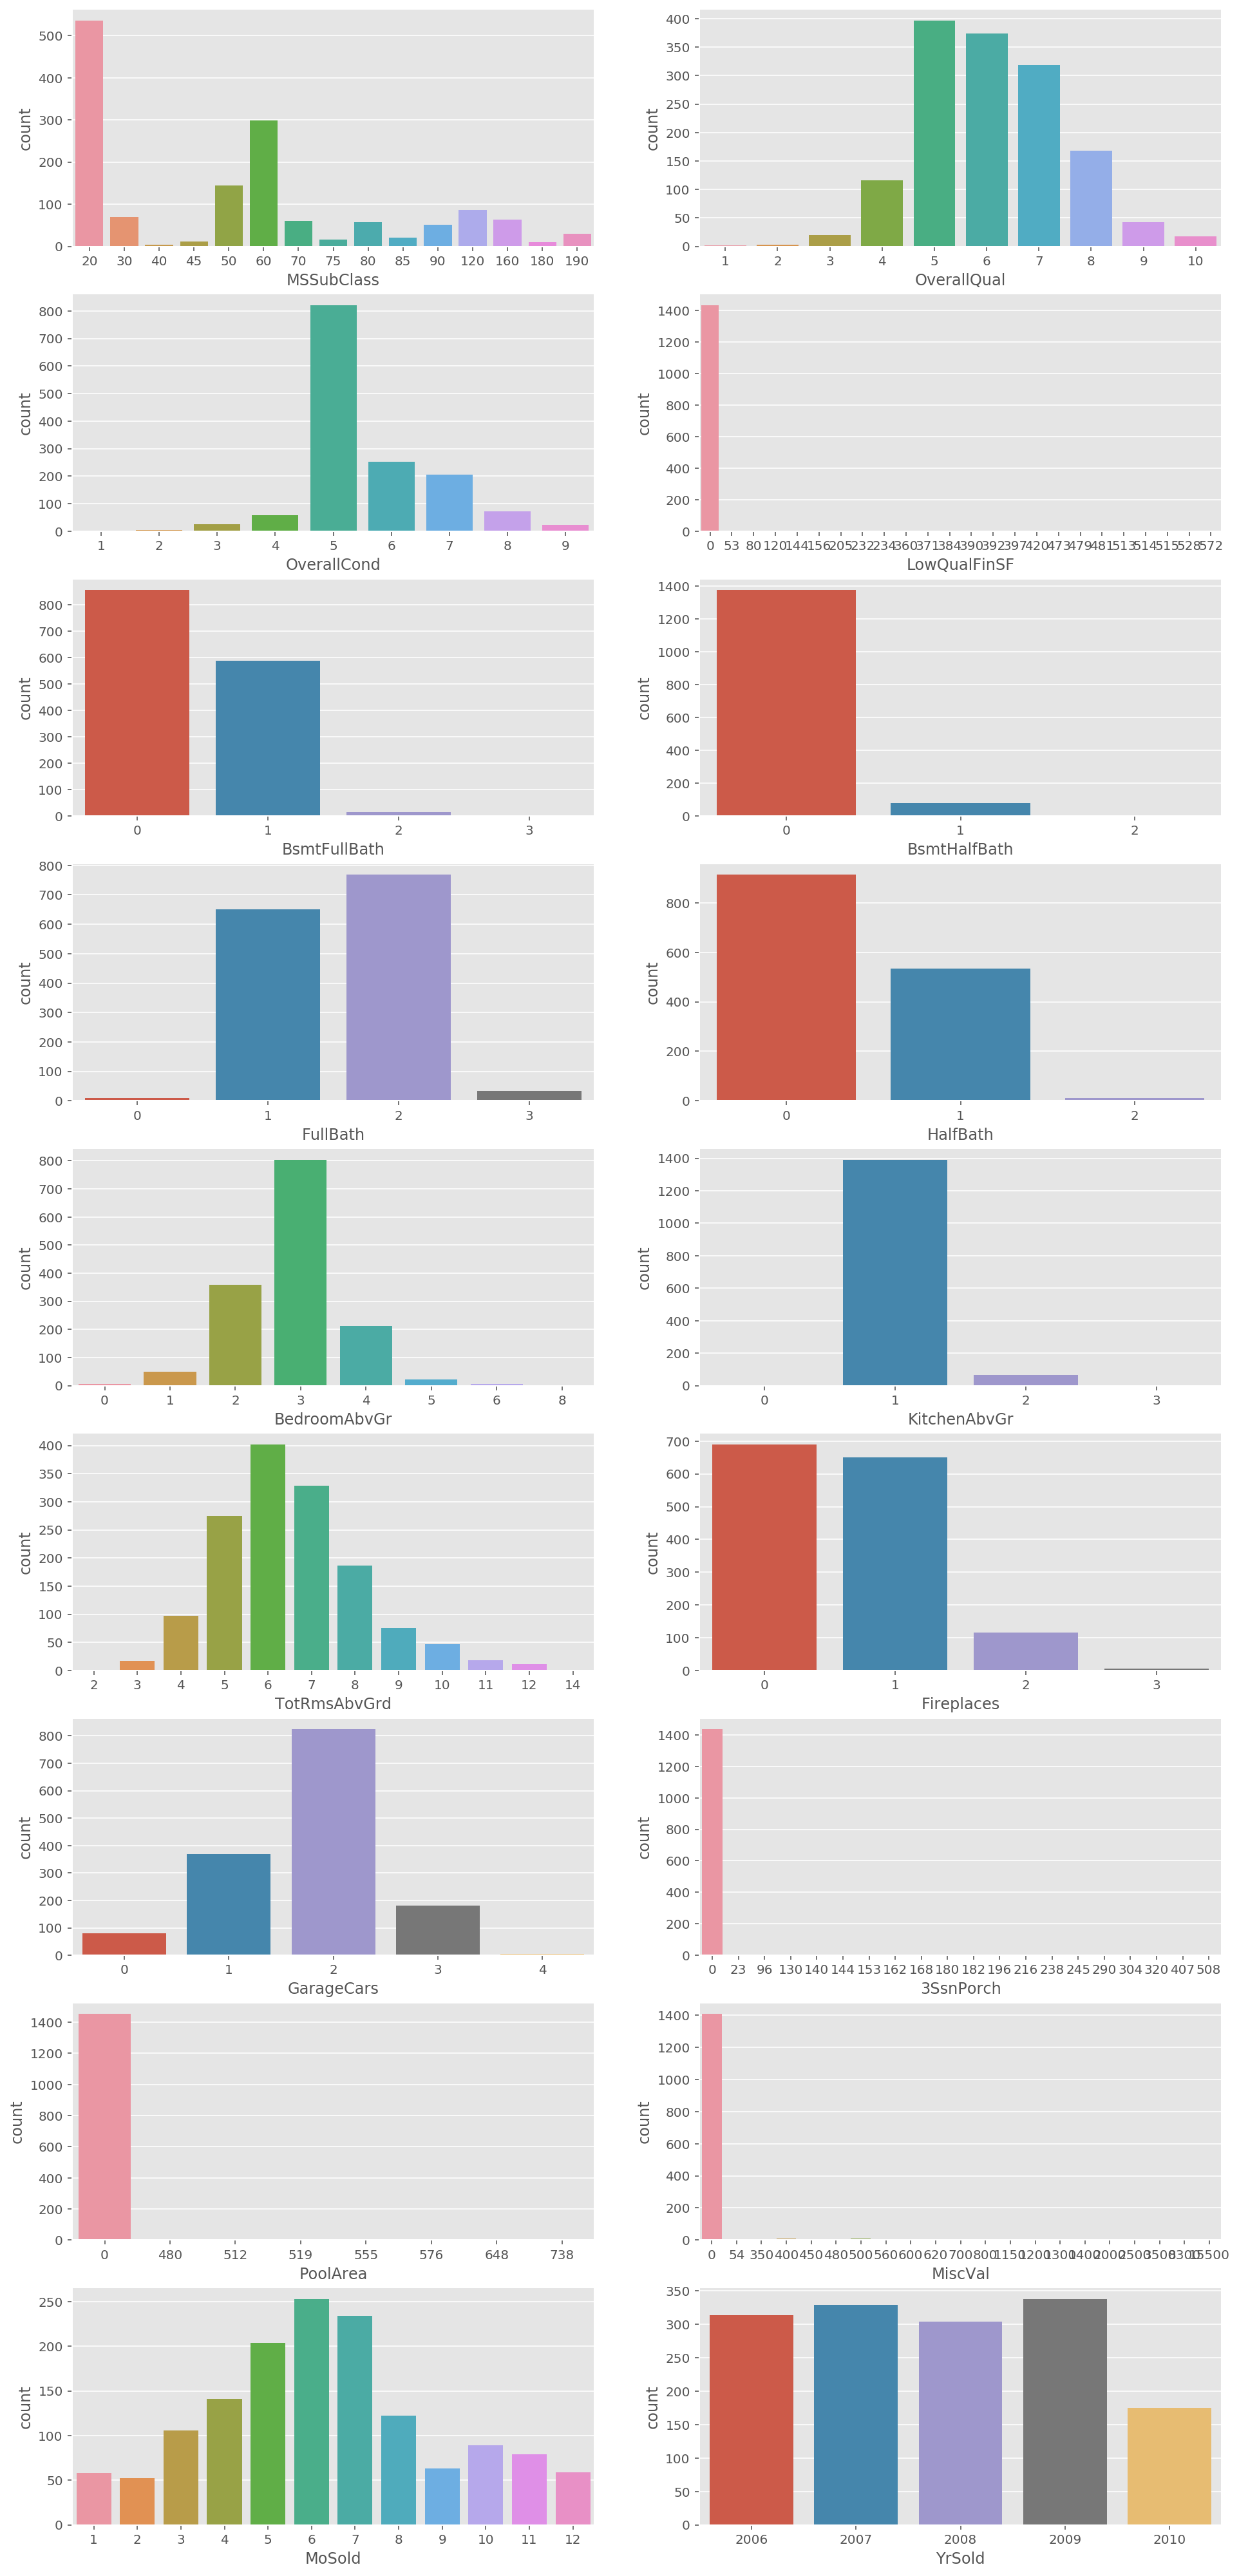

In [194]:
# lets check for the variance in the different discrete numeric columns present in the dataset
plt.figure(figsize = (16,40))
for idx,col in enumerate(num_disc):
    plt.subplot(len(num_disc)/2+1,2,idx+1)
    ax=sns.countplot(df[col])
#     for p in ax.patches:
#        ax.annotate(p.get_height(), (p.get_x()+0.1, p.get_height()+10))
name='Variance of numerical descrete data'      
plt.savefig('images/{}.png'.format(name))

**following variables seems to have low variance:**
* LowQualFinSF
* BsmtHalfBath
* KitchenAbvGr
* 3SsnPorch
* PoolArea
* MiscVal


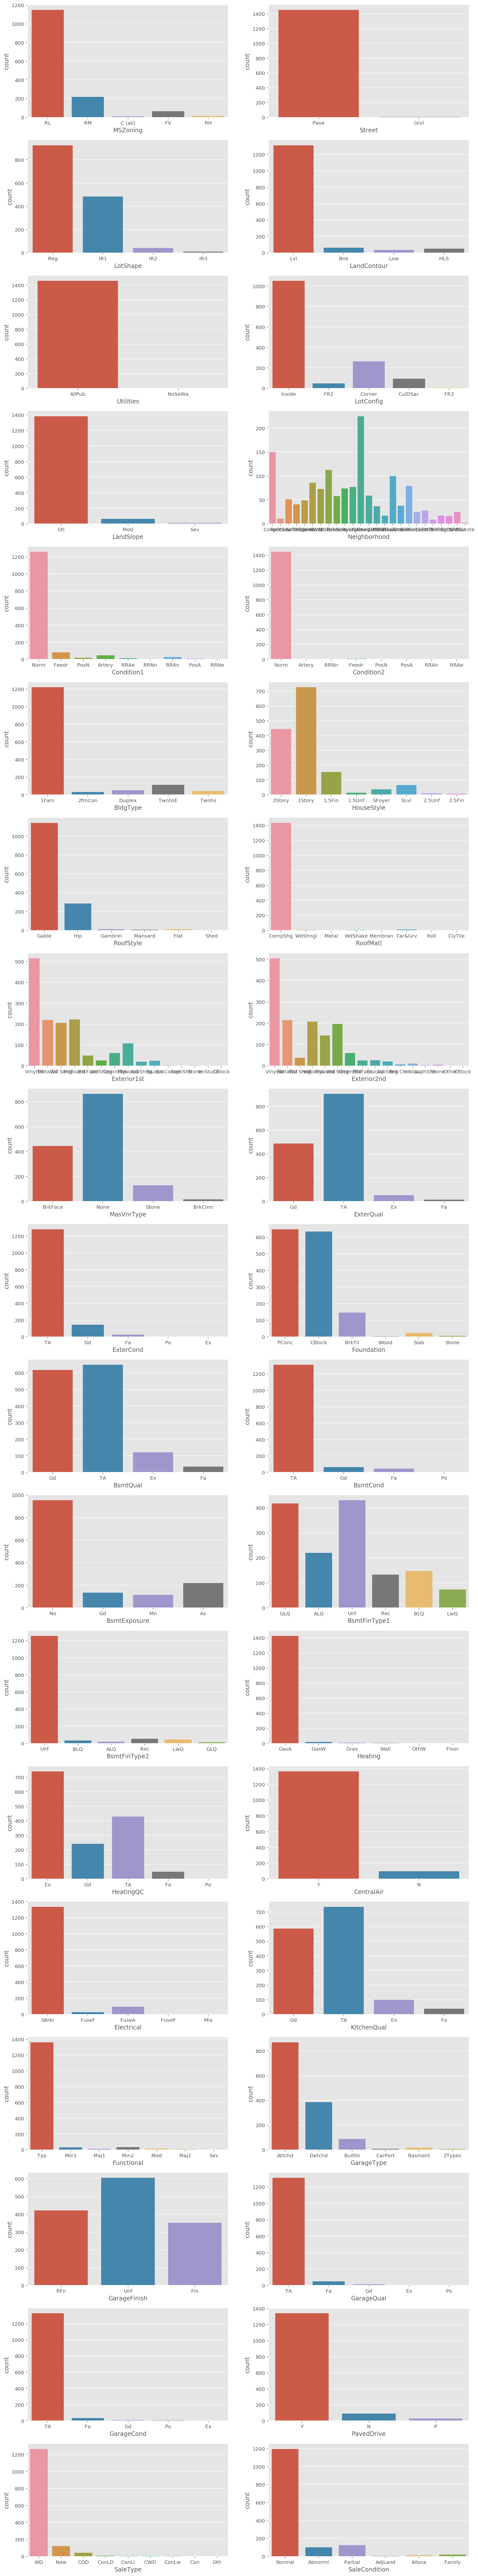

In [197]:
# lets check for the variance in the categorical columns present in the dataset
plt.figure(figsize = (16,100))
for idx,col in enumerate(cat_vars):
    plt.subplot(len(cat_vars)/2+1,2,idx+1)
    ax=sns.countplot(df[col])
#     plt.xticks(rotation=45)
    #for p in ax.patches:
    #    ax.annotate(p.get_height(), (p.get_x()+0.25, p.get_height()+5))

In [21]:
# lets check the variance in numbers
# for col in cat_vars:
#     print(house[col].value_counts())
#     print("\n")

**Following variables seems to have low variance:**

* MSZoning
* Street,
* Alley
* LandContour,
* Utilities,
* LotConfig
* Condition1
* LandSlope
* Condition2,
* BldgType
* RoofStyle
* RoofMatl
* ExterCond
* BsmtCond
* BsmtFinType2
* Heating
* CentralAir
* Electrical
* Functional
* GarageQual
* GarageCond
* PavedDrive
* PoolQC
* Fence
* MiscFeature
* SaleType
* SaleCondition

### Lets check for skewness of data 

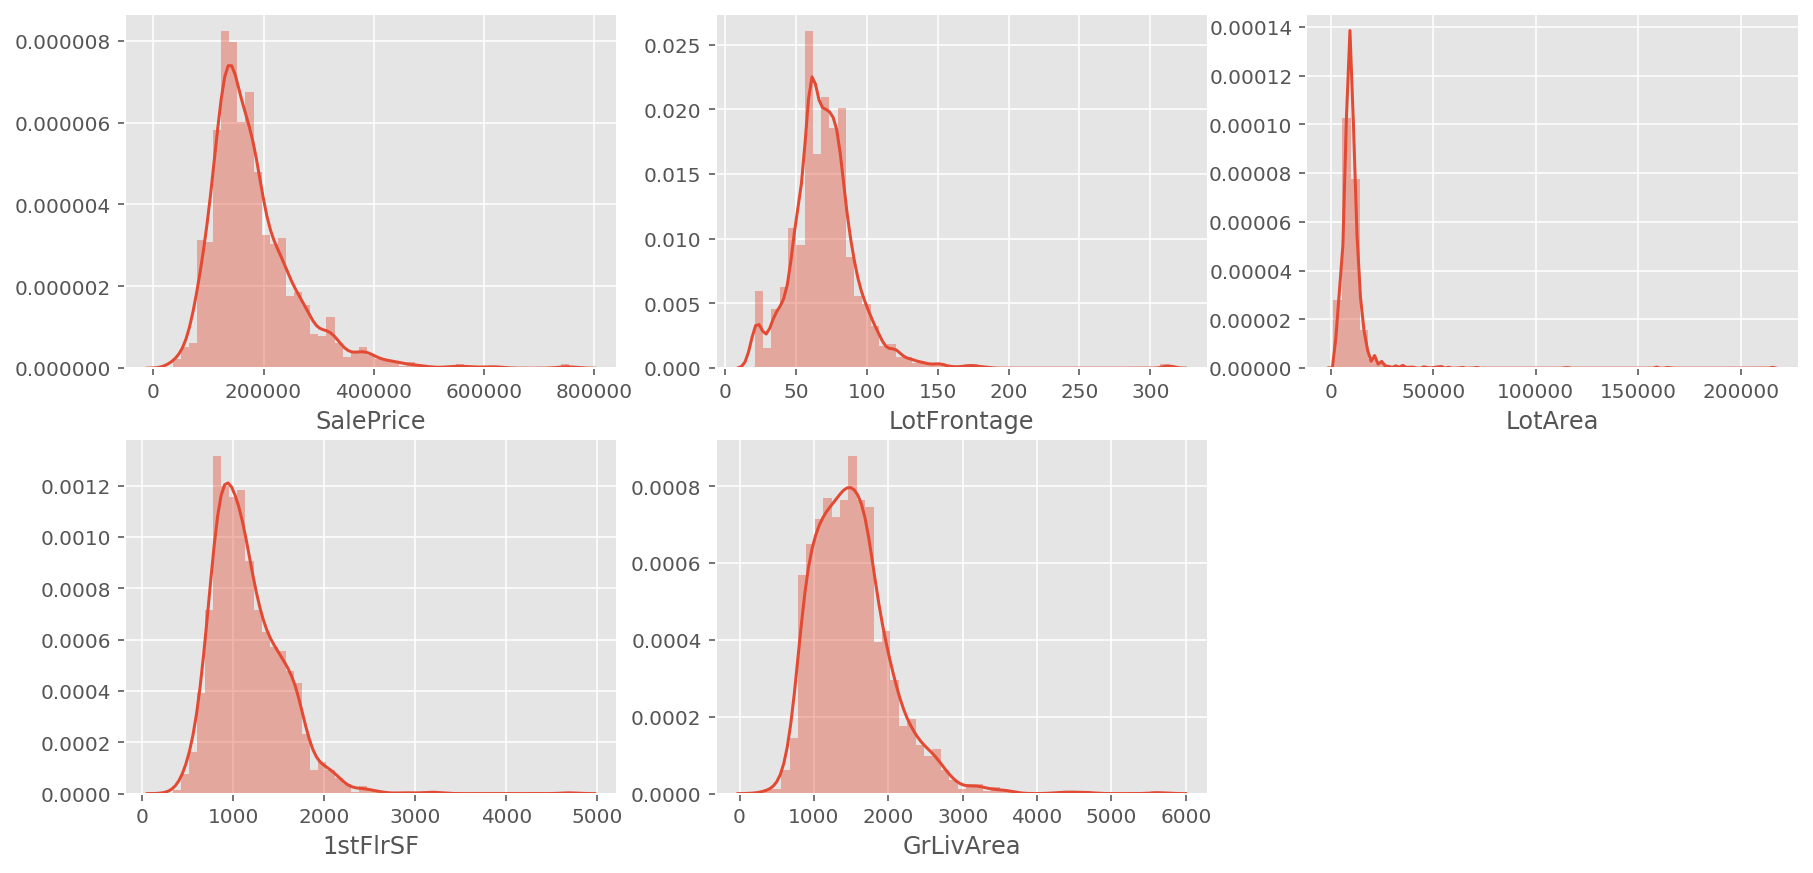

In [198]:
num_features=['SalePrice', 'LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea']
plt.figure(figsize = (15,15))
idx=1
for col in num_features:
    # plot before log transform
    plt.subplot(4,3,idx)
    ax=sns.distplot(df[col].dropna())
    idx +=1

There is skewness in the data and needs to be handled. (Observer the log tail towards right end of plot for SalePrice/LotArea/1stFlrSF)

### Bi-Variate analysis with "SalePrice"

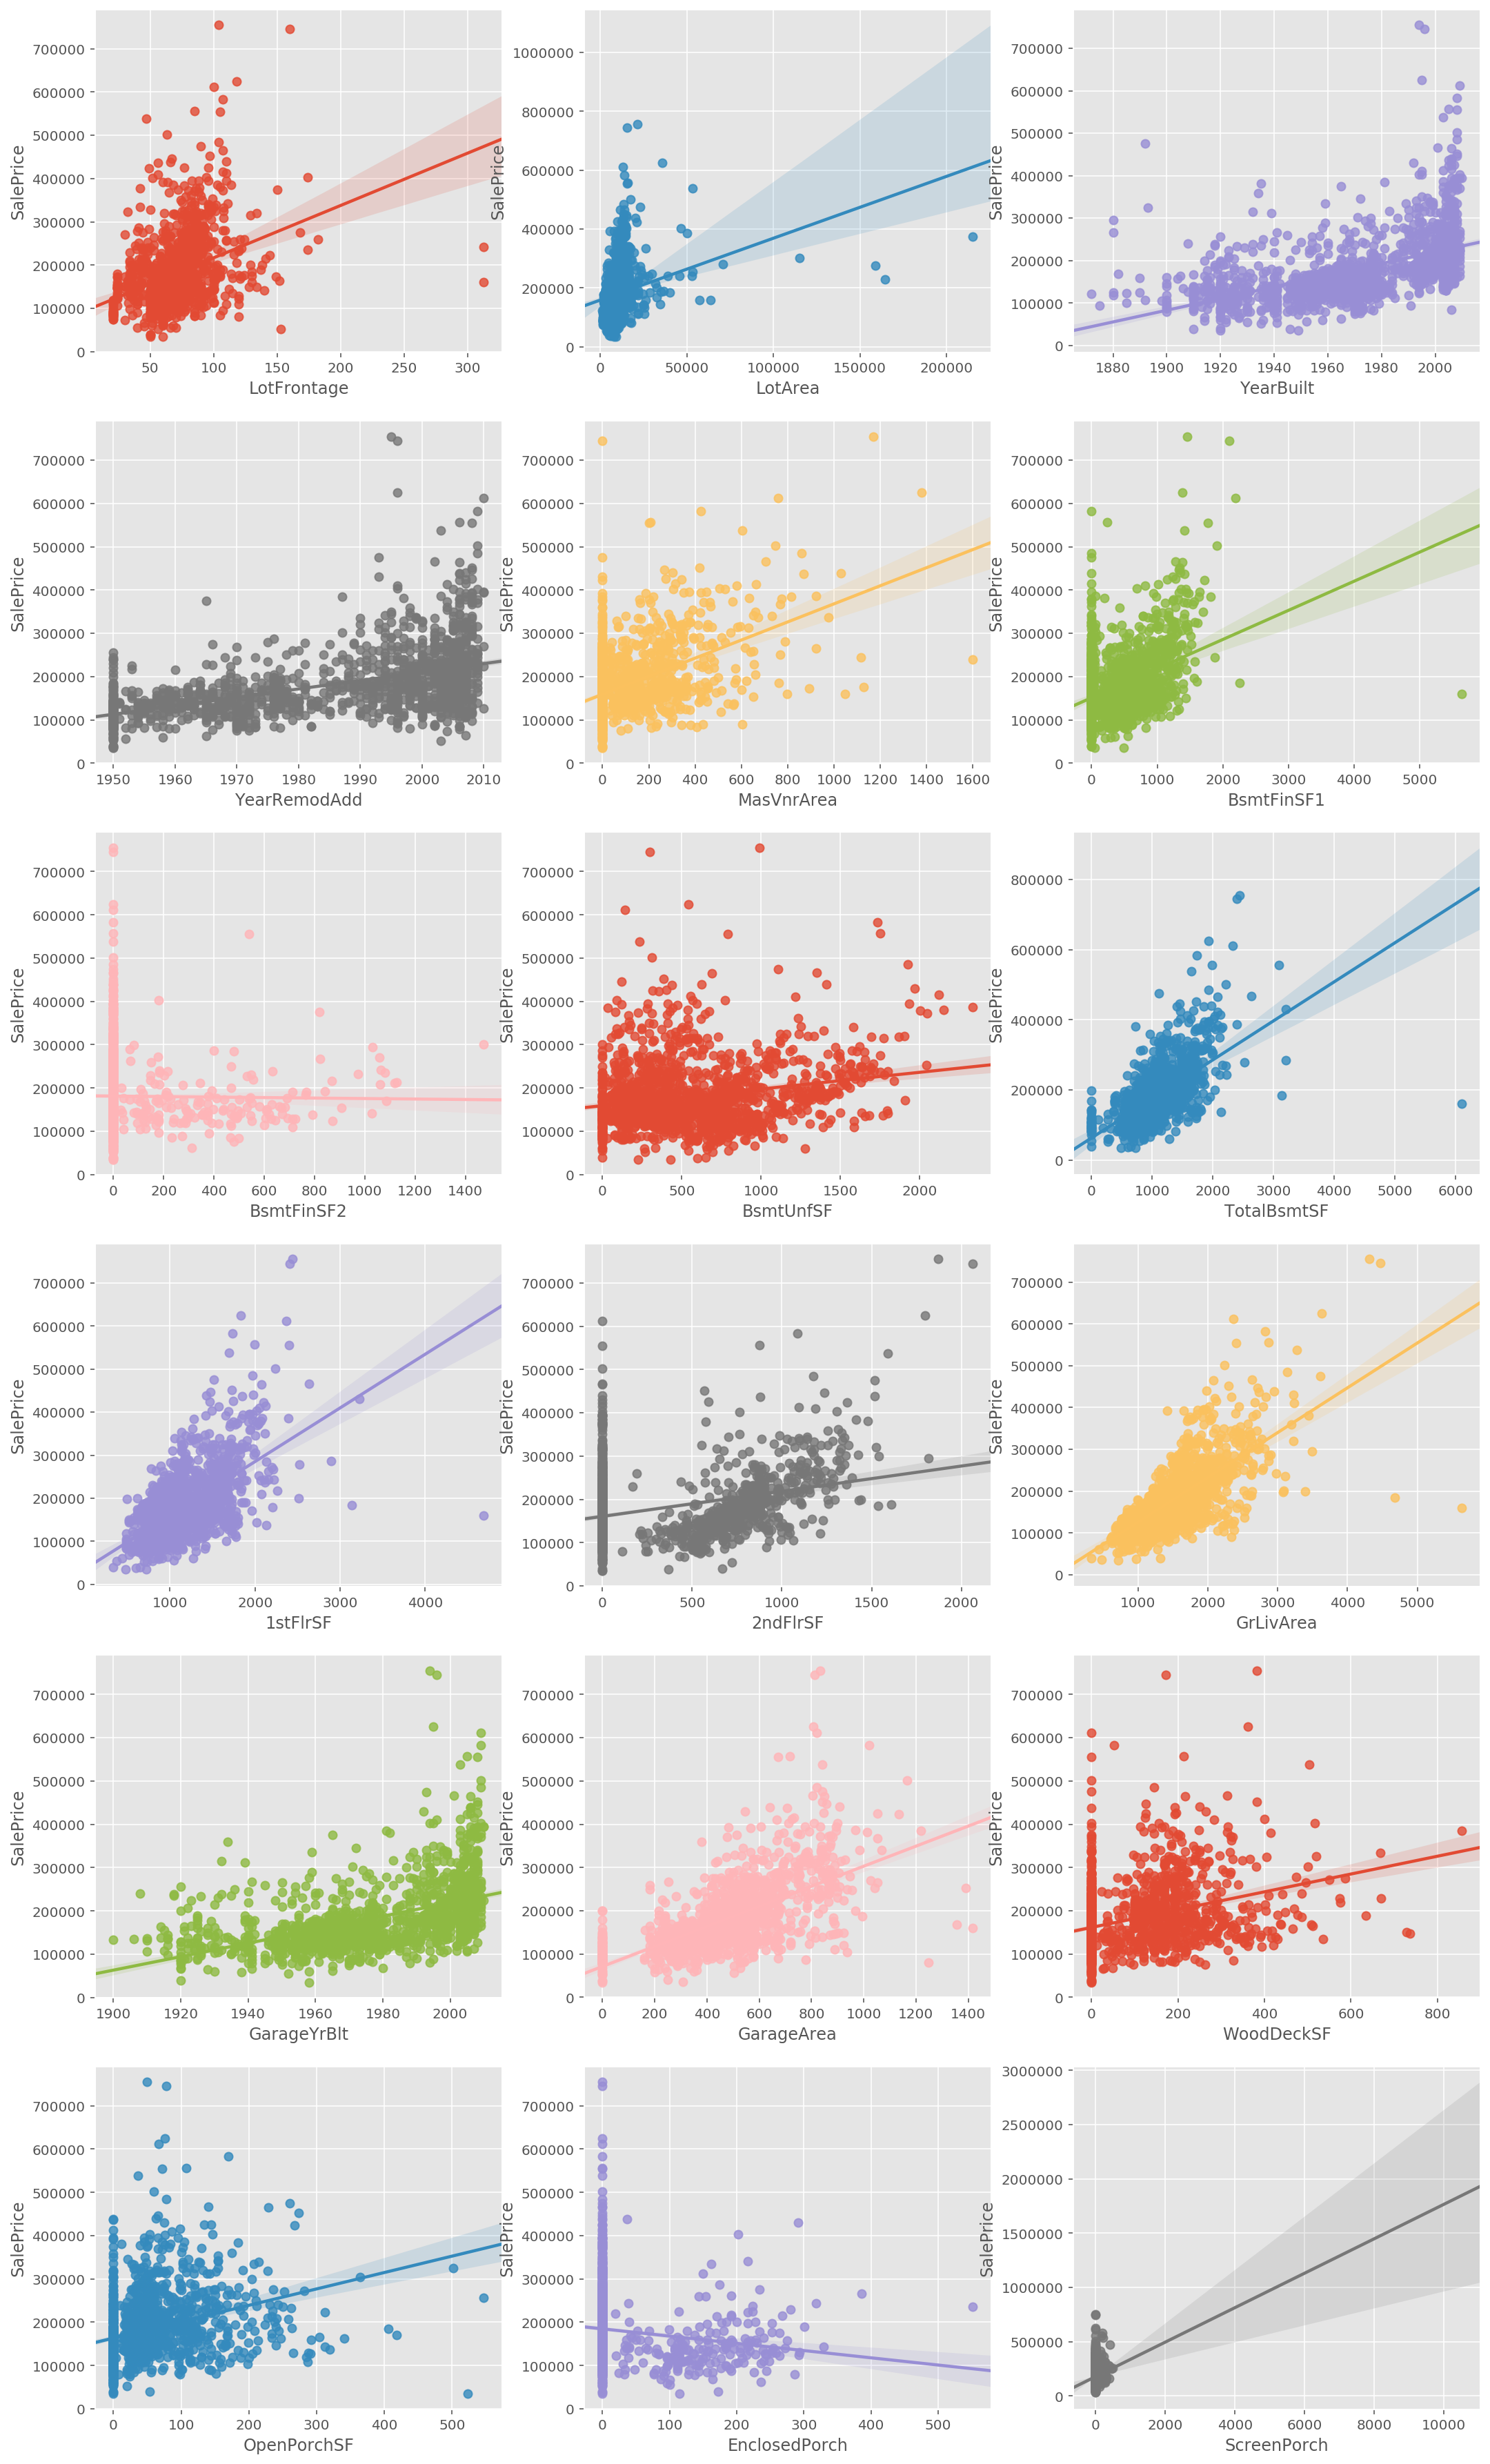

In [200]:
fig, ax = plt.subplots(round(len(num_cont) / 3), 3, figsize = (18, 32))

for i, ax in enumerate(fig.axes):
    if i < len(num_cont)+1:
        sns.regplot(x=num_cont[i],y=df["SalePrice"], data=df[num_cont], ax=ax)
        
name='Bivariate num cont'      
plt.savefig('images/{}.png'.format(name))

**Most of the features above seems to have a good relation with SalePrice**

**There are some outliars present which need to be treated**

### Now we will see how SalePrice varies with respect to "Discrete numeric variables" in the dataset

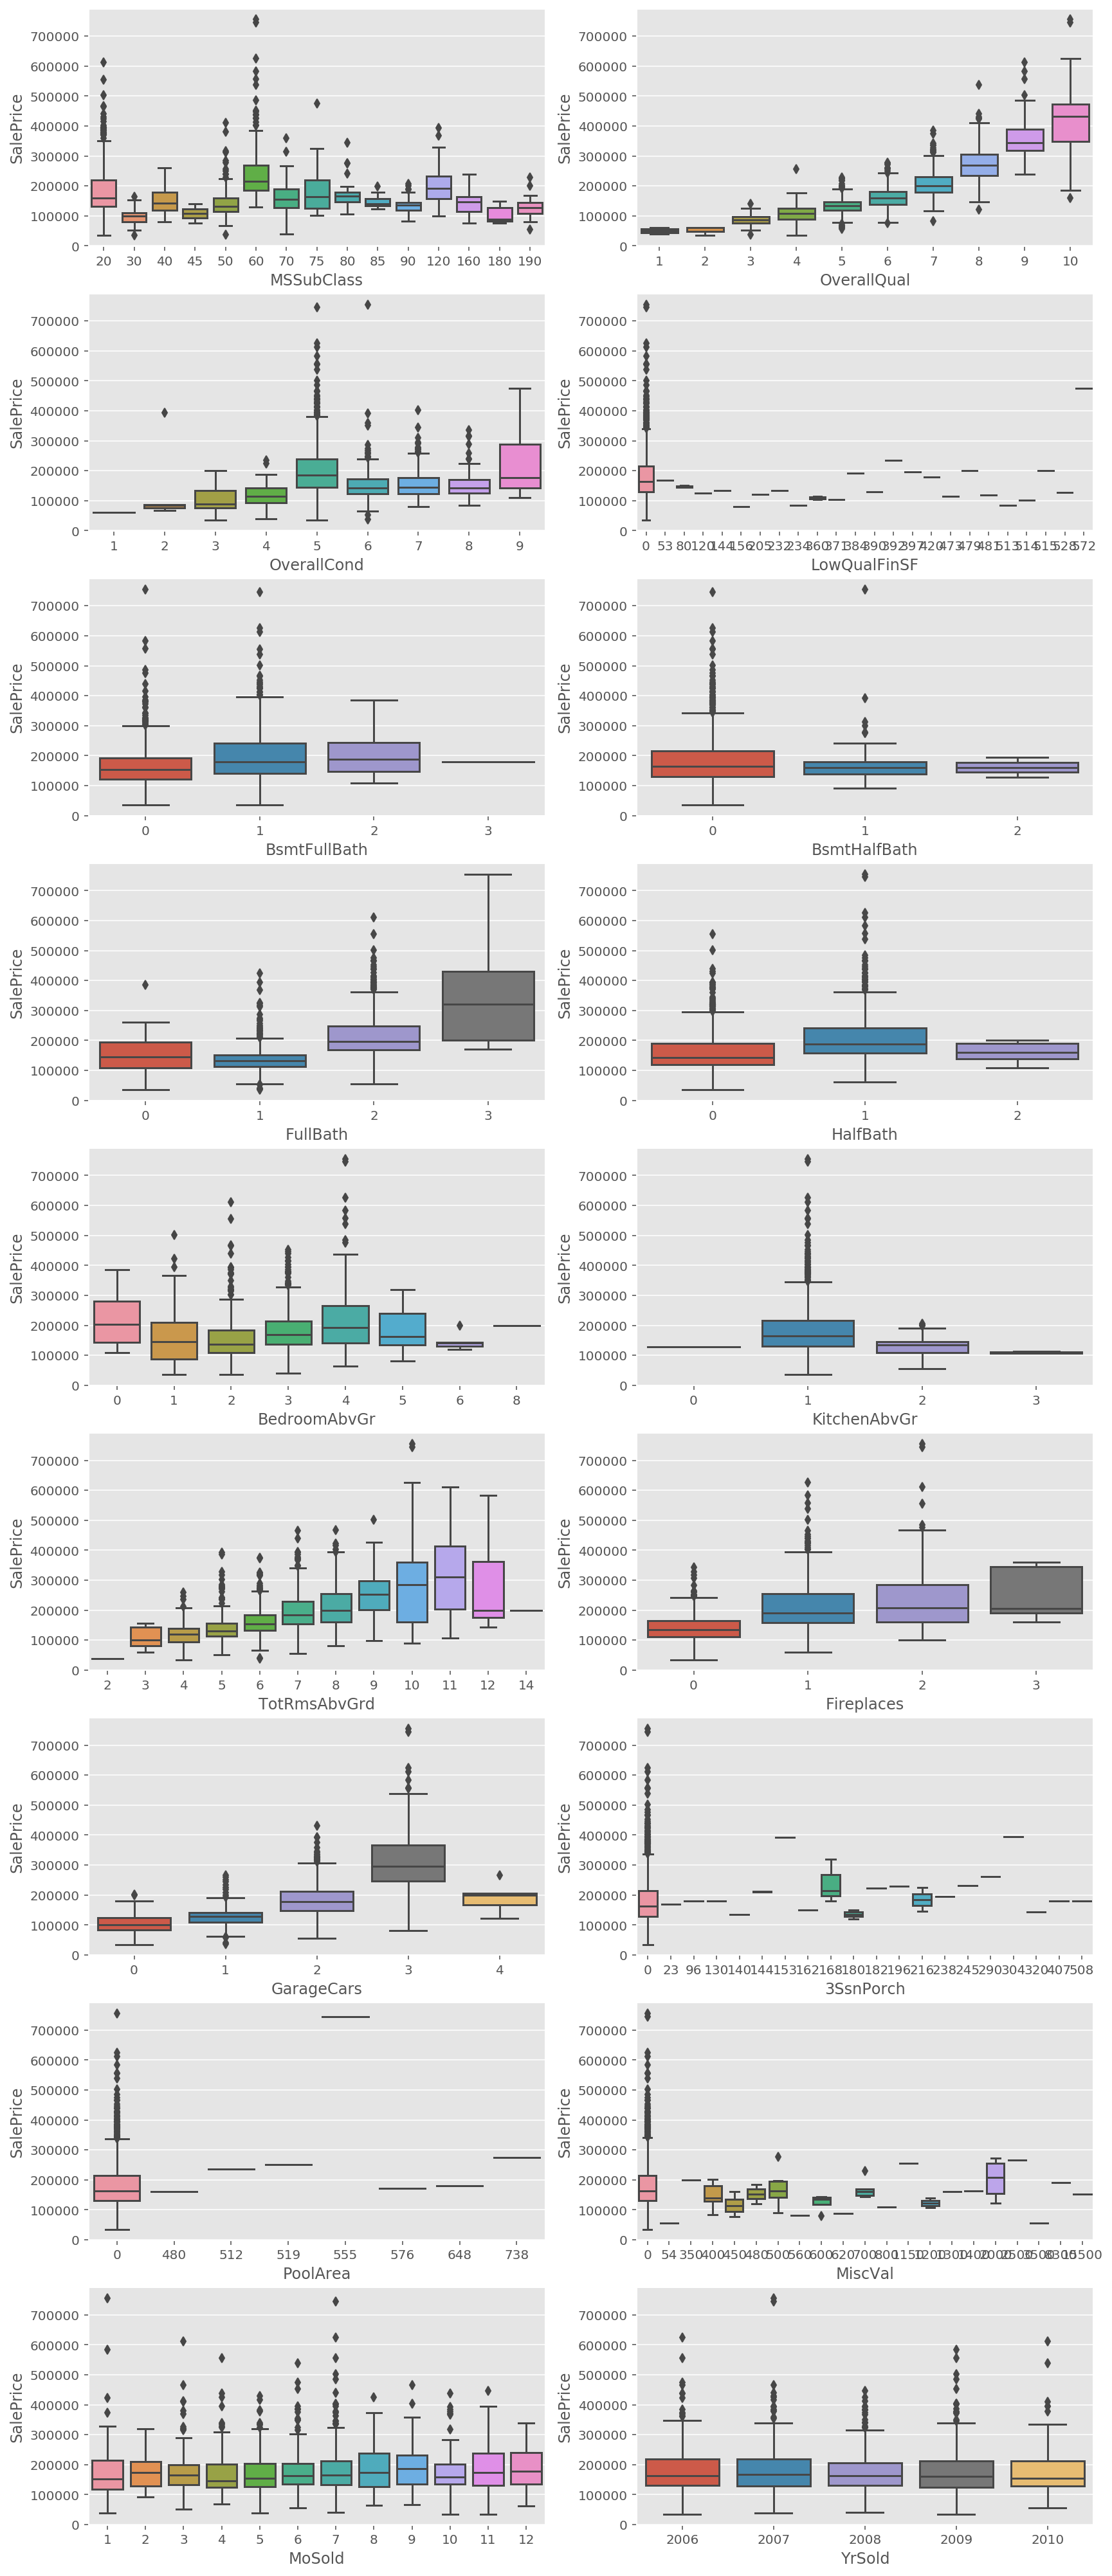

In [201]:
# now lets plot the graphs for discrete variables
plt.figure(figsize=(14,36))
for idx,col in enumerate(num_disc):
    plt.subplot(len(num_disc)/2,2,idx+1)
    sns.boxplot(x = df[col],y=df["SalePrice"])
    plt.ylabel("SalePrice")
    plt.xlabel(col)
    
name='Bivariate num descrete'      
plt.savefig('images/{}.png'.format(name))    

We can drop MSSubClass, YrSold & MoSold as they have no impact on SalePrice

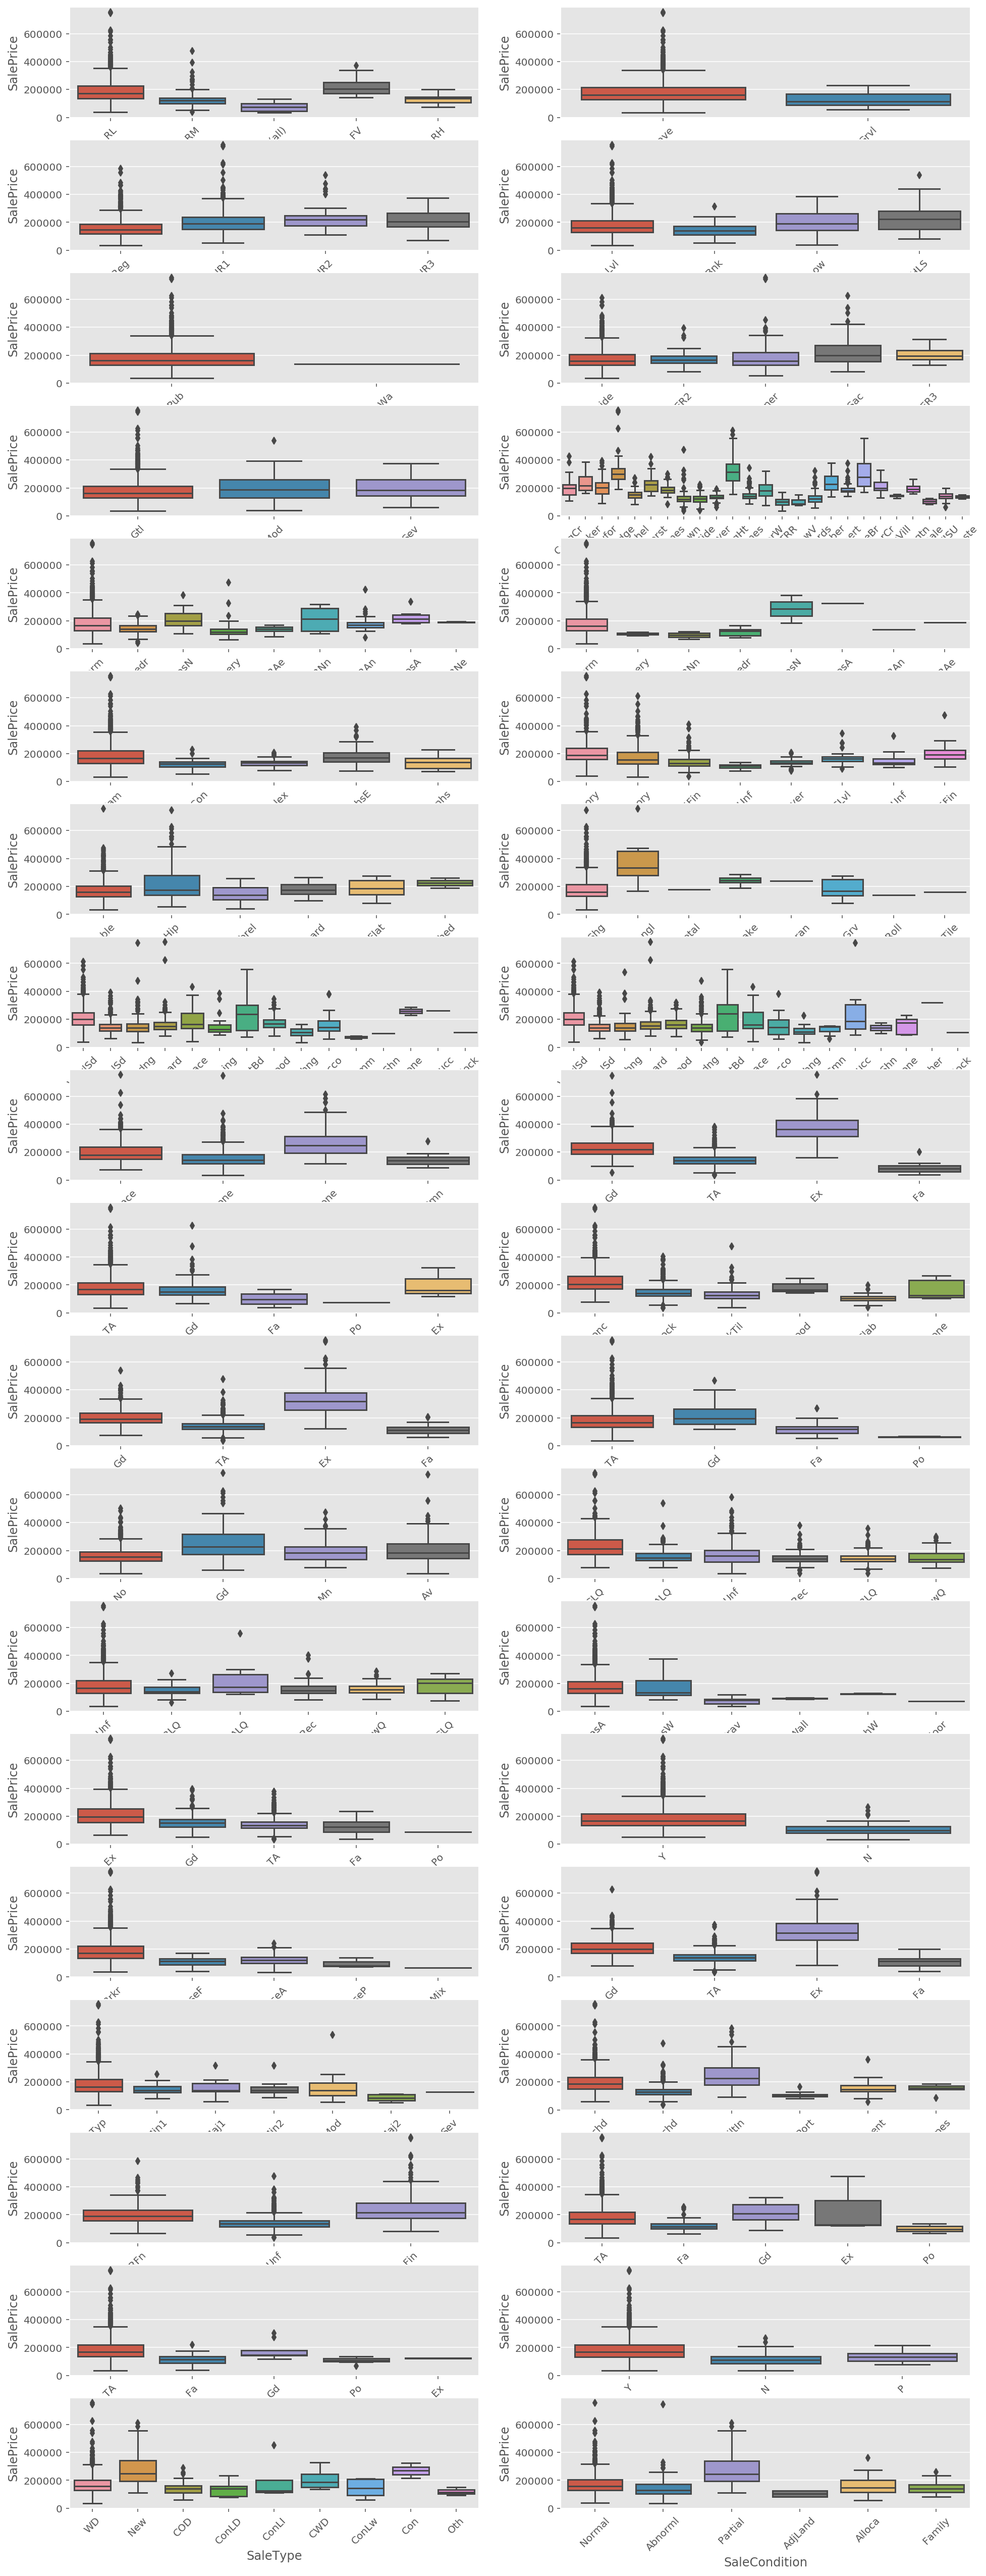

In [202]:
# lets check relation of sale price with categorical variables
plt.figure(figsize=(16,48))
l = len(cat_vars)/2 + 1
for idx,col in enumerate(cat_vars):
    plt.subplot(l,2,idx+1)
    sns.boxplot(x = df[col],y=df["SalePrice"])
    plt.xticks(rotation=45)
    plt.ylabel("SalePrice")
    plt.xlabel(col)

### Correlation
Now we'll try to find which features are strongly correlated with SalePrice. <br>We'll store them in a var called golden_features_list. We'll reuse our df_num dataset to do so.

In [203]:
df_num_corr = df.corr()['SalePrice']
golden_features_list = df_num_corr[abs(df_num_corr) >= 0.5].sort_values(ascending=False)

if 'SalePrice' in golden_features_list:
    golden_features_list = golden_features_list.drop('SalePrice')
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There is 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Text(0.5, 1, 'Co-relation Matrix')

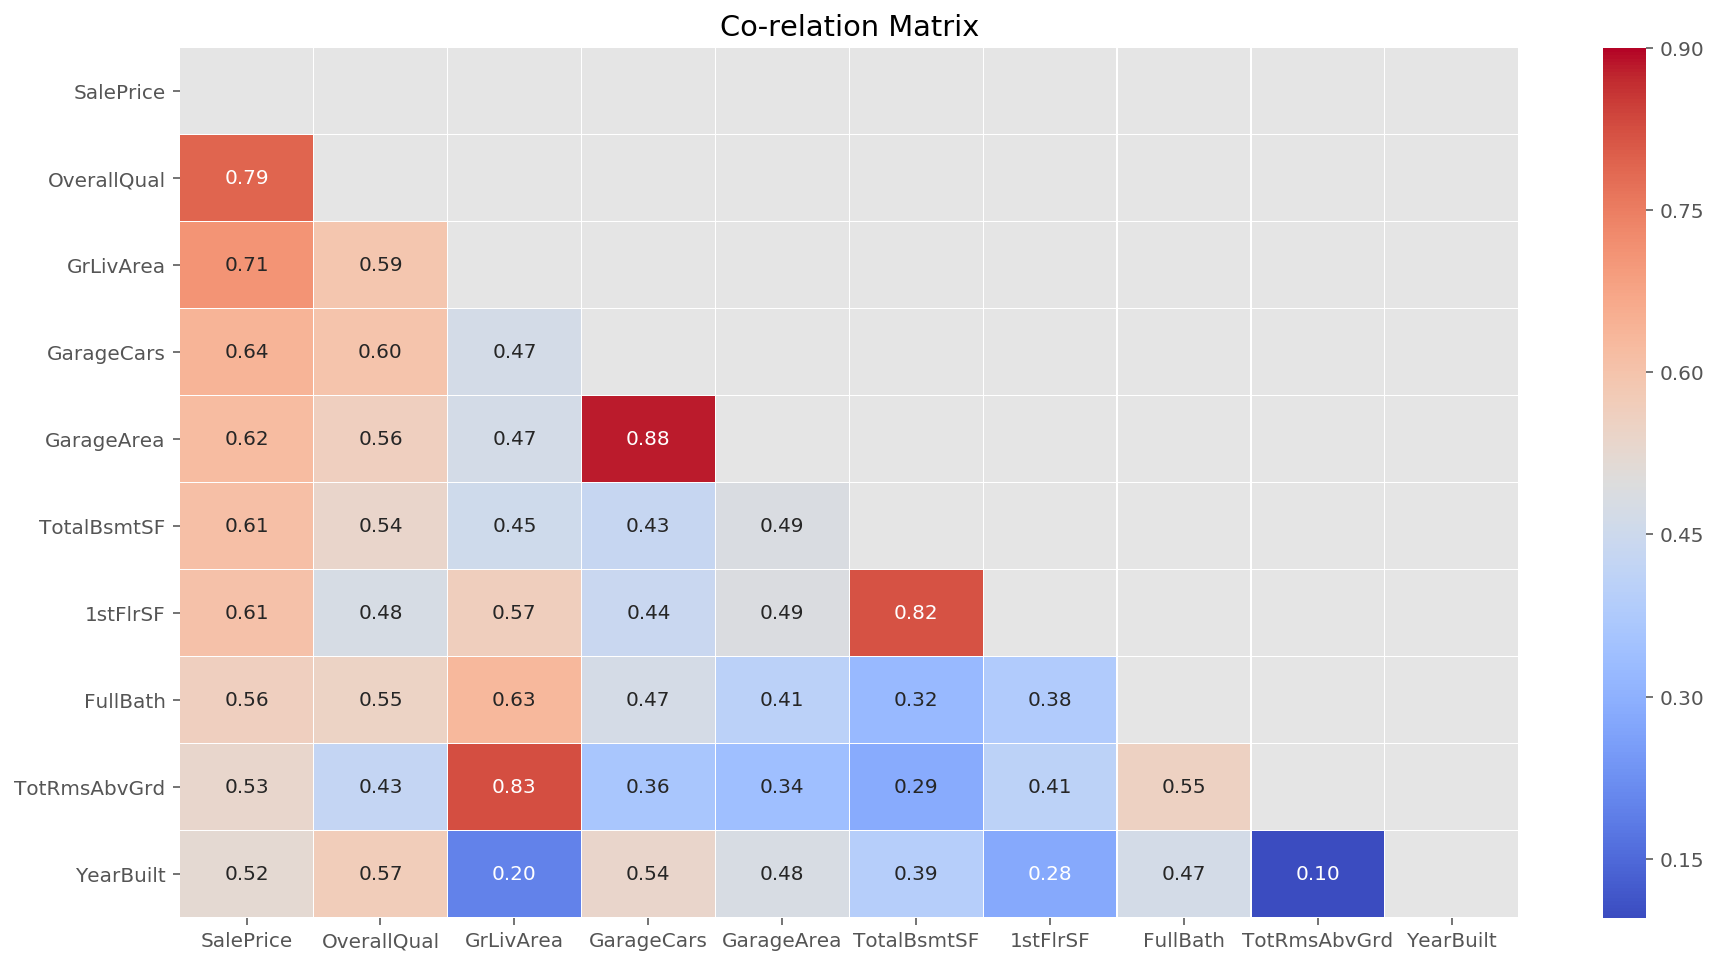

In [204]:
target = 'SalePrice'

corr = df.corr()
corr_abs = corr.abs()

nr_num_cols = len(golden_features_list)

cols = corr_abs.nlargest(nr_num_cols, target)[target].index
cm = np.corrcoef(df[cols].T)

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(15,8))
hm = sns.heatmap(cm, annot=True, cmap = 'coolwarm', vmax=.9, linecolor='white', linewidths=.1, mask=mask,
                 fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.title('Co-relation Matrix')

## The factors that effect housing prices may be summarized as property size, location desirability, nearby amenities, number of rooms, construction materials, and age and condition of the structure.

Lets begin analysing each one

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

In [225]:
df.MSZoning.unique() # C denotes commercial properties

array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object)

In [226]:
# df[df['MSZoning'] == 'C (all)'].MSZoning.count()
df.groupby('MSZoning').SalePrice.count()

MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: SalePrice, dtype: int64

In [227]:
# print(df.groupby('MSZoning').SalePrice.count())
print(df.groupby('MSZoning').SalePrice.sum())
df.groupby('MSZoning').SalePrice.mean()

MSZoning
C (all)       745280
FV          13910914
RH           2104934
RL         219846749
RM          27537069
Name: SalePrice, dtype: int64


MSZoning
C (all)     74528.000000
FV         214014.061538
RH         131558.375000
RL         191004.994787
RM         126316.830275
Name: SalePrice, dtype: float64

Only 10 commercial property sale records, lets drop them

In [228]:
# Delete all data with MSZoning = C, which appears to have 10 observations
df = df[df['MSZoning'] != 'C (all)']

In [229]:
df.shape

(1450, 75)

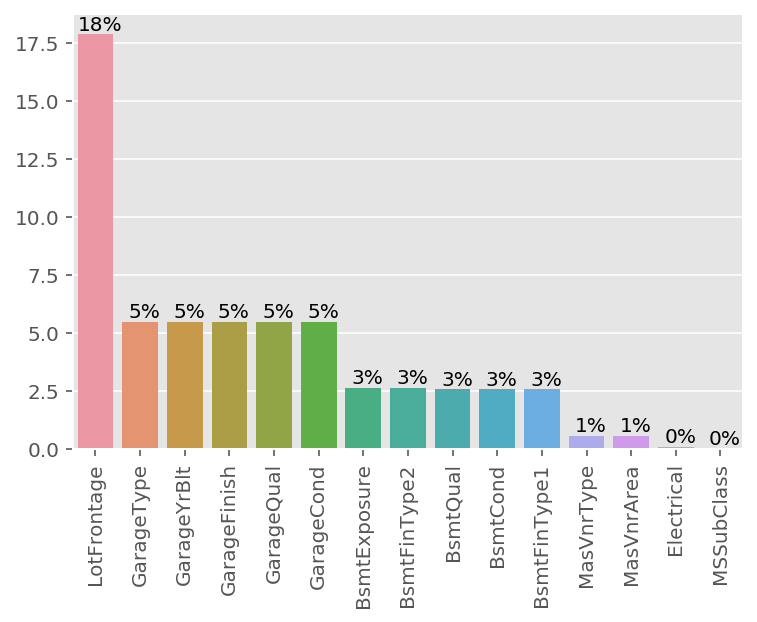

In [230]:
null_value_plot()

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property       

In [210]:
for name in df.columns:
    if 'Lot' in name:
        print (name)

LotFrontage
LotArea
LotShape
LotConfig


In [231]:
# Notice a large number of null values in 'LotFrontage'. Examine the 'Lots' grouping.
df_lots = df[['LotFrontage', 'LotArea', 'LotConfig', 'LotShape']]
grouped_lots = df_lots.groupby(['LotShape'])
grouped_lots.mean()

LotFrontage       LotArea
LotShape                           
IR1         76.003165  11901.635611
IR2         76.500000  23733.658537
IR3        138.428571  41338.200000
Reg         67.052257   8869.655022

In [232]:
grouped_lots2 = df_lots.groupby(['LotConfig'])
grouped_lots2.count()

LotFrontage  LotArea  LotShape
LotConfig                                
Corner             199      261       261
CulDSac             45       94        94
FR2                 33       47        47
FR3                  4        4         4
Inside             910     1044      1044

In [37]:
# df_lots.groupby(['LotConfig', 'LotShape']).mean()

In [233]:
# Generate 'Lots' group where there are null 'LotFrontage' values
df_LotFrontage_NA = df_lots.loc[(df['LotFrontage'].isnull())]
df_LotFrontage_NA.columns
# df_LotFrontage_NA.index

Index(['LotFrontage', 'LotArea', 'LotConfig', 'LotShape'], dtype='object')

In [234]:
df_LotFrontage_NA.head()

LotFrontage  LotArea LotConfig LotShape
7           NaN    10382    Corner      IR1
12          NaN    12968    Inside      IR2
14          NaN    10920    Corner      IR1
16          NaN    11241   CulDSac      IR1
24          NaN     8246    Inside      IR1

In [235]:
df_LotFrontage_NA.LotFrontage.isnull().sum()

259

In [236]:
print(df_LotFrontage_NA.iloc[0])
print("*"*10)
print(df_LotFrontage_NA.iloc[0][3])

LotFrontage       NaN
LotArea         10382
LotConfig      Corner
LotShape          IR1
Name: 7, dtype: object
**********
IR1


A reasonable assumption is that LotFrontage is linked to LotConfig and LotShape, and
 the other 'Lot' variables have all observations
<br>So I will replace all NA in 'LotFrontage' with its mean based on the corresponding 'LotShape', which is indexed at 3

In [237]:

df_LotFrontage_NA['LotFrontage'] = df_LotFrontage_NA.apply(lambda x: 76.00 if (x[3] == 'IR1') 
                                                           else x[0], axis=1)
df_LotFrontage_NA['LotFrontage'] = df_LotFrontage_NA.apply(lambda x: 76.50 if (x[3] == 'IR2') 
                                                           else x[0], axis=1)
df_LotFrontage_NA['LotFrontage'] = df_LotFrontage_NA.apply(lambda x: 138.43 if (x[3] == 'IR3') 
                                                           else x[0], axis=1)
df_LotFrontage_NA['LotFrontage'] = df_LotFrontage_NA.apply(lambda x: 67.05 if (x[3] == 'Reg') 
                                                           else x[0], axis=1)

In [238]:
LotFront_fills = df_LotFrontage_NA.LotFrontage
LotFront_fills.count()

259

In [239]:
df.LotFrontage.isnull().sum()

259

In [240]:
# Filling the 'LotFrontage' null values with the LotFront_fills series in the given order of the data
df.loc[df.LotFrontage.isnull(), 'LotFrontage'] = LotFront_fills
df.LotFrontage.isnull().sum()

0

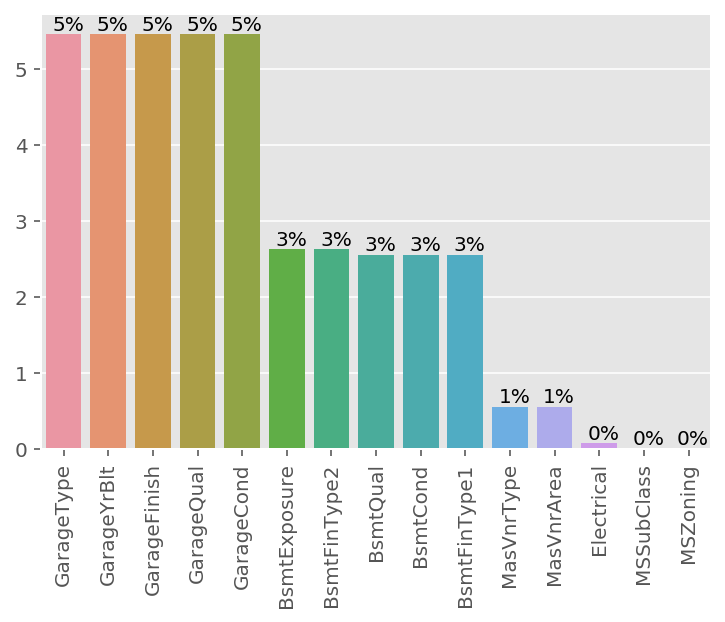

In [241]:
null_value_plot()

### How is the sale price distributed ?

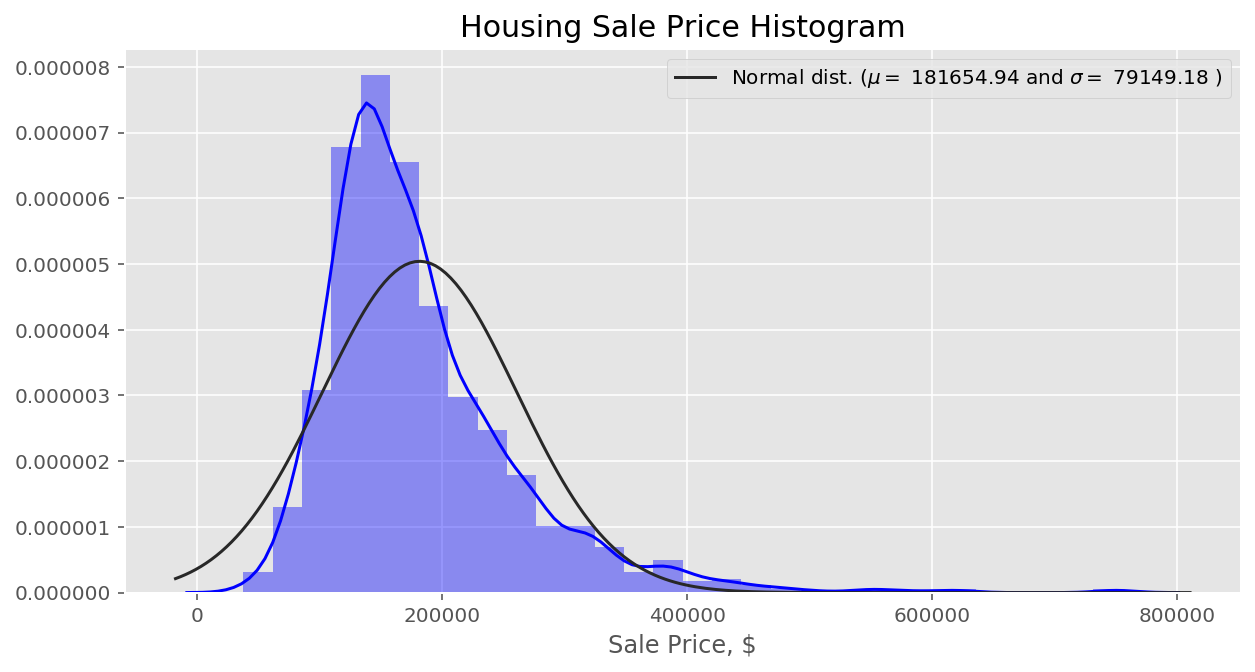

In [244]:
from scipy.stats import norm, skew #for some statistics
fig, ax = plt.subplots(figsize=(10,5))

(mu, sigma) = norm.fit(df.SalePrice)
sns.distplot(df.SalePrice, bins=30, kde=True, ax=ax, color='blue', fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.title('Housing Sale Price Histogram', fontsize=15)
plt.xlabel('Sale Price, $', fontsize=12);

- The right-skew to the SalePrice is obvious in the histogram, showing that SalePrice has a long right tail

### What is the size of the properties ?

- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area

### Creating variables on property area/size

In [248]:
# One of the chief factors affecting house prices in the size of the property.
# Here we examine the basement square footage variables. 
df[['BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'BsmtUnfSF']].head()

BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  BsmtUnfSF
0         706           0          856        150
1         978           0         1262        284
2         486           0          920        434
3         216           0          756        540
4         655           0         1145        490

- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- GrLivArea: Above grade (ground) living area square feet

In [249]:
# Here we examine the above ground square footage variables. The first column is obviously the sum of the other two.
df[['GrLivArea', '1stFlrSF', '2ndFlrSF']].head()

GrLivArea  1stFlrSF  2ndFlrSF
0       1710       856       854
1       1262      1262         0
2       1786       920       866
3       1717       961       756
4       2198      1145      1053

In [250]:
df.GrLivArea.describe()

count    1450.000000
mean     1517.698621
std       525.154207
min       334.000000
25%      1131.250000
50%      1466.000000
75%      1779.000000
max      5642.000000
Name: GrLivArea, dtype: float64

In [251]:
# Create a total "finished" basement square footage variable
df['BaseLivArea'] = df.TotalBsmtSF - df.BsmtUnfSF

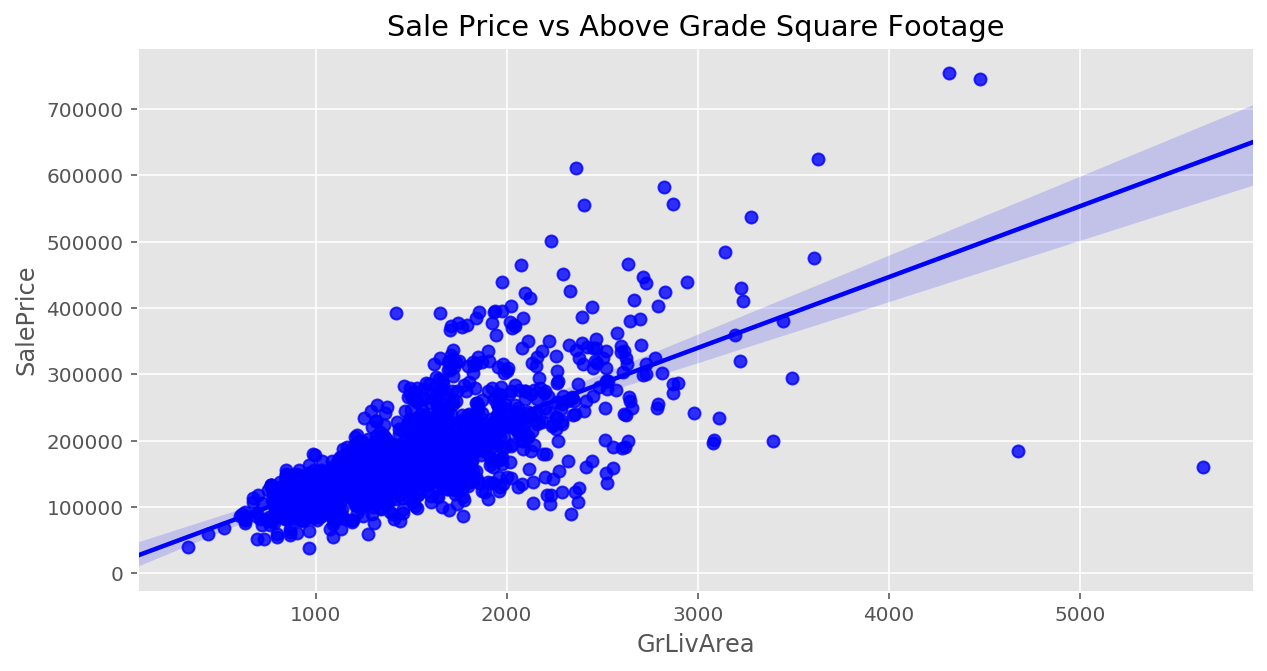

In [252]:
fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="GrLivArea", y="SalePrice", data=df, ax=ax, color='blue') 
ax.set_title('Sale Price vs Above Grade Square Footage');

- Clear positive relationship between 'LivingArea' and 'SalePrice' variables, which is what one would expect.
- The larger the house, the higher its price

In [253]:
linreg = LinearRegression()

X_GLA = df[['GrLivArea']]
y_SalePrice = df.SalePrice

linreg.fit(X_GLA, y_SalePrice)
print("R-squared of Total Square Footage on Sale Price:", linreg.score(X_GLA, y_SalePrice))

R-squared of Total Square Footage on Sale Price: 0.5021961681419125


- A simple linear regression of LivingArea on the SalePrice gives an R-squared of 50% by itself!

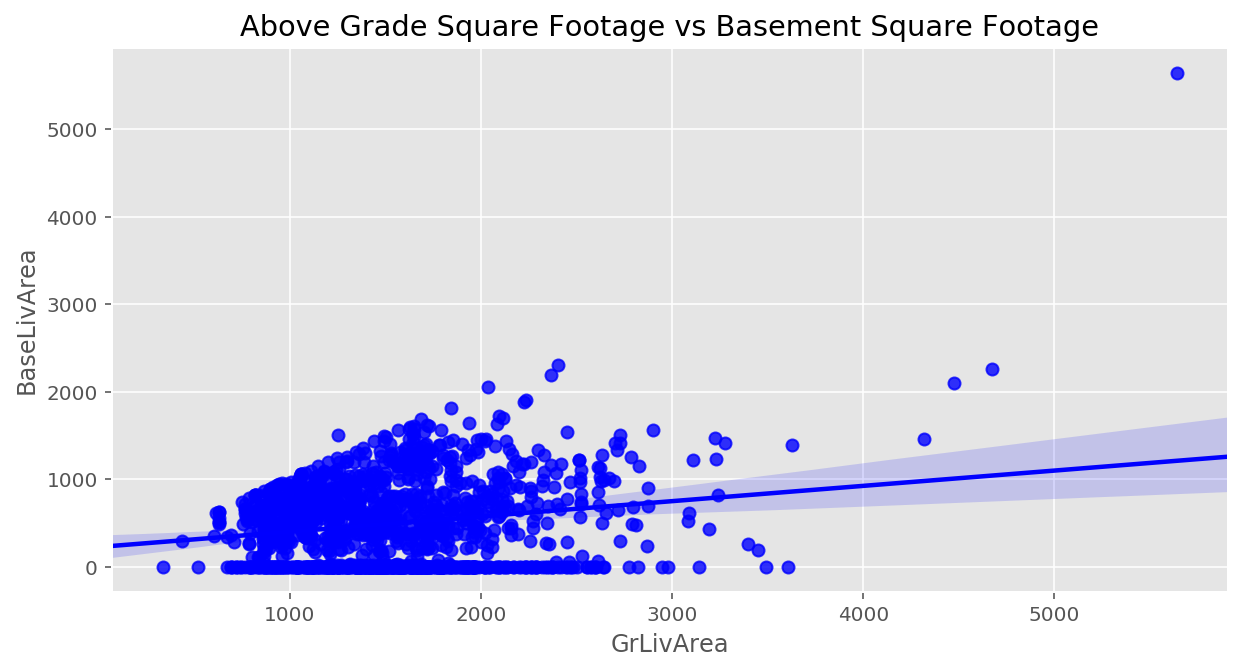

In [254]:
fig, ax = plt.subplots(figsize=(10,5))

sns.regplot(x="GrLivArea", y="BaseLivArea", data=df, ax=ax, color='blue') 
ax.set_title('Above Grade Square Footage vs Basement Square Footage');

- There also appears to be a positive relationship between 'GrLivArea' and 'BaseLivArea', 
- There seems to be greater variation in 'BaseLivArea' as 'GrLivArea' increases

In [255]:
df[['SalePrice', 'GrLivArea', 'BaseLivArea']].describe()

SalePrice    GrLivArea  BaseLivArea
count    1450.000000  1450.000000  1450.000000
mean   181654.942069  1517.698621   492.033103
std     79176.485241   525.154207   476.317669
min     37900.000000   334.000000     0.000000
25%    130000.000000  1131.250000     0.000000
50%    163945.000000  1466.000000   468.000000
75%    214000.000000  1779.000000   794.750000
max    755000.000000  5642.000000  5644.000000

### Searching for outliers

In [256]:
# There are 22 instances of 'SalePrice' being 3 std above the mean
df.SalePrice[(df.SalePrice > 181654.9 + 3*79176.5)].count()

22

In [257]:
# But there are zero cases of the opposite
df.SalePrice[(df.SalePrice < 181654.9 - 2.5*79176.5)].count()

0

In [258]:
# There are 16 instances of 'GrLivArea' being 3 std above the mean, but zero of the opposite
df.GrLivArea[(df.GrLivArea > 1517.7 + 3*525.2)].count()

16

In [259]:
# There are 6 instances of 'GrLivArea' being 3 std above the mean, but obviously zero of the opposite
df.BaseLivArea[(df.BaseLivArea > 492 + 3*476.3)].count()

6

In [260]:
df.shape

(1450, 76)

### Remove outliers in sale price

In [261]:
df_exout = df[(df.SalePrice < 181654.9 + 3*79176.5)]

In [262]:
df_exout = df_exout[(df_exout.GrLivArea < 1517.7 + 3*525.2)]

In [263]:
df_exout = df_exout[(df_exout.BaseLivArea < 492 + 3*476.3)]

In [264]:
# All in all, 32 outliers are deleted
df_exout.shape 

(1418, 76)

It's no brainer that the larger the house, the higher the same price. Real estate professionals tend to speak about a property's value in per unit terms, in this case it would be the price per square foot. So I construct a price per square foot measure using 'GrLivArea' as the denominator.

In [265]:
df_exout['PriceSF'] = df_exout.SalePrice / df_exout.GrLivArea

### What is the sale condition ??
- Normal	: Normal Sale
- Abnorml	: Abnormal Sale -  trade, foreclosure, short sale
- AdjLand	: Adjoining Land Purchase
- Alloca	: Allocation - two linked properties with separate deeds, typically condo with a garage unit	
- Family	: Sale between family members
- Partial	: Home was not completed when last assessed (associated with New Homes)

### Searching for non-commercial transactions

In [266]:
print(df_exout.SalePrice.mean())
print(df_exout.PriceSF.mean())

175739.98095909733
120.1945468907537


In [267]:
df_exout.groupby('SaleCondition').SalePrice.count()

SaleCondition
Abnorml      93
AdjLand       4
Alloca       10
Family       20
Normal     1181
Partial     110
Name: SalePrice, dtype: int64

In [268]:
# print(df_exout.SalePrice[(df_exout.SaleCondition == 'Abnorml') | (df_exout.SaleCondition == 'Family')].count())
print(df_exout.SalePrice[(df_exout.SaleCondition == 'Abnorml') | (df_exout.SaleCondition == 'Family')].mean())
print(df_exout.PriceSF[(df_exout.SaleCondition == 'Abnorml') | (df_exout.SaleCondition == 'Family')].mean())

144113.29203539822
105.28059672751708


- 113 of these "abnormal" sale transactions are listed as "abnormal" or to family members, 
- Their mean SalePrice __(144113.2)__ is well below the overall mean SalePrice __(175739.9)__
- Even the mean 'PriceSF' __(105.2)__ of these "abnormal" sales is well below the overall mean __(120.19)__

I chose to exclude these 113 "abnormal" sale transactions from the analysis. The reason is that if these transactions are not fully commercial in nature, then their inclusion in the dataset will detract from the "economic" or commercial relationship between a property's characteristic and its price. In other words, these "abnormal" transactions will introduce bias into the model estimates.

In [69]:
df_exout = df_exout[(df_exout.SaleCondition != 'Abnorml')]
df_exout = df_exout[(df_exout.SaleCondition != 'Family')]
df_exout.shape

(1305, 77)

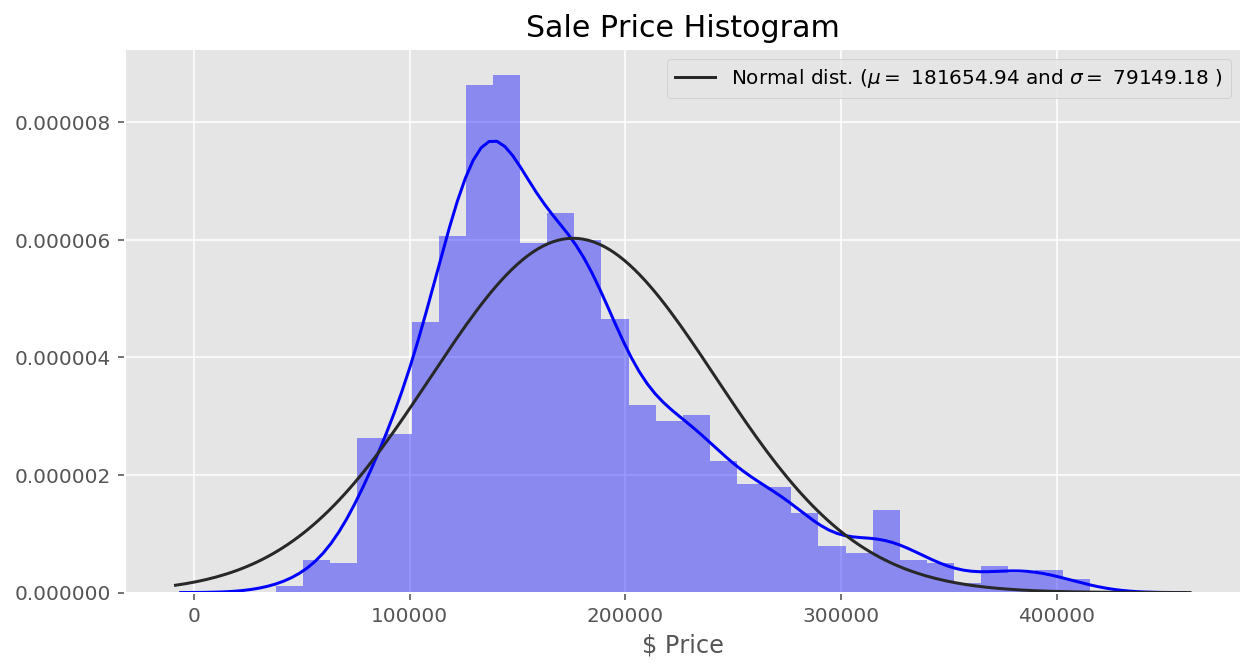

In [269]:
fig, ax = plt.subplots(figsize=(10,5))
# sns.distplot(df_exout.SalePrice, bins=30, kde=True, ax=ax, color='blue')

(mu, sigma) = norm.fit(df.SalePrice)
sns.distplot(df_exout.SalePrice, bins=30, kde=True, ax=ax, color='blue', fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

plt.title('Sale Price Histogram', fontsize=15)
plt.xlabel('$ Price', fontsize=12);

- Despite all the measures above, 'SalePrice' still very much skewed to the right

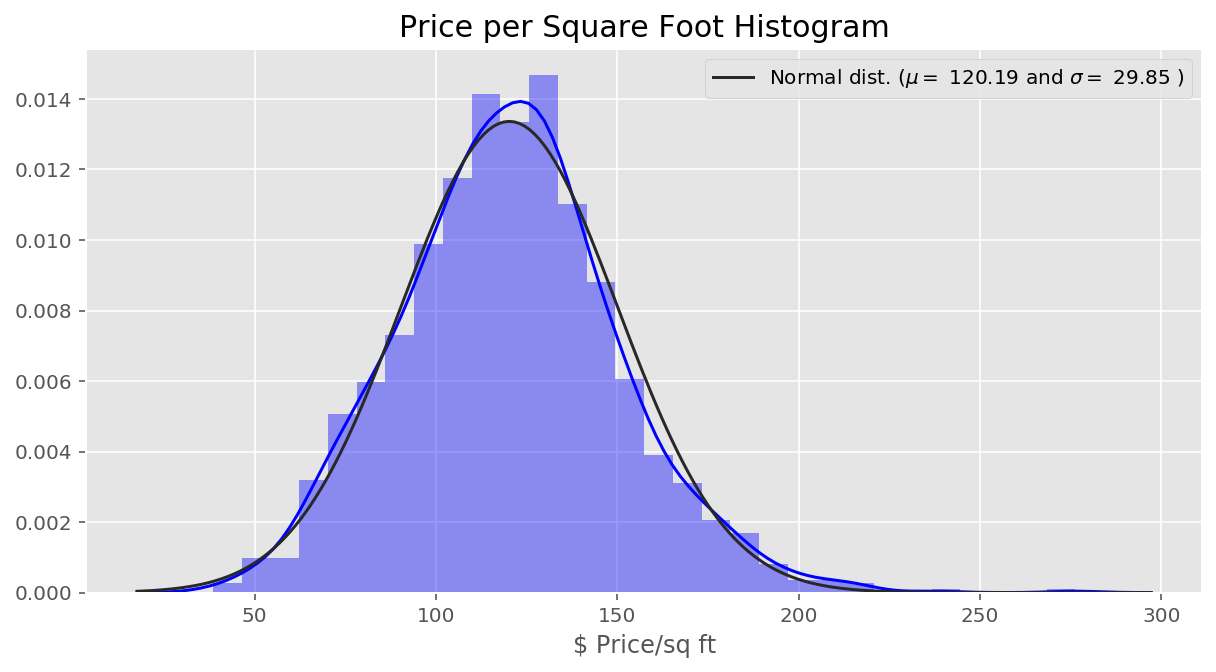

In [272]:
fig, ax = plt.subplots(figsize=(10,5))
# sns.distplot(df_exout.PriceSF, bins=30, kde=True, ax=ax, color='blue')

(mu, sigma) = norm.fit(df_exout.PriceSF)
sns.distplot(df_exout.PriceSF, bins=30, kde=True, ax=ax, color='blue', fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

plt.title('Price per Square Foot Histogram', fontsize=15)
plt.xlabel('$ Price/sq ft', fontsize=12);

- Much less of a right-skew to the price per square foot, but still some

### What is the age of the property ?

In [273]:
# Adding structure age variable depending if there was a major remodeling
df_exout['Age'] = df_exout.apply(lambda x: x['YrSold']-x['YearBuilt'] if (x['YearBuilt']<x['YearRemodAdd']) 
                                                           else (x['YrSold']-x['YearRemodAdd']), axis=1)

In [80]:
# len(df['YrSold'])

### Log transformation of the target variable

In [274]:
# Transform both sale price variables by taking the natural log to reduce the right-skew of the distributions
# The log transformation is also appropriate given that both variables have only non-zero positive values
df_exout['LnSalePrice'] = np.log(df_exout.SalePrice)
df_exout['LnPriceSF'] = np.log(df_exout.PriceSF)

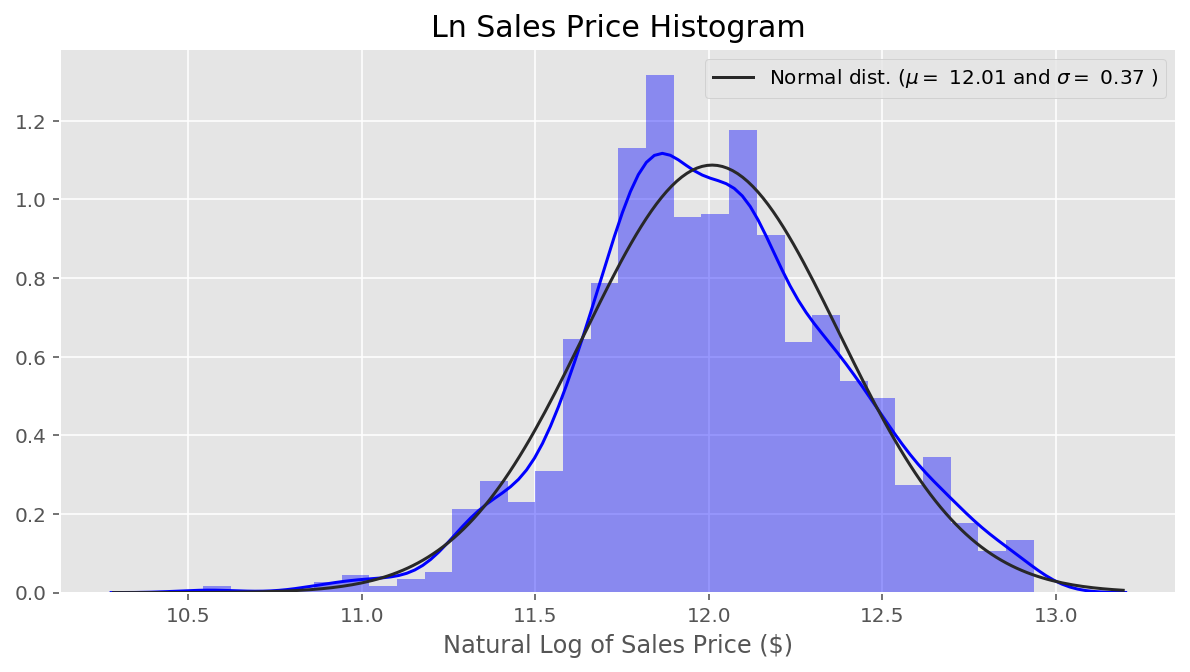

In [275]:
fig, ax = plt.subplots(figsize=(10,5))
# sns.distplot(df_exout.LnSalePrice, bins=50, kde=True, ax=ax, color='blue')

(mu, sigma) = norm.fit(df_exout.LnSalePrice)
sns.distplot(df_exout.LnSalePrice, bins=30, kde=True, ax=ax, color='blue', fit=norm)
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.title('Ln Sales Price Histogram', fontsize=15)
plt.xlabel('Natural Log of Sales Price ($)', fontsize=12);

- The histogram of the ln SalePrice is clearly more symmetric

In [76]:
# Natural log of 'SalePrice' is closer to a normal distribution
# fig, ax = plt.subplots(figsize=(10,4))
# fig = probscale.probplot(df_exout.LnSalePrice, ax=ax, plottype='prob')

# ax.set_xlim(0.1, 99.9)
# ax.set_xscale('prob')
# sns.despine(fig=fig)

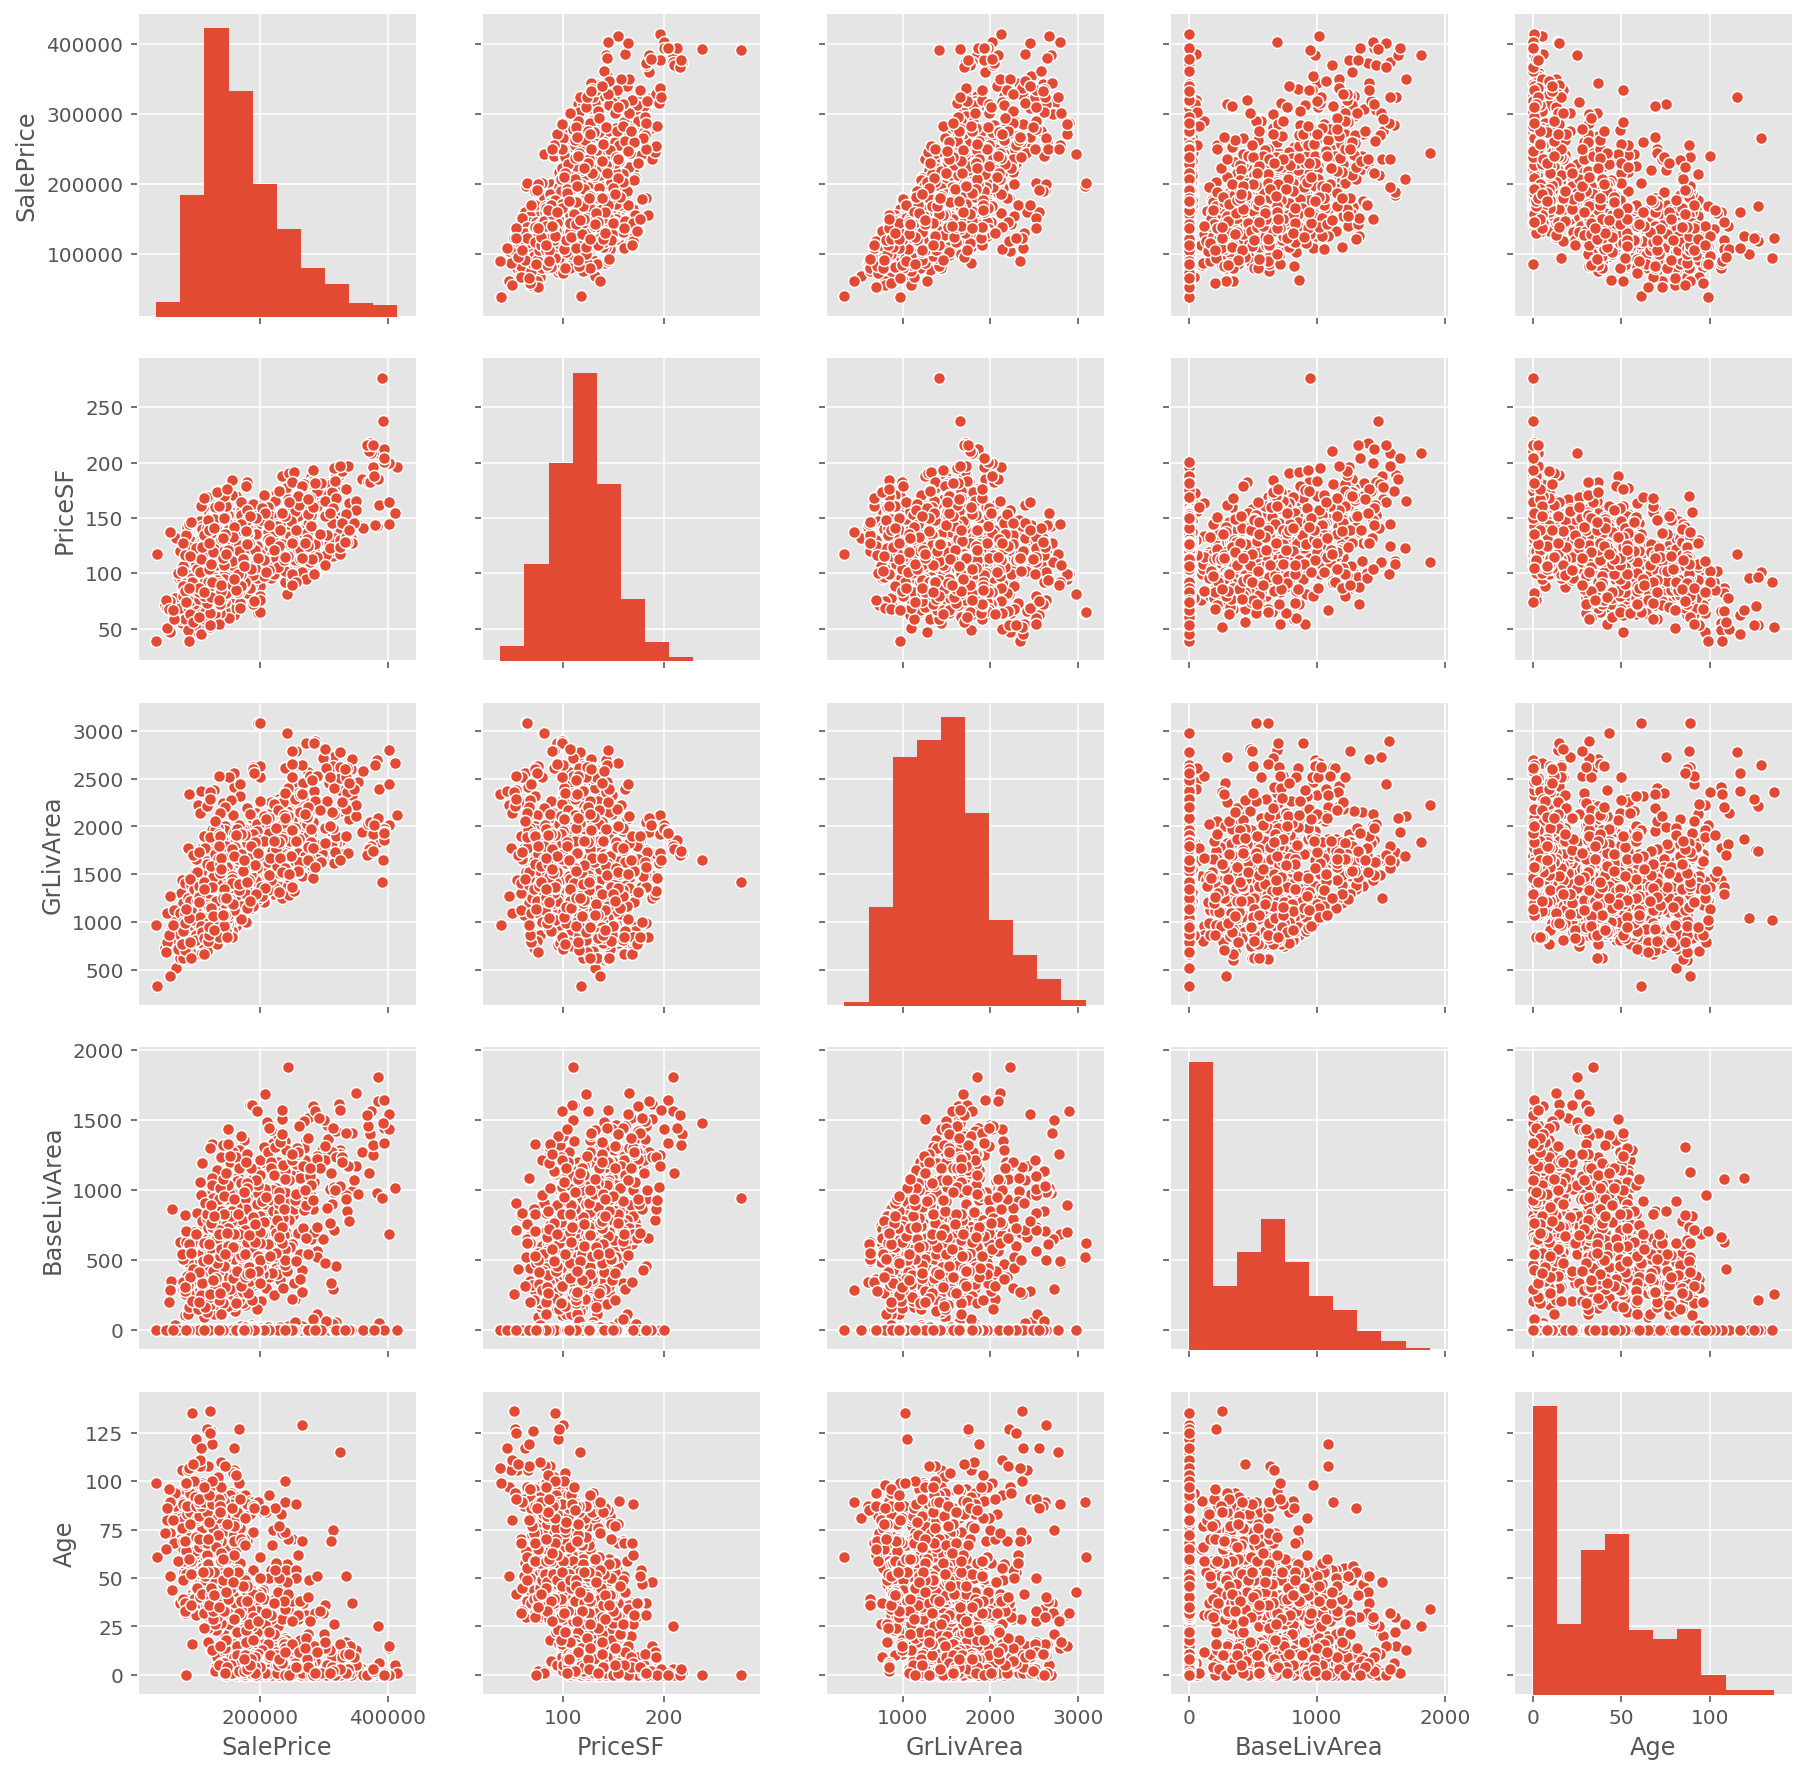

In [276]:
sns.pairplot(df_exout[['SalePrice', 'PriceSF', 'GrLivArea', 'BaseLivArea', 'Age']]);

Looking at the scatterplots of these key variables I have been working on, there are several notable observations. 
- Although 'PriceSF' doesn't seem to a have a linear relationship with 'GrLivArea', it does appear to have a positive correlation with 'BaseLivArea'. 
- This suggests that the size of the finished basement helps to raise 'PriceSF', which makes sense as it adds value to the property separate from 'GrLivArea'. 
- Another interesting observation is that 'Age' seems to have more of a linear relationship with 'PriceSF' than with 'SalePrice'.

### What is the location desirability ??
Neighborhood: Physical locations within Ames city limits
- Blmngtn	: Bloomington Heights
- Blueste	: Bluestem
- BrDale	: Briardale
- BrkSide	: Brookside
- ClearCr	: Clear Creek
- CollgCr	: College Creek
- Crawfor	: Crawford
- Edwards	: Edwards
- Gilbert	: Gilbert
- IDOTRR	: Iowa DOT and Rail Road
- MeadowV	: Meadow Village
- Mitchel	: Mitchell
- Names	: North Ames
- NoRidge	: Northridge
- NPkVill	: Northpark Villa
- NridgHt	: Northridge Heights
- NWAmes	: Northwest Ames
- OldTown	: Old Town
- SWISU	: South & West of Iowa State University
- Sawyer	: Sawyer
- SawyerW	: Sawyer West
- Somerst	: Somerset
- StoneBr	: Stone Brook
- Timber	: Timberland
- Veenker	: Veenker

### Creating a "location" variable

In [277]:
df_exout['PriceSF'].groupby(df_exout['Neighborhood']).mean().sort_values()

Neighborhood
SWISU       85.832111
OldTown     91.424821
BrDale      91.950543
IDOTRR      97.034413
Blueste     98.969369
MeadowV    101.926201
Edwards    103.218641
BrkSide    105.966809
NWAmes     111.848349
NAmes      116.270525
NPkVill    116.726891
Sawyer     117.856163
Gilbert    119.114931
SawyerW    120.055928
Crawfor    120.612973
ClearCr    124.242989
Mitchel    126.017449
NoRidge    127.784045
Blmngtn    136.566974
CollgCr    136.693389
Timber     138.565992
Somerst    140.625604
Veenker    154.980914
NridgHt    159.265273
StoneBr    162.061380
Name: PriceSF, dtype: float64

In [278]:
# Examining the 'PriceSF' for the various neighbourhoods, it is obvious that the price premium differs significantly
# across them
neigh_mean = df_exout['PriceSF'].groupby(df_exout['Neighborhood']).count().sort_values()
neigh_mean

Neighborhood
Blueste      2
NPkVill      9
Veenker     11
BrDale      16
MeadowV     17
Blmngtn     17
StoneBr     21
SWISU       24
IDOTRR      28
ClearCr     28
NoRidge     35
Timber      37
Crawfor     49
Mitchel     49
BrkSide     58
SawyerW     58
NridgHt     67
NWAmes      73
Sawyer      74
Gilbert     79
Somerst     85
Edwards     98
OldTown    110
CollgCr    149
NAmes      224
Name: PriceSF, dtype: int64

In [86]:
np.sort(df_exout.Neighborhood.unique())

array(['Blmngtn', 'Blueste', 'BrDale', 'BrkSide', 'ClearCr', 'CollgCr',
       'Crawfor', 'Edwards', 'Gilbert', 'IDOTRR', 'MeadowV', 'Mitchel',
       'NAmes', 'NPkVill', 'NWAmes', 'NoRidge', 'NridgHt', 'OldTown',
       'SWISU', 'Sawyer', 'SawyerW', 'Somerst', 'StoneBr', 'Timber',
       'Veenker'], dtype=object)

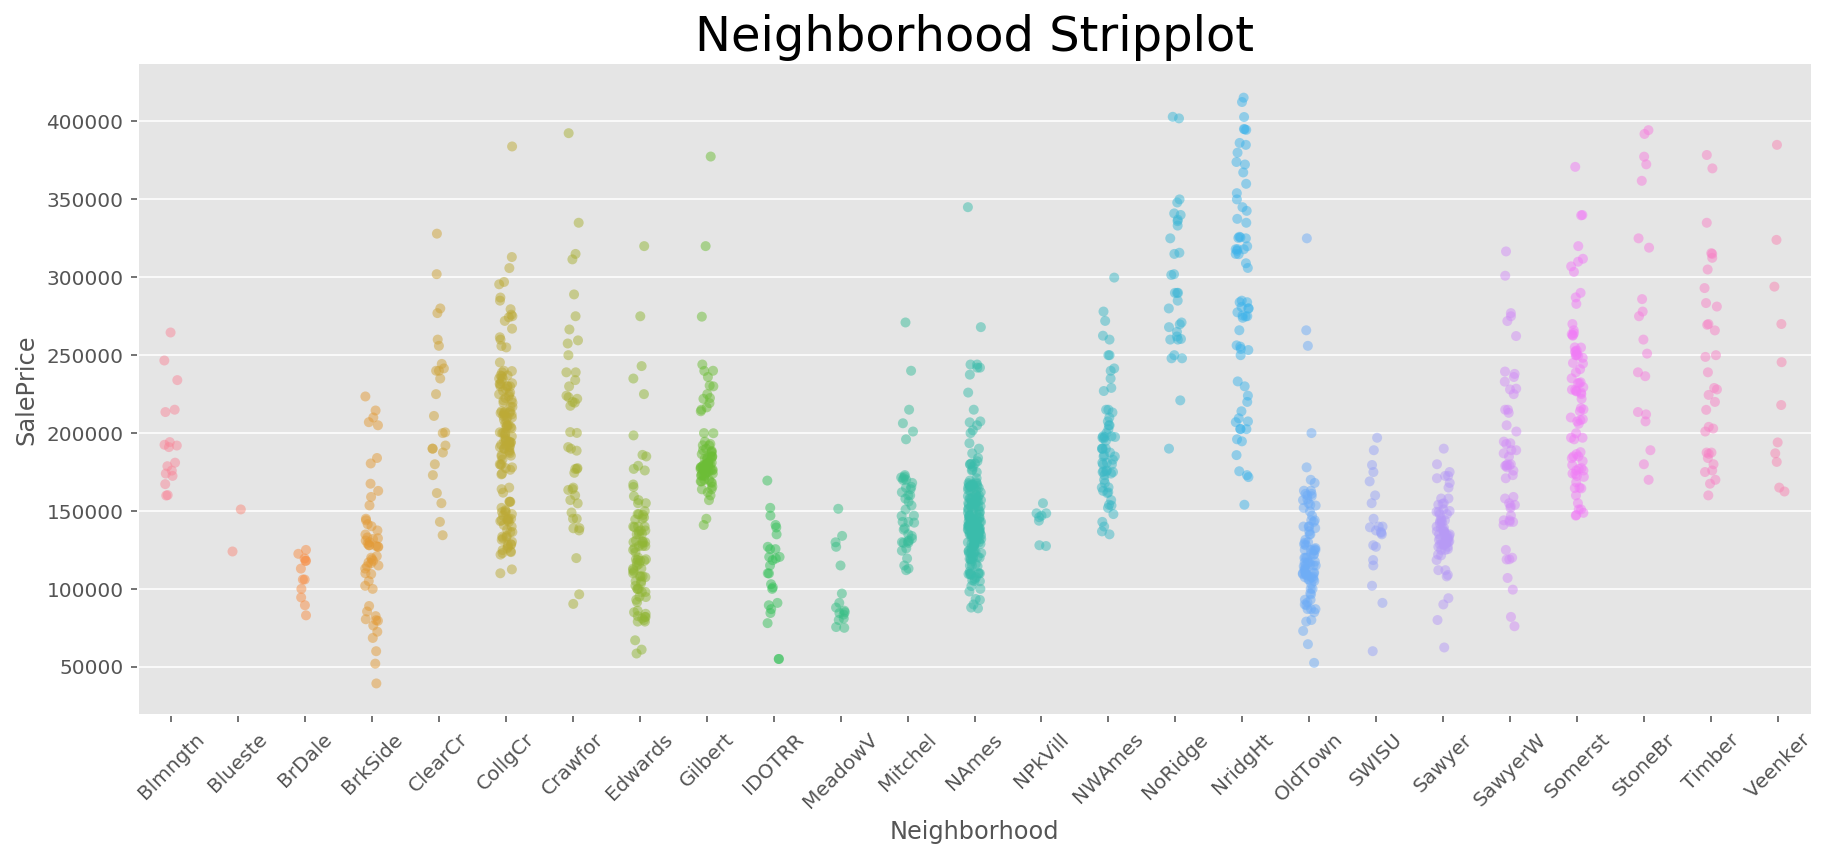

In [87]:
# Certain clusters of neighbourhoods do share similar distributions of 'SalePrice' and/or 'PriceSF'
fig, ax = plt.subplots(figsize=(15,6))
# idx = df_exout['PriceSF'].groupby(df_exout['Neighborhood']).count().sort_values().index
sns.stripplot(x = df_exout.Neighborhood, y = df_exout.SalePrice, order = np.sort(df_exout.Neighborhood.unique()),
              jitter=0.1, alpha=0.5, ax=ax)
plt.title('Neighborhood Stripplot', fontsize=24)
plt.xticks(rotation=45)
plt.show()

We know that one key determinant of house prices is "__location__" which may involve difficulty to measure attributes such as socio-economic status, local amenities, good schools and/or neighbourhood aesthetics etc. Every house buyer understands that the geographical location of a house is a highly important factor in its price. There are however 25 separate neighbourhoods listed under the 'Neighborhood' variable, and it is probably not advisable to have 25 dummy variables on top of other relevant factors in the regression. So it is best we reduce the number of neighbourhood dummies. 

The problems with having a dummy of each neighbourhood are: 
- there are only a handful of observations for some neighbourhoods, with less than 20 for six neighbourhoods, and less than 50 for the majority of them; 
- there would be significant multicollinearity between certain neighbourhoods that share similar characteristics, as expressed through the distribution of the 'SalePrice' or 'PriceSF' (observable in the stripplot above). 

It is probably advisable to try to collapse this neighbourhood factor into just several ordinal categories, and this is especially true in this case when the number of observations are simply inadequate to measure robustly each 25 neighbourhood's effects on housing prices. A collapsed 'Location' variable could offer more stable coefficient estimates, and hence reduce the model's variance across different samples. 

I was at first tempted to cluster the neighbourhoods by 'PriceSF', but that would be creating an explanatory variable that would be highly correlated to the target variable. Instead, I looked at using some proxies from the available variables to construct the desirability of a neighbourhood, namely the variables on build quality and condition. The assumption behind this methodology is that the more "desirable" a neighbourhood, the better the quality of its housing structures and their condition. 

In [279]:
# Creating a new numeric ordinal variable for 'Functional'
def functional_numeric(x):
    if 'Typ' in x:
        return 8
    elif 'Min1' in x:
        return 7
    elif 'Min2' in x:
        return 6
    elif 'Mod' in x:
        return 5
    elif 'Maj1' in x:
        return 4
    elif 'Maj2' in x:
        return 3
    elif 'Sev' in x:
        return 2    
    else:
        return 1
    
df_exout['Functional_Num'] = df_exout.Functional.map(functional_numeric)

In [280]:
# Creating a new numeric ordinal variable for external conditon or 'ExterCond'
def extercond_numeric(x):
    if 'Ex' in x:
        return 5
    elif 'Gd' in x:
        return 4
    elif 'TA' in x:
        return 3
    elif 'Fa' in x:
        return 2
    else:
        return 1
    
df_exout['ExterCond_Num'] = df_exout.ExterCond.map(extercond_numeric)

In [281]:
# Creating a new numeric ordinal variable for external quality or 'ExterQual'
def exterqual_numeric(x):
    if 'Ex' in x:
        return 5
    elif 'Gd' in x:
        return 4
    elif 'TA' in x:
        return 3
    elif 'Fa' in x:
        return 2
    else:
        return 1
    
df_exout['ExterQual_Num'] = df_exout.ExterQual.map(exterqual_numeric)

In [282]:
print(df_exout['OverallQual'].mean())
print(df_exout['OverallCond'].mean())
print(df_exout['ExterQual_Num'].mean())
print(df_exout['ExterCond_Num'].mean())
print(df_exout['Functional_Num'].mean())

6.053596614950635
5.584626234132581
3.380818053596615
3.0839210155148096
7.839210155148096


Construct the location desirability proxy from the 5 individual mean-standardised variables listed above. The construction methodology implies a stronger weighting to the external quality/condition of the building.

In [283]:
df_exout['Location'] = ((df_exout['OverallQual']/df_exout['OverallQual'].mean()) 
            + (df_exout['OverallCond']/df_exout['OverallCond'].mean())
            + (df_exout['ExterQual_Num']/df_exout['ExterQual_Num'].mean())
            + (df_exout['ExterCond_Num']/df_exout['ExterCond_Num'].mean()) 
            + (df_exout['Functional_Num']/df_exout['Functional_Num'].mean()))

In [284]:
df_exout.Location.describe()

count    1418.000000
mean        5.000000
std         0.443850
min         2.094607
25%         4.767119
50%         4.970050
75%         5.270445
max         7.384233
Name: Location, dtype: float64

In [285]:
# The average 'Location' scores of the respective neighbourhoods
df_exout['Location'].groupby([df_exout.Neighborhood]).mean().sort_values()

Neighborhood
MeadowV    4.617406
Edwards    4.678513
IDOTRR     4.720913
Sawyer     4.768126
BrDale     4.777891
BrkSide    4.783136
SWISU      4.790739
Mitchel    4.826358
NAmes      4.833226
NPkVill    4.866599
ClearCr    4.895142
OldTown    4.947857
SawyerW    5.004965
Gilbert    5.054381
NWAmes     5.078236
Blueste    5.108313
CollgCr    5.148579
Timber     5.206324
Crawfor    5.225339
Blmngtn    5.257248
Somerst    5.281873
NoRidge    5.400828
StoneBr    5.416739
Veenker    5.418709
NridgHt    5.490011
Name: Location, dtype: float64

In [286]:
df_exout['SalePrice'].groupby([df_exout.Neighborhood]).count().sort_values()

Neighborhood
Blueste      2
NPkVill      9
Veenker     11
BrDale      16
MeadowV     17
Blmngtn     17
StoneBr     21
SWISU       24
IDOTRR      28
ClearCr     28
NoRidge     35
Timber      37
Crawfor     49
Mitchel     49
BrkSide     58
SawyerW     58
NridgHt     67
NWAmes      73
Sawyer      74
Gilbert     79
Somerst     85
Edwards     98
OldTown    110
CollgCr    149
NAmes      224
Name: SalePrice, dtype: int64

From the analysis above, there is a possible way to construct an ordinal measurement of locational desirability by using the percentiles of the distribution of the new 'Location' variable. I decided that with no additional information or insight, I should just allocate 4 ordinal values for 'Location': 1 (low), 2 (mid-low), 3 (mid-high) and 4 (high).

First, I sorted the 'Neighborhood' variable by the mean 'Location' values, then slice it in half near the median (5.05), so that there are 13 'Neighborhood' instances below and 12 above the median. This resulted in all neighbourhoods above "Gilbert" (as listed above), which had a mean 'Location' reading of 5.04, to fall into the 1 and 2 readings of 'Location'. I then arbitrary assigned 'Location' = 1 for the 6 lowest neighbourhoods by their mean 'Location' values, and 'Location' = 2 for the remaining 7.

As for the twelve neighbourhoods in the upper half of the 'Location' values, I divided them exactly in half, with the lower 6 in terms of their mean 'Location' values assigned 'Location' = 3, and the remainder assigned 'Location' = 4. 

In this way, I have created an ordinal 'Location' desirability score of 1 to 4. The number of observations in the data also do not appear to be too unbalanced across these four ranks, though 56.3% of the observations are in the first two 'Location' categories. That said, there was a right skew to the 'SalePrice' as discussed above, so there will likely be a smaller number of expensive neighborhoods.

In [287]:
def add_location(x):
    if 'MeadowV' in x or 'Edwards' in x or 'Sawyer' in x or 'IDOTRR' in x or 'Brkside' in x or 'BrDale' in x:
        return 1
    elif 'Swisu' in x or 'Mitchel' in x or 'NAmes' in x or 'NPkVill' in x or 'ClearCr' in x or 'OldTown' in x or 'SawyerW' in x:
        return 2
    elif 'Gilbert' in x or 'NWAmes' in x or 'Blueste' in x or 'CollgCr' in x or 'Timber' in x or 'Crawfor' in x:
        return 3
    else:
        return 4

In [288]:
df_exout['Location'] = df_exout.Neighborhood.map(add_location)

In [293]:
df_exout['Location'].value_counts()

2    420
3    389
4    318
1    291
Name: Location, dtype: int64

In [294]:
print(df_exout['SalePrice'].groupby(df_exout.Location).mean())
print(df_exout['PriceSF'].groupby(df_exout.Location).mean())

Location
1    136520.975945
2    145379.690476
3    199005.966581
4    223266.974843
Name: SalePrice, dtype: float64
Location
1    109.006682
2    111.441735
3    126.419641
4    134.377844
Name: PriceSF, dtype: float64


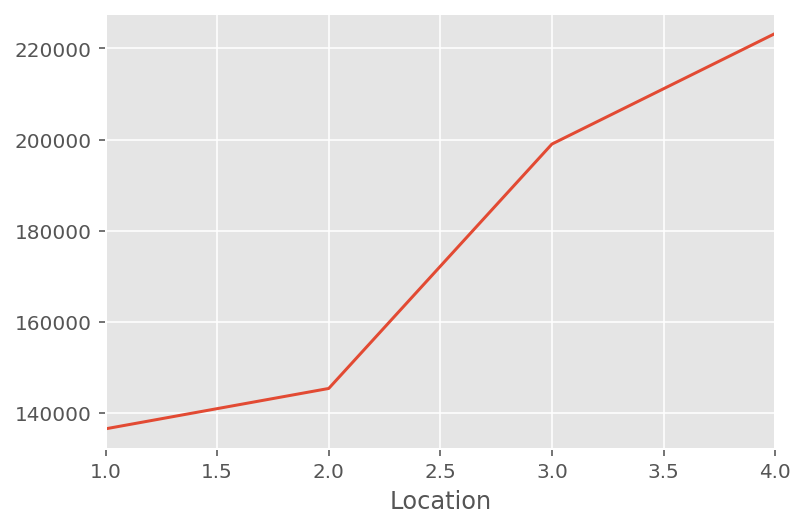

In [291]:
df_exout['SalePrice'].groupby(df_exout.Location).mean().plot()

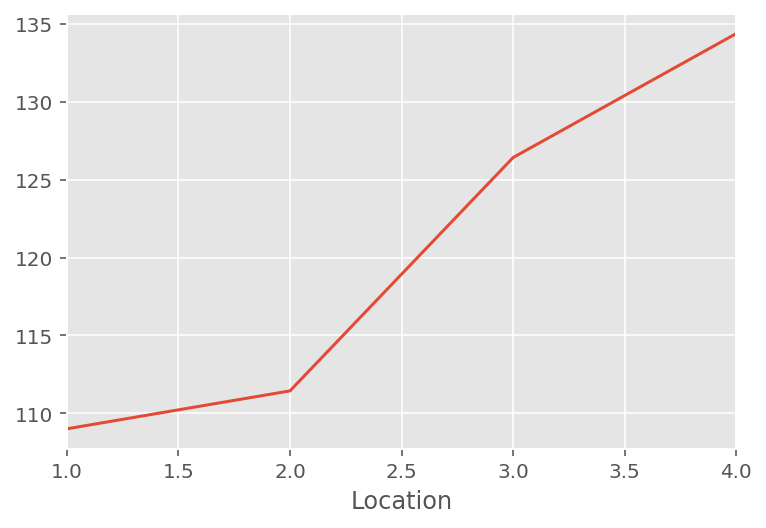

In [292]:
df_exout['PriceSF'].groupby(df_exout.Location).mean().plot()

- Positive correlation between 'SalePrice' and 'PriceSF' with 'Location'

In [295]:
# Total mean house size also rises with 'Location', though the median tops out at Location 3
print(df_exout['GrLivArea'].groupby(df_exout.Location).mean())
print(df_exout['GrLivArea'].groupby(df_exout.Location).median())

Location
1    1283.247423
2    1367.345238
3    1611.812339
4    1658.852201
Name: GrLivArea, dtype: float64
Location
1    1200.0
2    1262.5
3    1620.0
4    1589.0
Name: GrLivArea, dtype: float64


So it does appear that the 'Location' score does tend to be positively correlated with house prices, and somewhat with property sizes too.

# Other feature engineering on sale year, seasonality, zoning, and proximinity to railways & artery roads

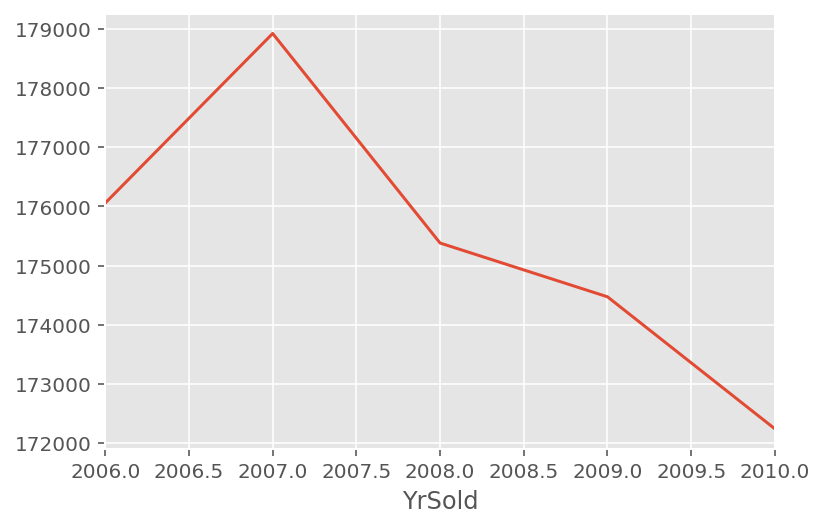

In [296]:
df_exout.SalePrice.groupby(df_exout.YrSold).mean().plot()

In [297]:
# Looking at the 'SalePrice' and 'PriceSF' grouped by 'YrSold', there is an obvious impact of the financial crisis 
# that hit in 2007-2008. The mean 'SoldPrice' and 'PriceSF' in 2009 and 2010 are still lower than those in 2007.
print(df_exout.SalePrice.groupby(df_exout.YrSold).mean())
print(df_exout.PriceSF.groupby(df_exout.YrSold).mean())

YrSold
2006    176058.236842
2007    178920.554859
2008    175381.932660
2009    174474.033333
2010    172244.446429
Name: SalePrice, dtype: float64
YrSold
2006    118.985293
2007    121.365402
2008    121.878803
2009    118.424688
2010    120.658475
Name: PriceSF, dtype: float64


In [298]:
# House prices were in an uptrend in 2006-2007, but fell in 2008 and have been moribund since. 
df_exout.PriceSF.groupby(df_exout.YrSold).mean().pct_change()

YrSold
2006         NaN
2007    0.020003
2008    0.004230
2009   -0.028341
2010    0.018863
Name: PriceSF, dtype: float64

In [299]:
df_exout.YrSold.unique()

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [300]:
# Thus, it might be useful to incorporate year dummies in the regression model
df_exout = pd.get_dummies(df_exout, columns=['YrSold'])

### Coming back to the zoning feature

In [301]:
# Clear price differentials according to the discrete housing zones
df_exout.SalePrice.groupby(df_exout.MSZoning).mean()

MSZoning
FV    214014.061538
RH    126995.600000
RL    184150.067736
RM    123921.615741
Name: SalePrice, dtype: float64

In [302]:
# Creating a new ordinal variable of zoning, corresponding to the mean values from 'MSZoning'
# The FV observations in 'MSZoning' are a retirement community development, named "Floating Village", which appears to cater to
# wealthy retirees
def add_zoning(x):
    if 'RH' in x:
        return 1
    elif 'RM' in x:
        return 2
    elif 'RL' in x:
        return 3
    else:
        return 4

In [303]:
df_exout['Zoning'] = df_exout.MSZoning.map(add_zoning)

In [304]:
# No linear relationship between 'GrLivArea' or 'BaseLivArea' and 'Zoning'
print(df_exout.GrLivArea.groupby(df_exout.Zoning).mean())
df_exout.BaseLivArea.groupby(df_exout.Zoning).mean()

Zoning
1    1384.466667
2    1301.439815
3    1513.366310
4    1574.538462
Name: GrLivArea, dtype: float64


Zoning
1    325.800000
2    271.097222
3    523.956328
4    327.892308
Name: BaseLivArea, dtype: float64

In [305]:
# There appears to be a sizeable jump in prices in the low density and FV categories
print(df_exout.SalePrice.groupby(df_exout.Zoning).mean())
df_exout.PriceSF.groupby(df_exout.Zoning).mean()

Zoning
1    126995.600000
2    123921.615741
3    184150.067736
4    214014.061538
Name: SalePrice, dtype: float64


Zoning
1     98.189749
2    100.598184
3    123.329410
4    136.280240
Name: PriceSF, dtype: float64

In [306]:
# There is a relationship between 'Location' and 'Zoning' with Locations 3 and 4 
# primarily in zones 3 and 4 (low density and the retirement village)
df_exout.Location.groupby(df_exout.Zoning).value_counts()

Zoning  Location
1       1             7
        4             4
        2             2
        3             2
2       2            98
        1            71
        4            32
        3            15
3       3           372
        2           320
        4           217
        1           213
4       4            65
Name: Location, dtype: int64

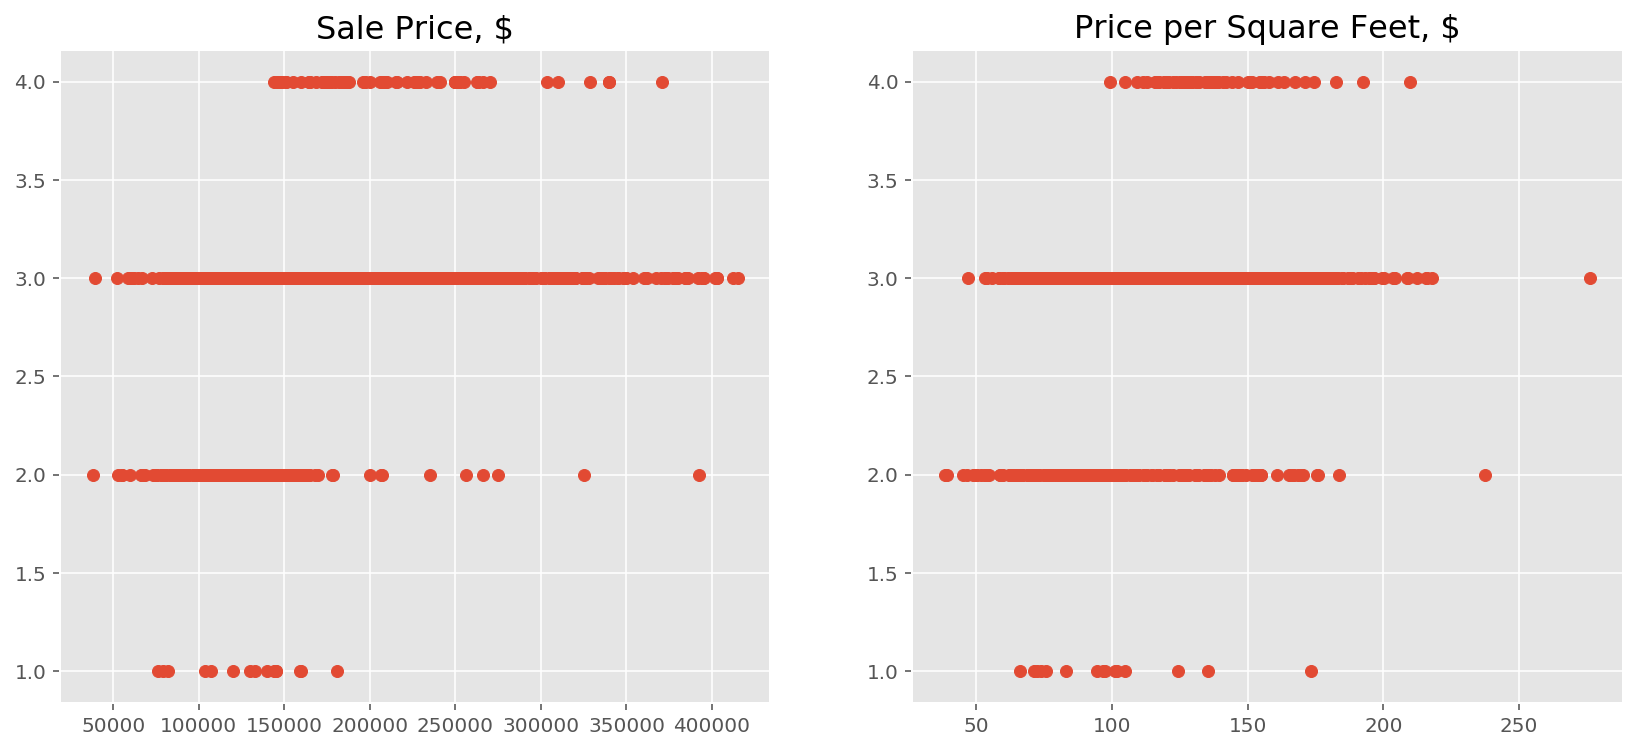

In [307]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 6))

ax[0].scatter(df_exout.SalePrice, df_exout.Zoning)
ax[0].set_title('Sale Price, $', fontsize=16)
ax[1].scatter(df_exout.PriceSF, df_exout.Zoning)
ax[1].set_title('Price per Square Feet, $', fontsize=16)
#fig.suptitle('Sale Prices by Zone', fontsize=24)
plt.show()

- There is a increase inprices as we go from Zone 1 to 3, especially in mean 'Price per SF'

In [308]:
# Analysis above suggests that it might be more useful to model 'Zoning' using dummies instead of an ordinal variable
df_exout['Zone_ordinal'] = df_exout['Zoning']
df_exout = pd.get_dummies(df_exout, columns=['Zoning'])

In [309]:
# The overwhelming majority of observations fall into the 'Norm'-'Norm' category in terms of
# Condition1 and Condition2, which is a measure of environmental condition
df_exout.Condition1.groupby(df_exout.Condition2).value_counts()

Condition2  Condition1
Artery      Artery           2
Feedr       RRAn             4
            RRNn             1
Norm        Norm          1226
            Feedr           73
            Artery          43
            RRAn            21
            PosN            17
            RRAe            11
            PosA             8
            RRNn             4
            RRNe             2
PosA        Artery           1
PosN        PosN             1
RRAe        Feedr            1
RRAn        Feedr            1
RRNn        Feedr            2
Name: Condition1, dtype: int64

In [310]:
# Previous studies have shown a negative relationship between housing prices and being adjacent 
# or near to a major roadway or a railway line.
# Creating variables to capture this negative enviromental impact
def add_roadrail1(x):
    if 'Artery' in x:
        return 1
    elif 'RRAn' in x:
        return 1
    elif 'RRNn' in x:
        return 1
    elif 'RRAe' in x:
        return 1
    elif 'RRNe' in x:
        return 1
    else:
        return 0

df_exout['RoadRail1'] = df_exout.Condition1.map(add_roadrail1)

In [311]:
def add_roadrail2(x):
    if 'Artery' in x:
        return 1
    elif 'RRAn' in x:
        return 1
    elif 'RRNn' in x:
        return 1
    elif 'RRAe' in x:
        return 1
    elif 'RRNe' in x:
        return 1
    else:
        return 0

df_exout['RoadRail2'] = df_exout.Condition2.map(add_roadrail2)

In [312]:
df_exout.RoadRail1.groupby(df_exout.RoadRail2).value_counts()

RoadRail2  RoadRail1
0          0            1325
           1              87
1          0               4
           1               2
Name: RoadRail1, dtype: int64

In [313]:
# Combining the 2 proximity to artery roads and railroad dummy variables into one
df_exout['RoadRail'] = df_exout.apply(lambda x: 1 if (x['RoadRail1'] == 1 | x['RoadRail2'] == 1) 
                                      else 0, axis=1)
df_exout.drop(['RoadRail1', 'RoadRail2'], axis=1, inplace=True)

In [314]:
# The RoadRail variable seems to have an impact on mean 'SalePrice' and 'PriceSF' in every 'Location'
print(df_exout.SalePrice.groupby([df_exout.RoadRail, df_exout.Location]).mean())
df_exout.PriceSF.groupby([df_exout.RoadRail, df_exout.Location]).mean()

RoadRail  Location
0         1           137219.717472
          2           146766.151832
          3           199660.804813
          4           225124.230263
1         1           127977.272727
          2           131442.105263
          3           182678.666667
          4           182938.000000
Name: SalePrice, dtype: float64


RoadRail  Location
0         1           109.878484
          2           113.358592
          3           127.107839
          4           134.708215
1         1            98.346913
          2            92.172275
          3           109.260561
          4           127.204083
Name: PriceSF, dtype: float64

In [315]:
df_exout.PriceSF.groupby([df_exout.RoadRail]).mean()

RoadRail
0    121.407015
1    102.089259
Name: PriceSF, dtype: float64

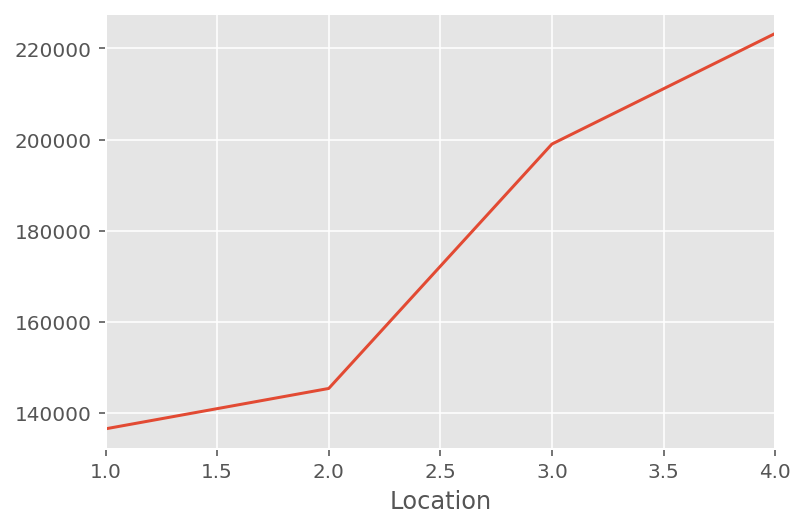

In [316]:
df_exout.SalePrice.groupby([df_exout.Location]).mean().plot()

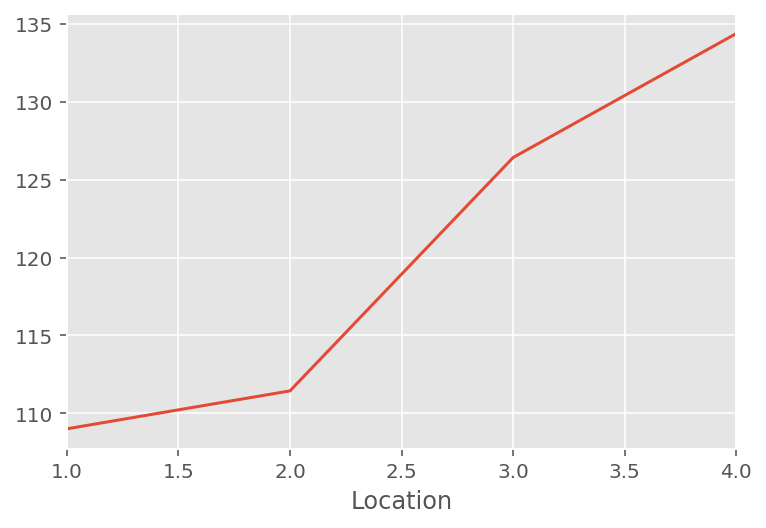

In [317]:
df_exout.PriceSF.groupby([df_exout.Location]).mean().plot()

### More (minor) feature engineering

In [318]:
# Transforming the 'CentralAir' discrete variable to numeric
df_exout['CentralAirNum'] = df_exout.apply(lambda x: 1 if (x['CentralAir'] == 'Y') 
                                                           else 0, axis=1)
#df_exout[['CentralAir', 'CentralAirNum']]
df_exout['CentralAirNum'].value_counts()

1    1329
0      89
Name: CentralAirNum, dtype: int64

In [319]:
# Creating variables on positive neighbourhood amenities
def add_amenities1(x):
    if 'PosN' in x:
        return 1
    elif 'PosA' in x:
        return 1
    else:
        return 0

df_exout['Amenities1'] = df_exout.Condition1.map(add_amenities1)

In [320]:
def add_amenities2(x):
    if 'PosN' in x:
        return 1
    elif 'PosA' in x:
        return 1
    else:
        return 0

df_exout['Amenities2'] = df_exout.Condition2.map(add_amenities2)

In [321]:
# Combining the amenities dummy variables into one
df_exout['Amenities'] = df_exout.apply(lambda x: 1 if (x['Amenities1'] == 1 | x['Amenities2'] == 1) 
                                      else 0, axis=1)
df_exout.drop(['Amenities1', 'Amenities2'], axis=1, inplace=True)

In [322]:
# 'Amenities'=1 does seem to raise the mean 'SalePrice' but has mixed impact on 'PriceSF'
print(df_exout.SalePrice.groupby([df_exout.Amenities, df_exout.Location]).mean())
df_exout.PriceSF.groupby([df_exout.Amenities, df_exout.Location]).mean()

Amenities  Location
0          1           136422.772414
           2           144654.428224
           3           197529.522667
           4           222782.905063
1          1           165000.000000
           2           178500.000000
           3           238553.571429
           4           299750.000000
Name: SalePrice, dtype: float64


Amenities  Location
0          1           108.971167
           2           111.705933
           3           126.709085
           4           134.325627
1          1           119.305857
           2            99.376694
           3           118.666660
           4           142.628173
Name: PriceSF, dtype: float64

In [323]:
# At this point, all the observations in the sample have full public utility service
df_exout[(df_exout.Utilities != 'AllPub')].count()

MSSubClass        1
MSZoning          1
LotFrontage       1
LotArea           1
Street            1
LotShape          1
LandContour       1
Utilities         1
LotConfig         1
LandSlope         1
Neighborhood      1
Condition1        1
Condition2        1
BldgType          1
HouseStyle        1
OverallQual       1
OverallCond       1
YearBuilt         1
YearRemodAdd      1
RoofStyle         1
RoofMatl          1
Exterior1st       1
Exterior2nd       1
MasVnrType        1
MasVnrArea        1
ExterQual         1
ExterCond         1
Foundation        1
BsmtQual          1
BsmtCond          1
                 ..
3SsnPorch         1
ScreenPorch       1
PoolArea          1
MiscVal           1
MoSold            1
SaleType          1
SaleCondition     1
SalePrice         1
BaseLivArea       1
PriceSF           1
Age               1
LnSalePrice       1
LnPriceSF         1
Functional_Num    1
ExterCond_Num     1
ExterQual_Num     1
Location          1
YrSold_2006       1
YrSold_2007       1


In [324]:
# Adding up the above ground bathrooms and assigning to a new variable
df_exout['Bathrooms'] = df_exout.FullBath + (0.5*df_exout.HalfBath)
df_exout.Bathrooms.describe()

count    1418.000000
mean        1.739069
std         0.617011
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.500000
Name: Bathrooms, dtype: float64

In [325]:
print(df_exout.SalePrice.groupby([df_exout.OverallQual]).mean())
df_exout.PriceSF.groupby([df_exout.OverallQual]).mean()

OverallQual
1      50150.000000
2      60000.000000
3      87970.833333
4     110114.594595
5     133719.131313
6     161574.287634
7     206555.503165
8     267387.421384
9     338378.805556
10    357768.500000
Name: SalePrice, dtype: float64


OverallQual
1      92.571273
2     105.993151
3      80.644629
4     104.243659
5     112.896056
6     114.645981
7     124.511960
8     144.533663
9     175.573212
10    168.946441
Name: PriceSF, dtype: float64

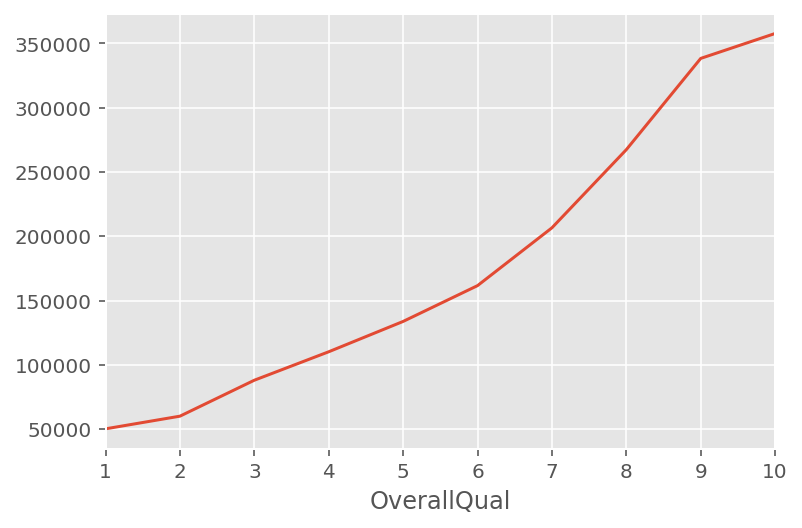

In [326]:
df_exout.SalePrice.groupby([df_exout.OverallQual]).mean().plot()

- Positive relationship between the overall quality of the housing structure and the 'SalePrice' and 'PriceSF'

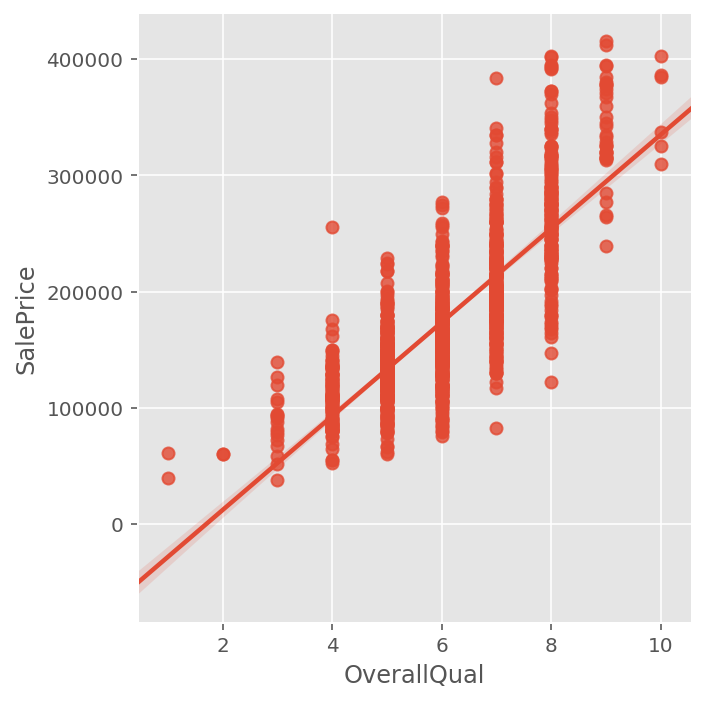

In [327]:
# sns.lmplot(y=df_exout.SalePrice, x=df_exout.OverallQual)
sns.lmplot(y='SalePrice', x='OverallQual', data=df_exout)

In [328]:
# Interestingly 'OverallQual' is not well correlated with 'OverallCond'
df_exout.OverallQual.corr(df_exout.OverallCond)

-0.10562183575493089

In [329]:
# But it is moderately correlated with the 'Location' variable as one would expect
df_exout.OverallQual.corr(df_exout.Location)

0.5163024123244022

In [330]:
# Overall Condition of the house appears to have mixed impact on prices
print(df_exout.SalePrice.groupby([df_exout.OverallCond]).mean())
df_exout.PriceSF.groupby([df_exout.OverallCond]).mean()

OverallCond
1     61000.000000
2    156233.000000
3    104705.166667
4    121520.584906
5    195456.487406
6    150977.100806
7    158212.064039
8    155651.736111
9    189531.578947
Name: SalePrice, dtype: float64


OverallCond
1     67.477876
2     95.586150
3     82.116410
4     86.070535
5    126.404310
6    113.852338
7    117.397214
8    119.637033
9    126.716306
Name: PriceSF, dtype: float64

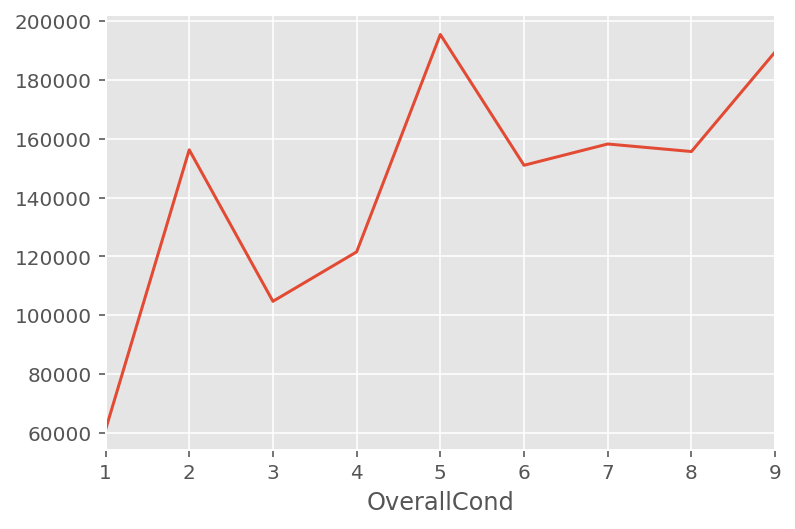

In [331]:
df_exout.SalePrice.groupby([df_exout.OverallCond]).mean().plot()

### Dummifying other potential important features

In [332]:
df_exout = pd.get_dummies(df_exout, columns=['Street'])

In [333]:
df_exout.drop(['Street_Grvl'], axis=1, inplace=True)
df_exout.rename(columns={'Street_Pave': 'Street_dum'}, inplace=True)

In [334]:
df_exout = pd.get_dummies(df_exout, columns=['KitchenQual'])

In [335]:
# Creating a dummy variable for flat roofs
df_exout['FlatRoof_dum'] = df_exout.RoofStyle.apply(lambda x: 1 if x=='Flat' else 0)

In [336]:
# Creating a dummy variable for garage
df_exout['Garage_dum'] = df_exout.GarageQual.apply(lambda x: 0 if pd.isnull(x)==True else 1)

In [337]:
# Creating a dummy variable for flat property contour
df_exout['FlatContour_dum'] = df_exout.LandContour.apply(lambda x: 1 if x=='Lvl' else 0)

In [338]:
# Creating a dummy variable for houses higher than one storey
df_exout['TwoStory_dum'] = df_exout['2ndFlrSF'].apply(lambda x: 1 if x>0 else 0)

In [339]:
df_exout.shape

(1418, 104)

In [340]:
print(list(df_exout.columns))

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'SalePrice', 

In [342]:
# # Assigning the 2006-2009 data to another dataset
# df_0609 = df_exout.loc[df_exout['YrSold_2010'] != 1]
# df_0609.shape

In [149]:
# # Assigning 2010 data to another dataset. The 2010 data will be the final holdout test set for the ultimate evaluation.
# df_2010 = df_exout.loc[df_exout['YrSold_2010'] == 1]

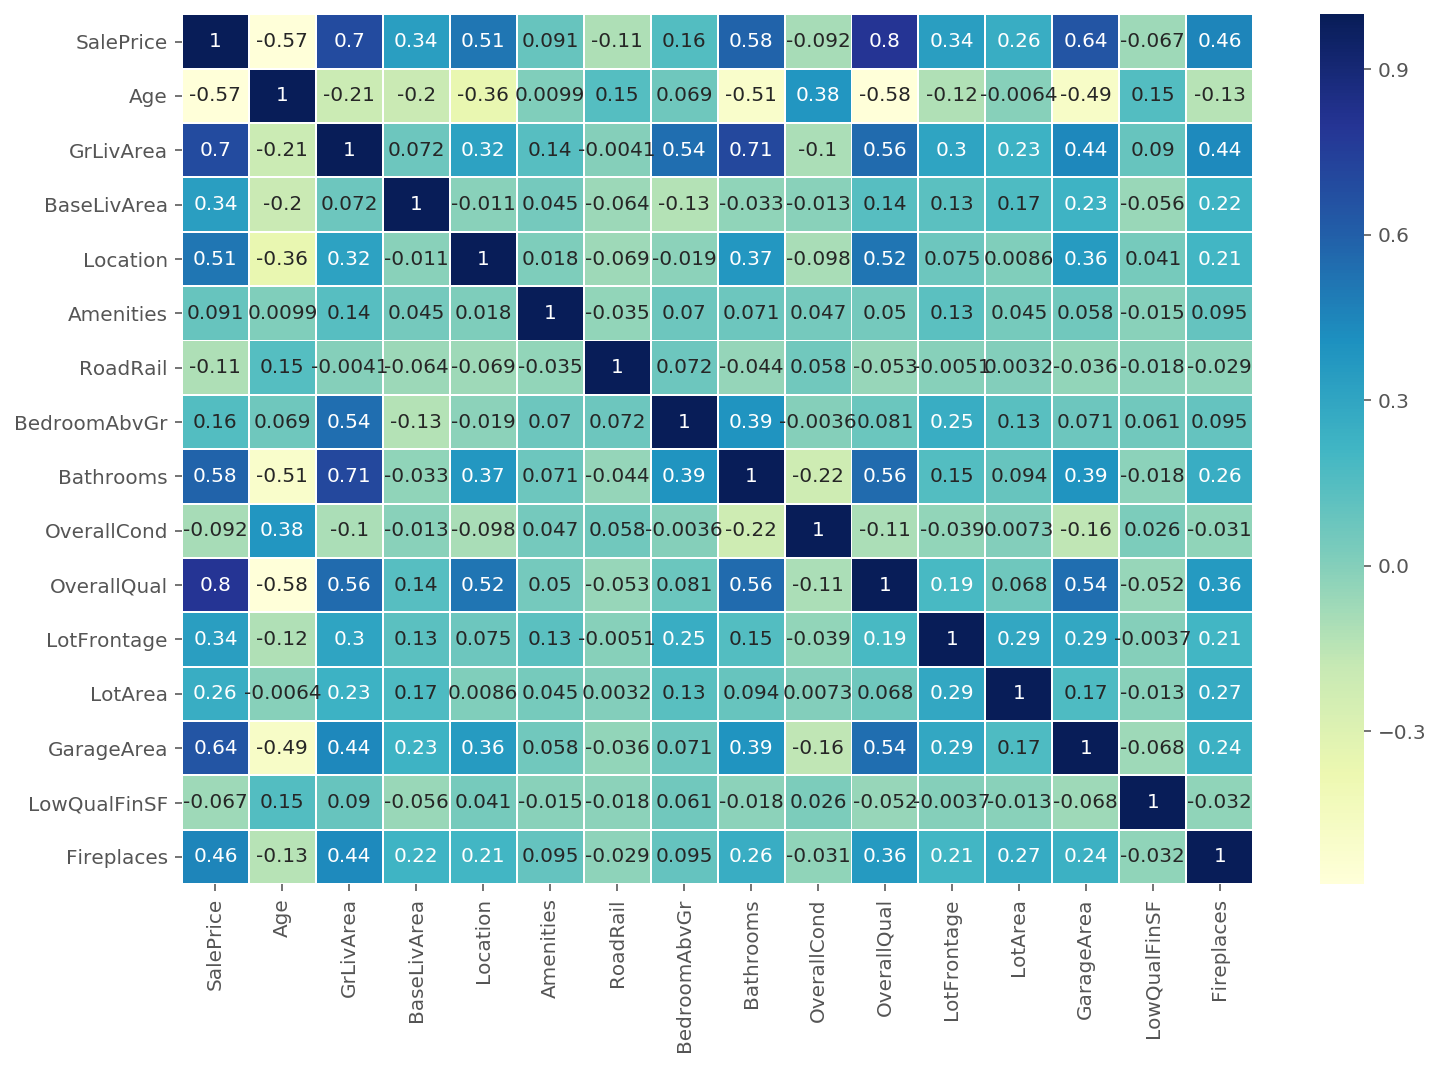

In [343]:
col = ['SalePrice','Age', 'GrLivArea', 'BaseLivArea', 'Location', 'Amenities', 'RoadRail', 'BedroomAbvGr', 'Bathrooms', 'OverallCond',
             'OverallQual', 'LotFrontage', 'LotArea', 'GarageArea', 
             'LowQualFinSF', 'Fireplaces']
cor = df_exout[col].corr()

plt.figure(figsize=(12,8))
ax = sns.heatmap(cor, annot=True, linewidths=.5, cmap="YlGnBu")
# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5)

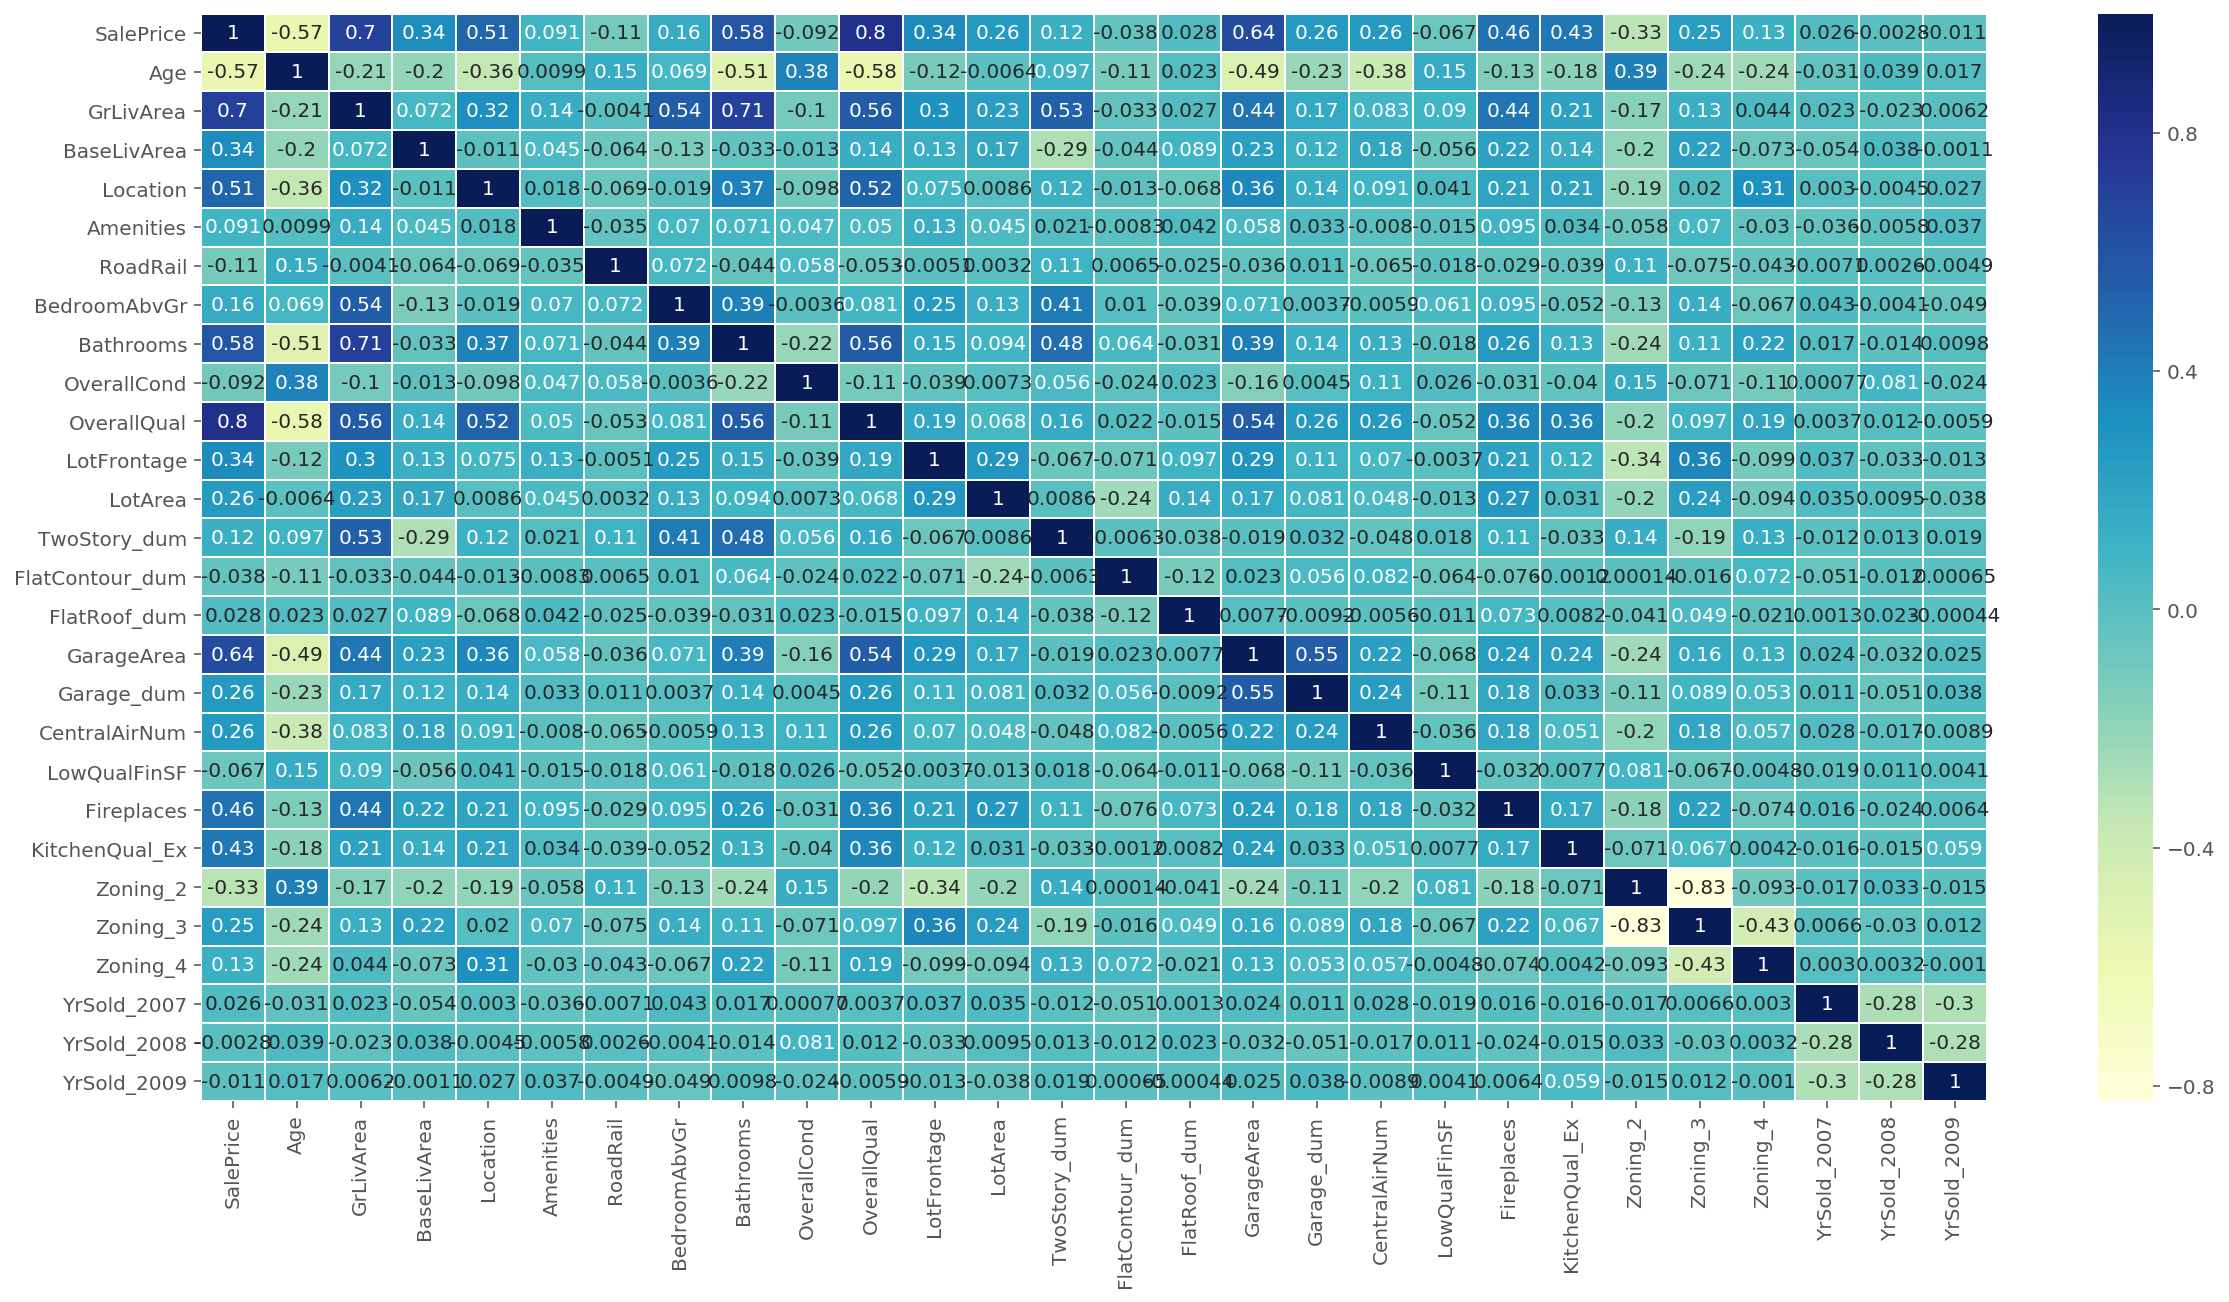

In [344]:
col = ['SalePrice','Age', 'GrLivArea', 'BaseLivArea', 'Location', 'Amenities', 'RoadRail', 'BedroomAbvGr', 'Bathrooms', 'OverallCond',
             'OverallQual', 'LotFrontage', 'LotArea', 'TwoStory_dum', 'FlatContour_dum', 'FlatRoof_dum', 'GarageArea', 
             'Garage_dum', 'CentralAirNum', 'LowQualFinSF', 'Fireplaces', 'KitchenQual_Ex', 'Zoning_2', 'Zoning_3', 
             'Zoning_4', 'YrSold_2007', 'YrSold_2008', 'YrSold_2009']
cor = df_exout[col].corr()

plt.figure(figsize=(20,10))
ax = sns.heatmap(cor, annot=True, linewidths=.5, cmap="YlGnBu")

# Regression using Ln SalePrice target on pre-2010

In [428]:
y_SP = df_exout['SalePrice']
y_lnSP = df_exout['LnSalePrice']

In [429]:
X = df_exout[['Age', 'GrLivArea', 'BaseLivArea', 'Location', 'Amenities', 'RoadRail', 'BedroomAbvGr', 'Bathrooms', 'OverallCond',
             'OverallQual', 'LotFrontage', 'LotArea', 'TwoStory_dum', 'FlatContour_dum', 'FlatRoof_dum', 'GarageArea', 
             'Garage_dum', 'CentralAirNum', 'LowQualFinSF', 'Fireplaces', 'KitchenQual_Ex', 'Zoning_2', 'Zoning_3', 
             'Zoning_4', 'YrSold_2007', 'YrSold_2008', 'YrSold_2009']]

In [430]:
X.shape

(1418, 27)

In [431]:
def get_score(name, model, x_train, x_test, y_tr, y_tst):
    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(model, x_train, y_tr,
                                  cv=5,
                                  scoring='neg_mean_squared_error')
    
    rmse = np.sqrt(scores.mean())
    
    scores = -1 * cross_val_score(model, x_test, y_tst,
                                  cv=5,
                                  scoring='neg_mean_squared_error')
    rmse1 = np.sqrt(scores.mean())
    
    model.fit(x_train, y_tr)
    score = model.score(x_test,y_tst)
    
    df_summary.loc[len(df_summary)] = {'Model':name, 'Train Accuracy':rmse, 'Test Accuracy':rmse1, 'R2':score*100}

    print("RMSE score for {} model : Train: {} Test: {} R2: {}".format(name, rmse, rmse1, score*100))
    
    return model

In [432]:
def run_models():
    # Linear Regression
    lin_reg = LinearRegression()
    lin_reg = get_score('LinearRegression', lin_reg, X_train, X_test, y_train, y_test)
    # df_summary

    # Linear Regression with Grid search
    from sklearn.model_selection import GridSearchCV
    hyper_param = {'normalize':[True,False], 'copy_X':[True, False], 'fit_intercept':[True,False]}
    lin_reg_cv = LinearRegression()
    lin_reg_cv = GridSearchCV(lin_reg_cv, hyper_param, cv=5, verbose=False)
    lin_reg_cv = get_score('LinearRegression_GS', lin_reg_cv, X_train, X_test, y_train, y_test)
    # df_summary

    # Decision tree
    from sklearn.tree import DecisionTreeRegressor
    dt = DecisionTreeRegressor(random_state = 0)
    dt = get_score('DecisionTreeRegressor', dt, X_train, X_test, y_train, y_test)
    # df_summary

    # Decision tree with GS
    hyper_param={#"max_depth": range(2,50),
                'splitter':['best','random'],             
                 'max_features':['auto','sqrt','log2'],
                 'presort':[True,False]
                }
    dt_cv = DecisionTreeRegressor(random_state = 0)
    dt_cv = GridSearchCV(dt_cv, hyper_param, cv=5, verbose=0)
    dt_cv = get_score('DecisionTreeRegressor_GS', dt_cv, X_train, X_test, y_train, y_test)
    # df_summary

    # RandomForestRegressor
    from sklearn.ensemble import RandomForestRegressor
    rfr = RandomForestRegressor(random_state=0)
    rfr = get_score('RandomForestRegressor', rfr, X_train, X_test, y_train, y_test)
    # df_summary

    # RandomForestRegressor with diff estimators
    for est in range(50,550,50):
        rfr = RandomForestRegressor(n_estimators=est, n_jobs=-1, random_state=0)
        print("Est : ", est, get_score("RandomForestRegressor_{}".format(est), rfr, X_train, X_test, y_train, y_test))

# Model with Standard Scalar

In [433]:
# Train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y_lnSP, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

summary_cols=['Model','Train Accuracy','Test Accuracy', 'R2']
df_summary = pd.DataFrame(columns=summary_cols)

run_models()
df_summary

RMSE score for LinearRegression model : Train: 0.12338877281555066 Test: 0.12816379596841965 R2: 89.40763612546888


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will

RMSE score for LinearRegression_GS model : Train: 0.12338877281555072 Test: 0.12816379596841965 R2: 89.40763612546888
RMSE score for DecisionTreeRegressor model : Train: 0.20497525123746538 Test: 0.20360849280866122 R2: 75.14419310606189


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will

RMSE score for DecisionTreeRegressor_GS model : Train: 0.2063184609809513 Test: 0.21932311948014768 R2: 70.68112559926772
RMSE score for RandomForestRegressor model : Train: 0.1449133208832423 Test: 0.15162816149581518 R2: 85.50038208577128
RMSE score for RandomForestRegressor_50 model : Train: 0.13573959267402766 Test: 0.14309499177604465 R2: 88.0859909356441
Est :  50 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
RMSE score for RandomForestRegressor_100 model : Train: 0.13455721033520252 Test: 0.14455194003564964 R2: 88.25060113606855
Est :  100 RandomForestRegressor(bootstrap=Tr

Model  Train Accuracy  Test Accuracy         R2
0            LinearRegression        0.123389       0.128164  89.407636
1         LinearRegression_GS        0.123389       0.128164  89.407636
2       DecisionTreeRegressor        0.204975       0.203608  75.144193
3    DecisionTreeRegressor_GS        0.206318       0.219323  70.681126
4       RandomForestRegressor        0.144913       0.151628  85.500382
5    RandomForestRegressor_50        0.135740       0.143095  88.085991
6   RandomForestRegressor_100        0.134557       0.144552  88.250601
7   RandomForestRegressor_150        0.133716       0.142151  88.390710
8   RandomForestRegressor_200        0.133380       0.141327  88.425154
9   RandomForestRegressor_250        0.133427       0.141519  88.477715
10  RandomForestRegressor_300        0.133667       0.141451  88.412176
11  RandomForestRegressor_350        0.133462       0.141659  88.349696
12  RandomForestRegressor_400        0.133356       0.141429  88.409933
13  RandomForestRegressor_450        0.133343       0.141903  88.453733
14  RandomForestRegressor_500        0.133348       0.141994  88.474486

# Model with MinMax Scalar

In [434]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

summary_cols=['Model','Train Accuracy','Test Accuracy', 'R2']
df_summary = pd.DataFrame(columns=summary_cols)

# Models with MinMax Scalar
run_models()
df_summary

RMSE score for LinearRegression model : Train: 0.12338877281555068 Test: 0.12816379596841965 R2: 89.40763612546888


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will

RMSE score for LinearRegression_GS model : Train: 0.12338877281555068 Test: 0.1281637959684196 R2: 89.40763612546888
RMSE score for DecisionTreeRegressor model : Train: 0.20507325272727428 Test: 0.20351933806171024 R2: 75.9235813526055


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will

RMSE score for DecisionTreeRegressor_GS model : Train: 0.20849611144289482 Test: 0.21964399328430628 R2: 70.68112559926772
RMSE score for RandomForestRegressor model : Train: 0.1447735673487324 Test: 0.15283682695194978 R2: 85.46023885902939
RMSE score for RandomForestRegressor_50 model : Train: 0.13564260956239163 Test: 0.14326629615537836 R2: 88.0877829299973
Est :  50 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
RMSE score for RandomForestRegressor_100 model : Train: 0.13448342763643803 Test: 0.14474352386346823 R2: 88.25285185591912
Est :  100 RandomForestRegressor(bootstrap=T

Model  Train Accuracy  Test Accuracy         R2
0            LinearRegression        0.123389       0.128164  89.407636
1         LinearRegression_GS        0.123389       0.128164  89.407636
2       DecisionTreeRegressor        0.205073       0.203519  75.923581
3    DecisionTreeRegressor_GS        0.208496       0.219644  70.681126
4       RandomForestRegressor        0.144774       0.152837  85.460239
5    RandomForestRegressor_50        0.135643       0.143266  88.087783
6   RandomForestRegressor_100        0.134483       0.144744  88.252852
7   RandomForestRegressor_150        0.133685       0.142230  88.381369
8   RandomForestRegressor_200        0.133310       0.141324  88.404620
9   RandomForestRegressor_250        0.133320       0.141481  88.457113
10  RandomForestRegressor_300        0.133553       0.141413  88.394871
11  RandomForestRegressor_350        0.133315       0.141651  88.333775
12  RandomForestRegressor_400        0.133232       0.141397  88.395097
13  RandomForestRegressor_450        0.133221       0.141874  88.442203
14  RandomForestRegressor_500        0.133229       0.141974  88.465999

# OLS  (Dimensionality reduction)

In [443]:
# cols = list(df_exout.columns)
cols = df_exout.select_dtypes(exclude='object')
cols = list(cols.columns)
cols = list(set(cols) - set(df_exout.columns[df_exout.isnull().any()]))
print(len(cols))
for c in cols:
    if 'Price' in c:       
        print(c)
        cols.remove(c)         
# print(len(cols))       

for c in cols:
    if 'Price' in c:       
        print(c)
        cols.remove(c)         
print(len(cols))
print(cols)

66
SalePrice
PriceSF
LnPriceSF
LnSalePrice
62
['Fireplaces', 'GarageCars', 'MoSold', 'GrLivArea', 'KitchenQual_TA', 'Functional_Num', 'YrSold_2009', 'YrSold_2008', 'KitchenQual_Ex', '3SsnPorch', 'PoolArea', 'CentralAirNum', 'LotArea', 'TwoStory_dum', 'Zone_ordinal', 'RoadRail', 'Zoning_3', 'YrSold_2006', 'Zoning_2', 'Amenities', 'Street_dum', 'YearRemodAdd', 'FullBath', 'Location', 'TotRmsAbvGrd', 'Garage_dum', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'HalfBath', 'MiscVal', 'FlatRoof_dum', 'GarageArea', 'FlatContour_dum', 'ExterQual_Num', 'BedroomAbvGr', 'YearBuilt', 'KitchenQual_Fa', 'BsmtUnfSF', 'MSSubClass', 'EnclosedPorch', 'OverallCond', 'Age', 'WoodDeckSF', 'Zoning_4', 'OverallQual', 'Zoning_1', 'YrSold_2010', 'KitchenQual_Gd', 'LotFrontage', 'ScreenPorch', 'OpenPorchSF', 'BsmtFullBath', 'KitchenAbvGr', 'LowQualFinSF', 'ExterCond_Num', 'BaseLivArea', 'BsmtHalfBath', 'Bathrooms', 'BsmtFinSF2', 'BsmtFinSF1', 'YrSold_2007']


In [436]:
#Backward Elimination using OLS method
import statsmodels.api as sm
# cols = list(X.columns)
pmax = 1
# y = y_lnSP
# y_SP = df_exout['SalePrice']
y = df_exout['LnSalePrice'] # .reset_index(drop=True)

while (len(cols)>0):
    p = []
    X_1 = df_exout[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y.astype(float),X_1.astype(float)).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
        
selected_features = cols
print("Len : {}\n{}".format(len(selected_features), selected_features))

Len : 38
['Fireplaces', 'GarageCars', 'KitchenQual_TA', 'Functional_Num', 'YrSold_2009', 'KitchenQual_Ex', 'CentralAirNum', 'LotArea', 'Zone_ordinal', 'RoadRail', 'Zoning_3', 'Zoning_2', 'YearRemodAdd', 'Location', 'Garage_dum', 'TotalBsmtSF', '2ndFlrSF', '1stFlrSF', 'FlatContour_dum', 'ExterQual_Num', 'YearBuilt', 'KitchenQual_Fa', 'BsmtUnfSF', 'MSSubClass', 'EnclosedPorch', 'OverallCond', 'WoodDeckSF', 'Zoning_4', 'OverallQual', 'Zoning_1', 'KitchenQual_Gd', 'LotFrontage', 'ScreenPorch', 'OpenPorchSF', 'BsmtFullBath', 'KitchenAbvGr', 'BaseLivArea', 'BsmtFinSF1']


In [437]:
X = df_exout[selected_features]

In [438]:
X.shape

(1418, 38)

# Model with Standard Scalar (OLS)

In [439]:
# Train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y_lnSP, test_size=0.2, random_state=1)

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

summary_cols=['Model','Train Accuracy','Test Accuracy', 'R2']
df_summary = pd.DataFrame(columns=summary_cols)

# Models with StandardScaler
run_models()
df_summary

RMSE score for LinearRegression model : Train: 0.11408824462311355 Test: 0.11437068429355789 R2: 91.95816103967077


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will

RMSE score for LinearRegression_GS model : Train: 0.11410717809646838 Test: 0.11435730120560612 R2: 91.95816103967077
RMSE score for DecisionTreeRegressor model : Train: 0.20101609314818447 Test: 0.23516723398016864 R2: 72.23389305456382


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will

RMSE score for DecisionTreeRegressor_GS model : Train: 0.19973337410405612 Test: 0.22912425757737756 R2: 72.01007001381004
RMSE score for RandomForestRegressor model : Train: 0.147225797081978 Test: 0.1666686097386744 R2: 86.0920228470122
RMSE score for RandomForestRegressor_50 model : Train: 0.13601564783769746 Test: 0.1589100158743871 R2: 86.91800244431904
Est :  50 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
RMSE score for RandomForestRegressor_100 model : Train: 0.1353898857704833 Test: 0.15548622237190082 R2: 87.52923534342901
Est :  100 RandomForestRegressor(bootstrap=True,

Model  Train Accuracy  Test Accuracy         R2
0            LinearRegression        0.114088       0.114371  91.958161
1         LinearRegression_GS        0.114107       0.114357  91.958161
2       DecisionTreeRegressor        0.201016       0.235167  72.233893
3    DecisionTreeRegressor_GS        0.199733       0.229124  72.010070
4       RandomForestRegressor        0.147226       0.166669  86.092023
5    RandomForestRegressor_50        0.136016       0.158910  86.918002
6   RandomForestRegressor_100        0.135390       0.155486  87.529235
7   RandomForestRegressor_150        0.134871       0.154478  87.724684
8   RandomForestRegressor_200        0.134684       0.154124  87.698991
9   RandomForestRegressor_250        0.134809       0.153606  87.689397
10  RandomForestRegressor_300        0.135043       0.153329  87.718030
11  RandomForestRegressor_350        0.134766       0.153605  87.678994
12  RandomForestRegressor_400        0.134953       0.153582  87.684119
13  RandomForestRegressor_450        0.134900       0.153527  87.688618
14  RandomForestRegressor_500        0.134956       0.153500  87.652075

# Model with MinMax Scalar (OLS)

In [440]:
# Train-test split of the data
X_train, X_test, y_train, y_test = train_test_split(X, y_lnSP, test_size=0.2, random_state=1)

# from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

summary_cols=['Model','Train Accuracy','Test Accuracy', 'R2']
df_summary = pd.DataFrame(columns=summary_cols)

# Models with StandardScaler
run_models()
df_summary

RMSE score for LinearRegression model : Train: 0.11402505283774245 Test: 0.11439642030657482 R2: 91.27840258625041


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE score for LinearRegression_GS model : Train: 0.11405685233210516 Test: 0.11439278357432378 R2: 91.27840258625041
RMSE score for DecisionTreeRegressor model : Train: 0.20128873332901553 Test: 0.23560438134027017 R2: 72.54413595406022


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will

RMSE score for DecisionTreeRegressor_GS model : Train: 0.199813579456646 Test: 0.22957291211994613 R2: 72.34882037832165
RMSE score for RandomForestRegressor model : Train: 0.147174091689862 Test: 0.16676765586312894 R2: 86.0289573691418
RMSE score for RandomForestRegressor_50 model : Train: 0.13588766397332025 Test: 0.15881285482892124 R2: 86.93597356114002
Est :  50 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=-1,
                      oob_score=False, random_state=0, verbose=0,
                      warm_start=False)
RMSE score for RandomForestRegressor_100 model : Train: 0.13524820896073858 Test: 0.15554152695372547 R2: 87.53797217797211
Est :  100 RandomForestRegressor(bootstrap=True

Model  Train Accuracy  Test Accuracy         R2
0            LinearRegression        0.114025       0.114396  91.278403
1         LinearRegression_GS        0.114057       0.114393  91.278403
2       DecisionTreeRegressor        0.201289       0.235604  72.544136
3    DecisionTreeRegressor_GS        0.199814       0.229573  72.348820
4       RandomForestRegressor        0.147174       0.166768  86.028957
5    RandomForestRegressor_50        0.135888       0.158813  86.935974
6   RandomForestRegressor_100        0.135248       0.155542  87.537972
7   RandomForestRegressor_150        0.134774       0.154536  87.740776
8   RandomForestRegressor_200        0.134598       0.154139  87.711728
9   RandomForestRegressor_250        0.134742       0.153605  87.705079
10  RandomForestRegressor_300        0.134991       0.153330  87.736973
11  RandomForestRegressor_350        0.134705       0.153625  87.699321
12  RandomForestRegressor_400        0.134914       0.153605  87.704442
13  RandomForestRegressor_450        0.134843       0.153545  87.706166
14  RandomForestRegressor_500        0.134901       0.153513  87.666505

In [441]:
hyper_param = {'normalize':[True,False], 'copy_X':[True, False], 'fit_intercept':[True,False]}
lin_reg_cv = LinearRegression()
lin_reg_cv = GridSearchCV(lin_reg_cv, hyper_param, cv=5, verbose=False)
lin_reg_cv = get_score('LinearRegression_GS', lin_reg_cv, X_train, X_test, y_train, y_test)

C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RMSE score for LinearRegression_GS model : Train: 0.11405685233210516 Test: 0.11439278357432378 R2: 91.27840258625041


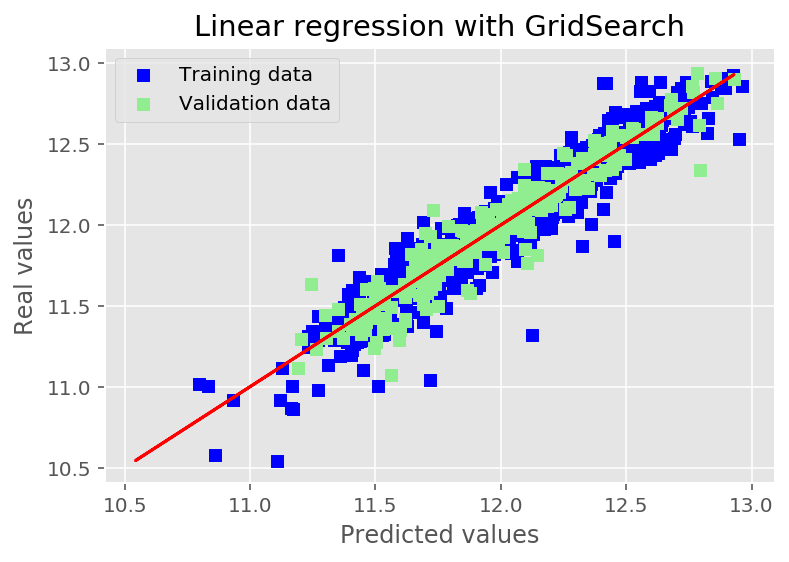

In [442]:
pred_xtrain = lin_reg_cv.predict(X_train)
pred_xtest = lin_reg_cv.predict(X_test)

plt.scatter(pred_xtrain, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(pred_xtest, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with GridSearch")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
# plt.show()
# plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.plot(y_train, y_train, c = "red")
# plt.show()